In [1]:
# 01_EDA.ipynb

## EDA : Exploratory Data Analysis
**Dataset**: consumer_airfare

**import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, anderson, zscore, probplot
from scipy import stats
import folium
from geopy.geocoders import Nominatim
import time
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 7)
%matplotlib inline

In [3]:
def plot_outliers(df, name):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col], color='mediumblue', linecolor='black', linewidth=2, flierprops={'marker':'d','markersize':5, 'markerfacecolor':'red'})
        plt.title(f'Boxplot for `{col}` in {name}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        padding = (df[col].max() - df[col].min()) * 0.2
        plt.xlim(df[col].min() - padding, df[col].max() + padding)
        sns.despine(left=True)
        plt.tight_layout()
        plt.show()
        

def plot_dist(df, name, color='salmon'):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        sns.displot(df[col], bins=30, kde=True, color=color)
        plt.title(f'Histogram for `{col}` in {name}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        sns.despine(left=True)
        plt.tight_layout()
        plt.show()

**load the data**

In [225]:
fpath_01 = '../datasets/processed/df1.csv'
fpath_02 = '../datasets/processed/df1a.csv'
fpath_03 = '../datasets/processed/df2.csv'
fpath_04 = '../datasets/processed/df3.csv'
fpath_05 = '../datasets/processed/df4.csv'
fpath_06 = '../datasets/processed/df5.csv'
fpath_07 = '../datasets/processed/df7.csv'
df1 = pd.read_csv(fpath_01, sep=',')
df1a = pd.read_csv(fpath_02, sep=',')
df2 = pd.read_csv(fpath_03, sep=',')
df3 = pd.read_csv(fpath_04, sep=',')
df4 = pd.read_csv(fpath_05, sep=',')
df5 = pd.read_csv(fpath_06, sep=',')
df7 = pd.read_csv(fpath_07, sep=',')
print('successfully loaded the data!')

successfully loaded the data!


In [227]:
dfs = [df1, df1a, df2, df3, df4, df5, df7]
df_names = ['df1', 'df1a', 'df2', 'df3', 'df4', 'df5', 'df7']

for df in dfs:
    if pd.api.types.is_integer_dtype(df['Year']):
        df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce') 
    elif pd.api.types.is_object_dtype(df['Year']):
        df['Year'] = df['Year'].astype(str).str.replace(',', '', regex=False)
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
        df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')
    
for df in dfs:
    df['quarter'] = df['quarter'].astype('category')

for df in dfs:        
    cols = list(df.filter(regex='^citymarketid'))
    if cols:
        for col in cols:
            df[col] = df[col].astype(str).str.replace(',', '', regex=False)
            df[col] = df[col].astype('str')

for df in dfs:
    df.shape
    df.info()
    print('--------------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115032 entries, 0 to 115031
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Year            115032 non-null  datetime64[ns]
 1   quarter         115032 non-null  category      
 2   citymarketid_1  115032 non-null  object        
 3   citymarketid_2  115032 non-null  object        
 4   city1           115032 non-null  object        
 5   city2           115032 non-null  object        
 6   nsmiles         115032 non-null  int64         
 7   passengers      115032 non-null  int64         
 8   fare            115032 non-null  float64       
 9   carrier_lg      115032 non-null  object        
 10  large_ms        115032 non-null  float64       
 11  fare_lg         115032 non-null  float64       
 12  carrier_low     115032 non-null  object        
 13  lf_ms           115032 non-null  float64       
 14  fare_low        115032 non-null  flo

In [228]:
for df in dfs:
    print(df.describe())
    print(df.head())
    print('-------------------------------------------------------------------------------------------')

                                Year        nsmiles     passengers  \
count                         115032  115032.000000  115032.000000   
mean   2009-11-17 16:40:42.562069760    1056.712532     816.949753   
min              1996-01-01 00:00:00     109.000000      28.000000   
25%              2003-01-01 00:00:00     586.000000     239.000000   
50%              2010-01-01 00:00:00     928.000000     409.000000   
75%              2017-01-01 00:00:00    1436.000000     833.000000   
max              2024-01-01 00:00:00    2724.000000   25471.000000   
std                              NaN     610.038002    1308.426474   

                fare       large_ms        fare_lg          lf_ms  \
count  115032.000000  115032.000000  115032.000000  115032.000000   
mean      198.063163       0.556383     202.443208       0.323687   
min        56.420000       0.100000      51.490000       0.010000   
25%       153.270000       0.412100     150.180000       0.140000   
50%       192.500000    

In [229]:
for df in dfs:
    print(df.isna().sum())
    print('-------------------------------------------------------------------------------------------')

Year              0
quarter           0
citymarketid_1    0
citymarketid_2    0
city1             0
city2             0
nsmiles           0
passengers        0
fare              0
carrier_lg        0
large_ms          0
fare_lg           0
carrier_low       0
lf_ms             0
fare_low          0
dtype: int64
-------------------------------------------------------------------------------------------
Year              0
quarter           0
citymarketid_1    0
citymarketid_2    0
city1             0
city2             0
nsmiles           0
passengers        0
fare              0
carrier_lg        0
large_ms          0
fare_lg           0
carrier_low       0
lf_ms             0
fare_low          0
dtype: int64
-------------------------------------------------------------------------------------------
Year              0
quarter           0
citymarketid      0
city              0
markets           0
cur_passengers    0
cur_fare          0
cur_yield         0
distance          0
ly_passeng

## Detecting Outliers

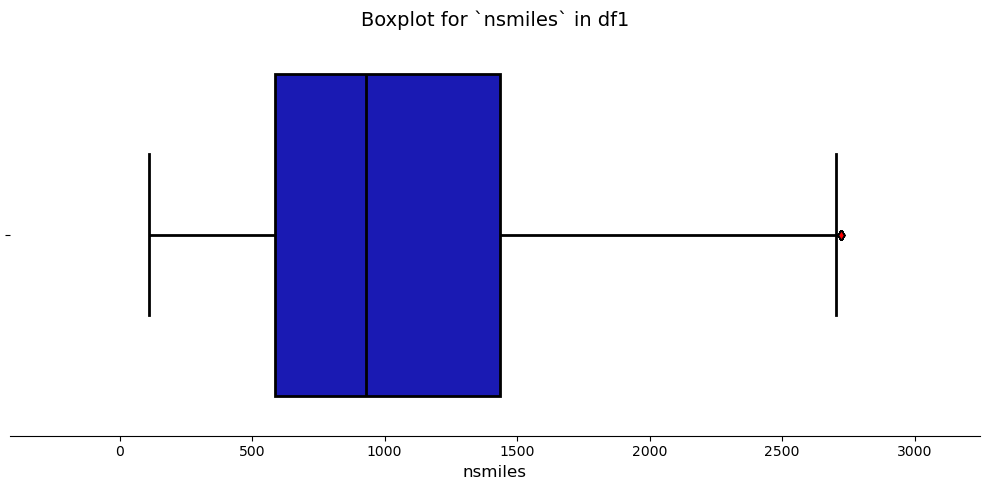

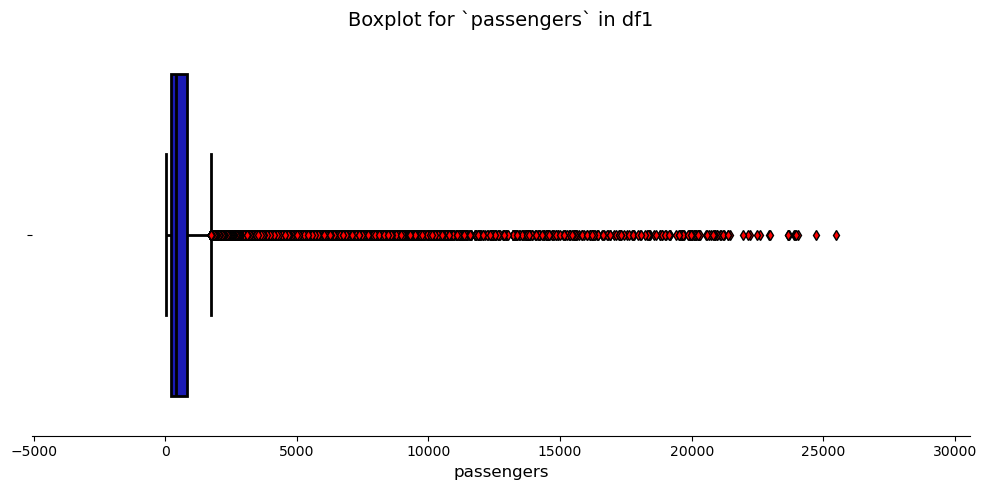

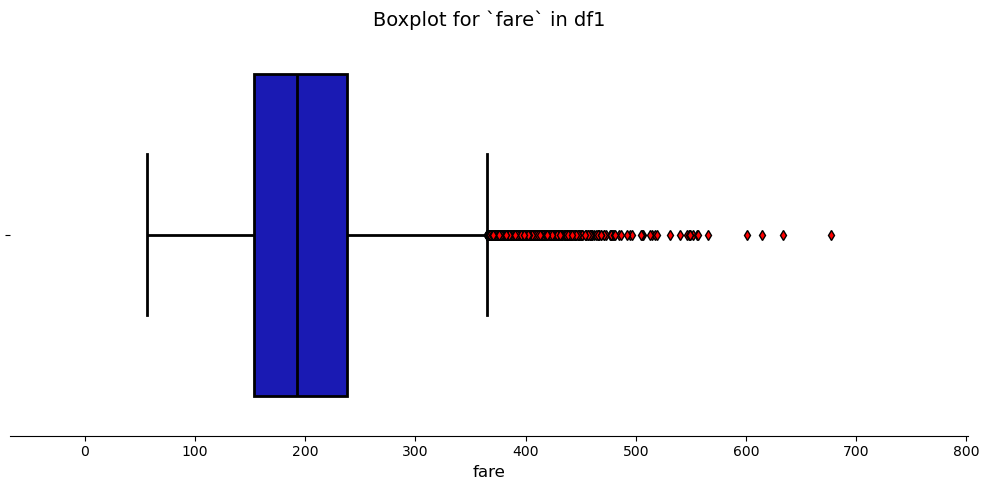

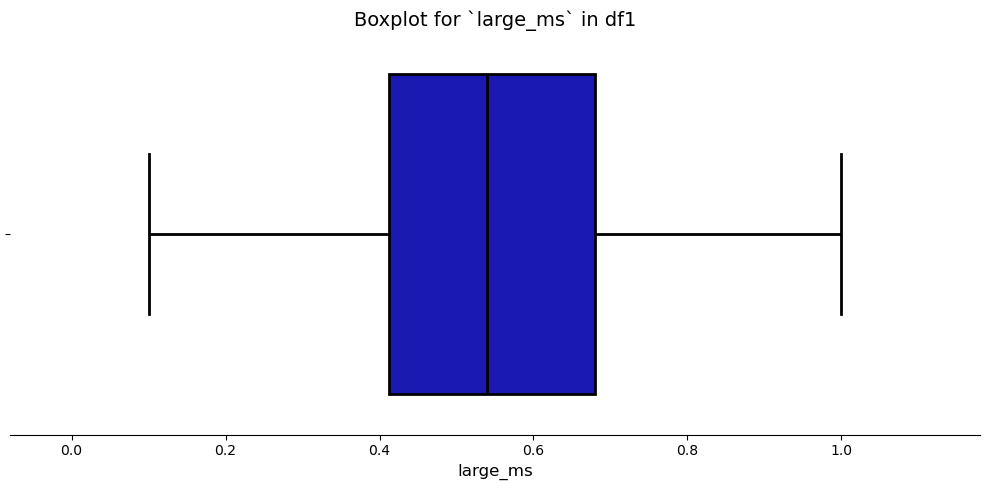

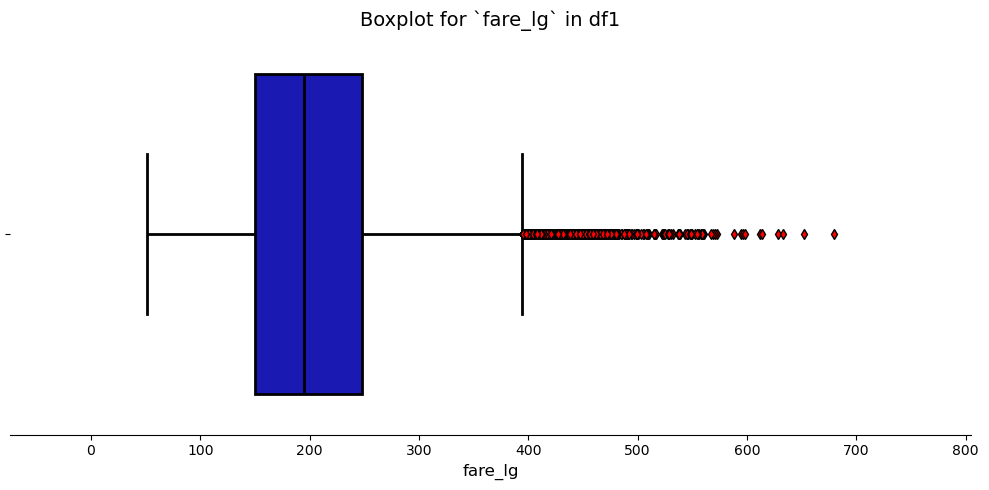

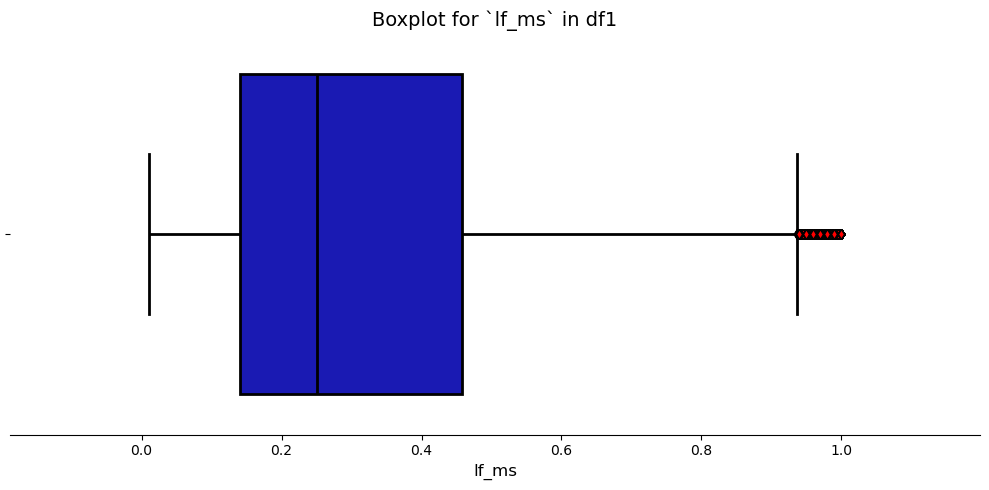

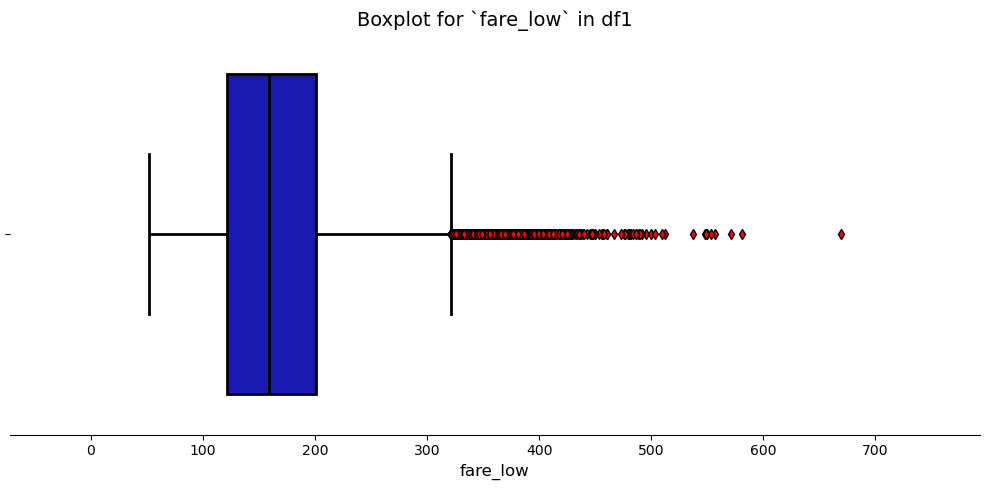

In [230]:
plot_outliers(df1, 'df1')

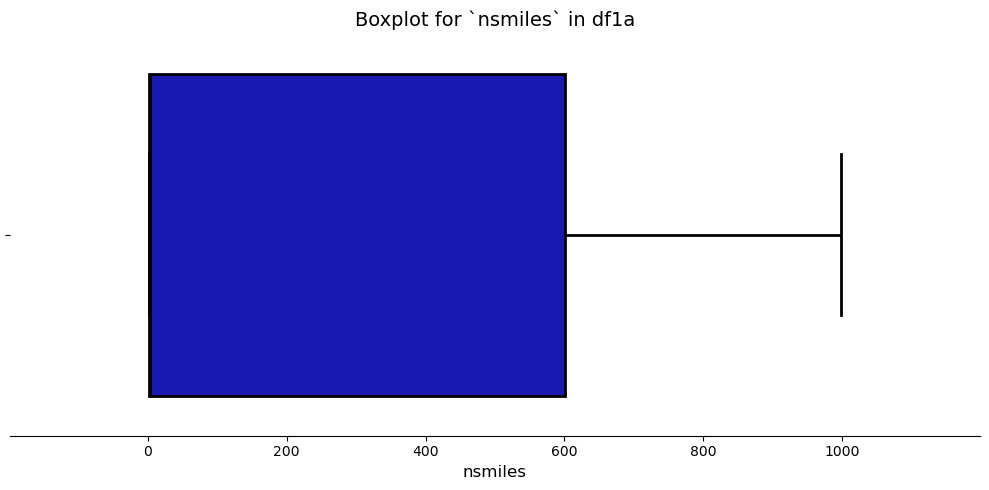

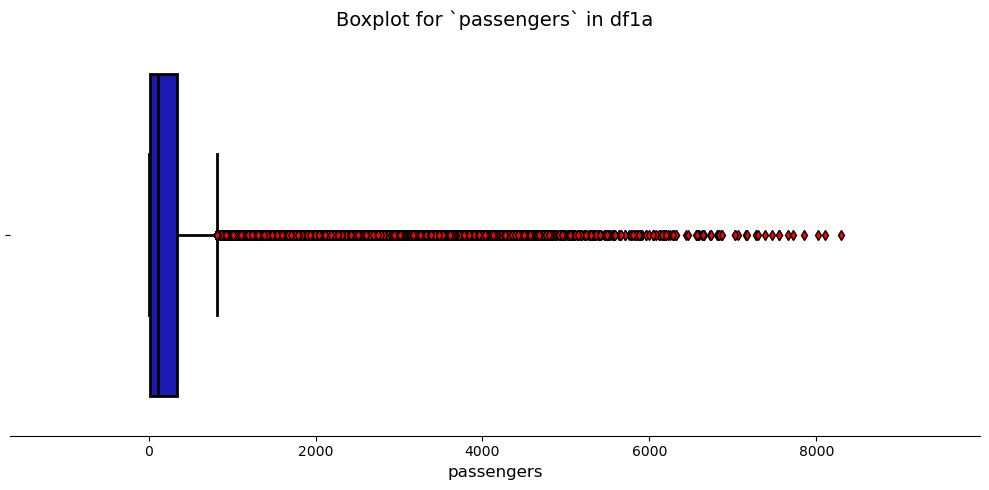

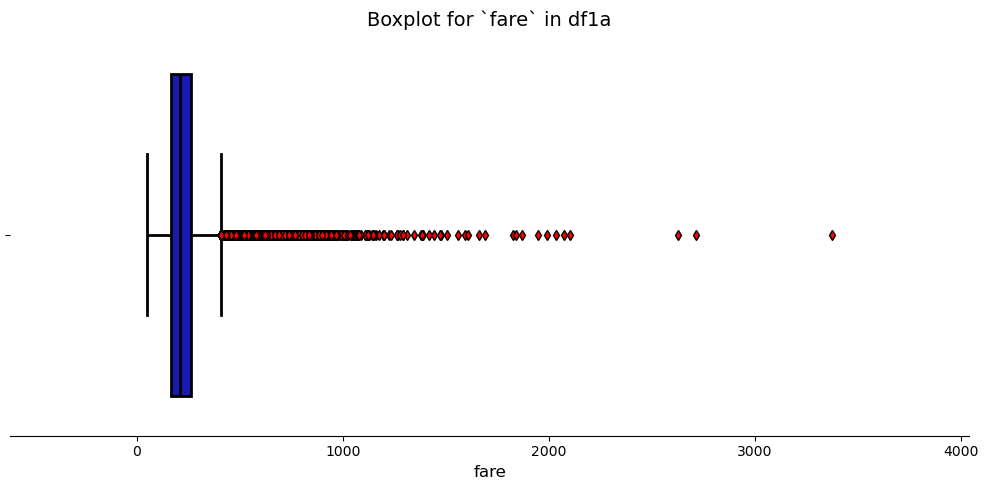

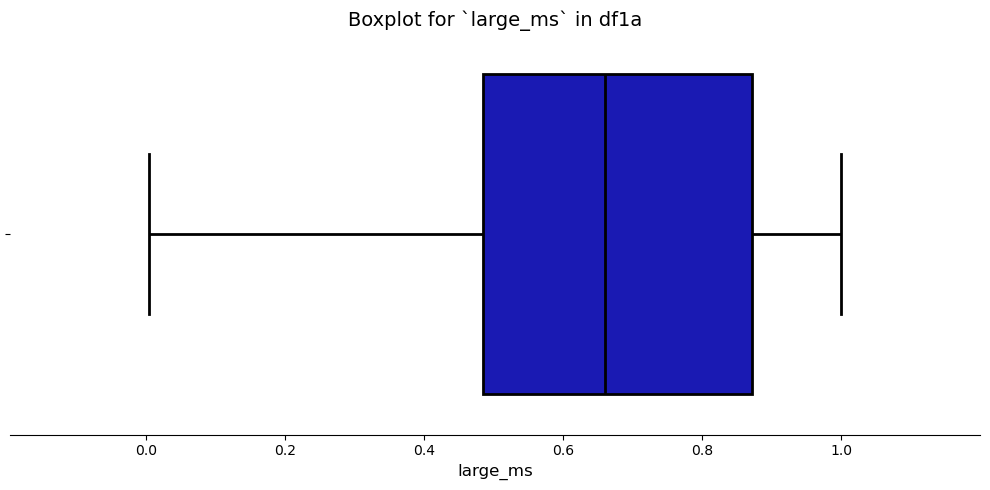

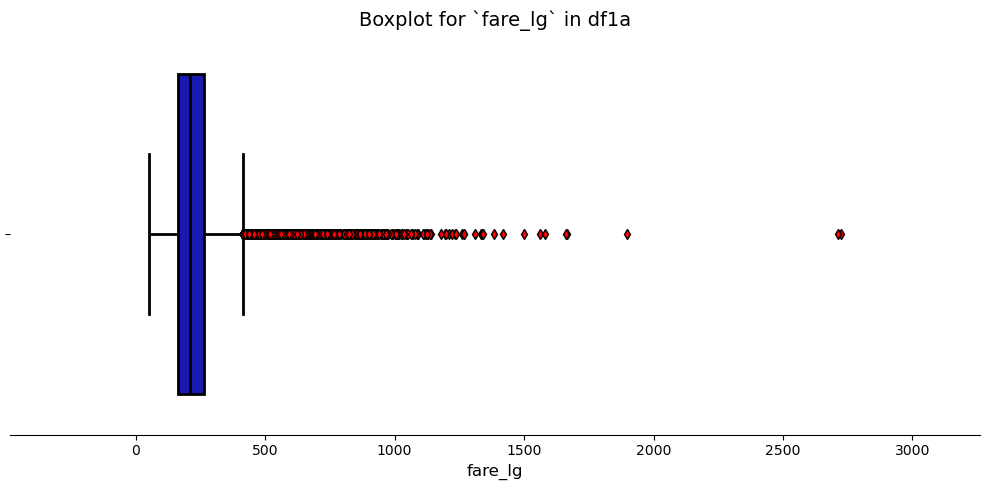

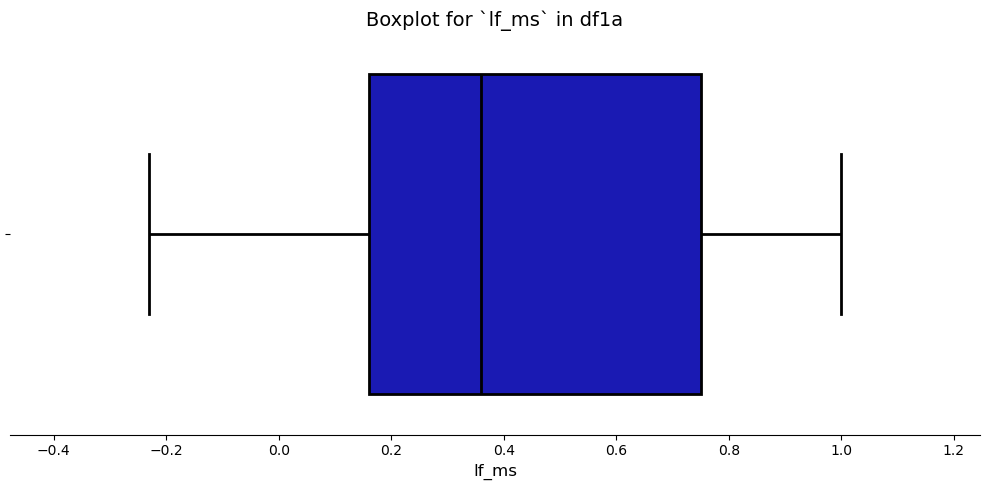

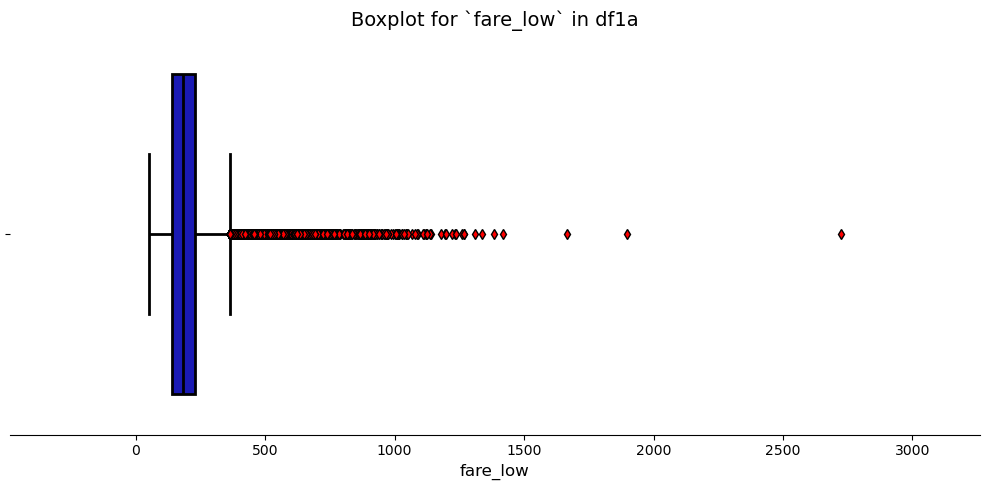

In [231]:
plot_outliers(df1a, 'df1a')

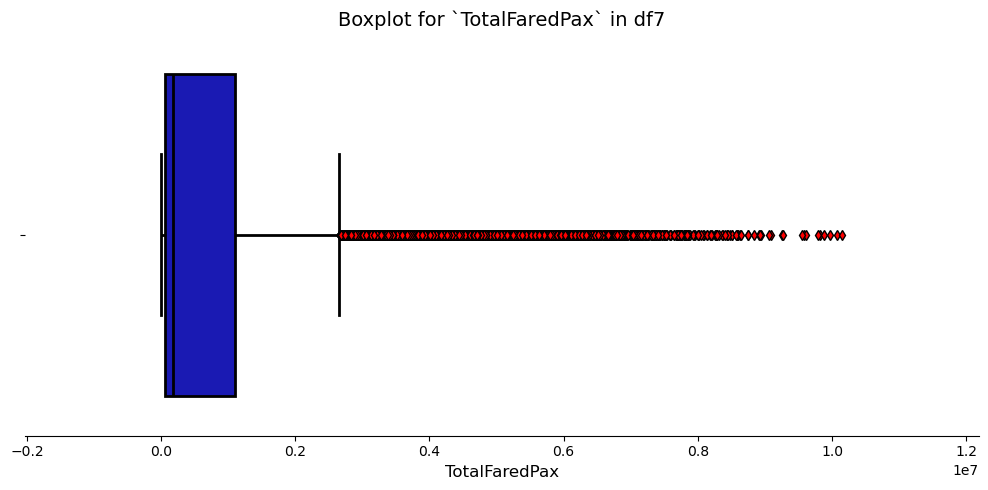

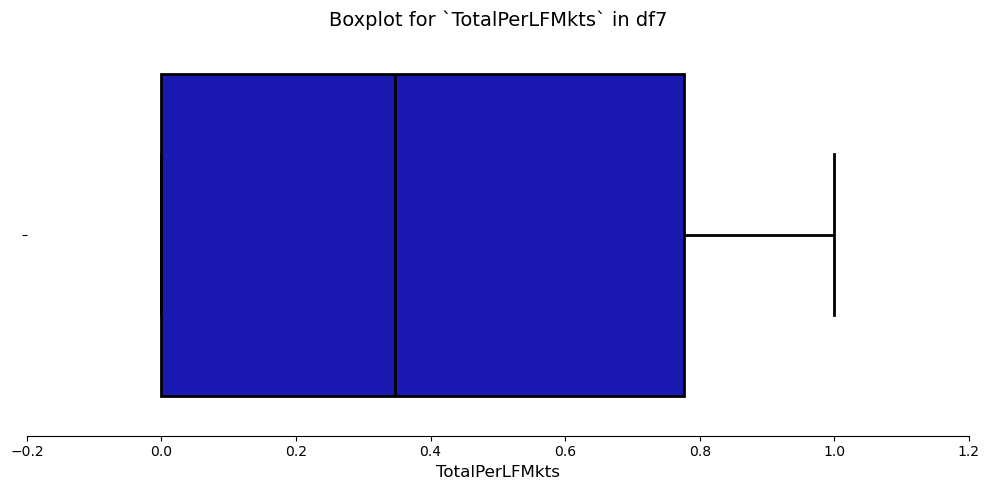

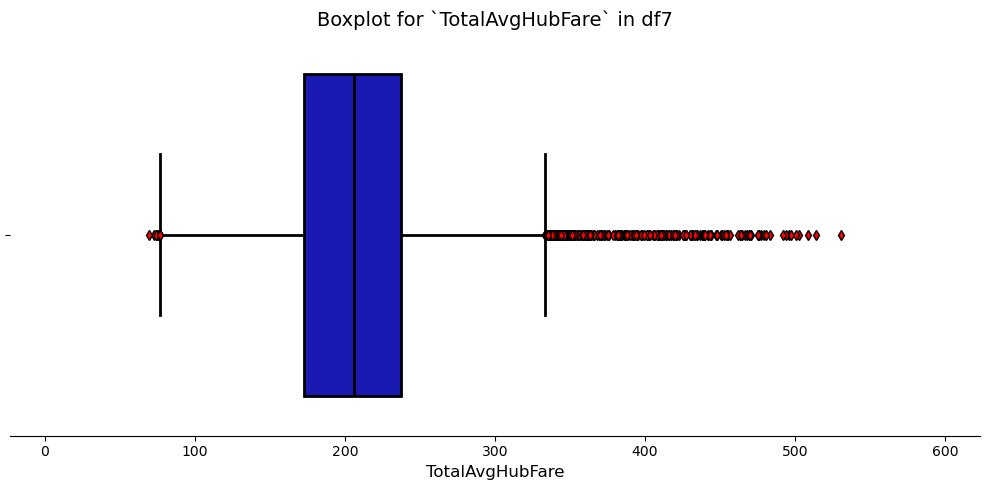

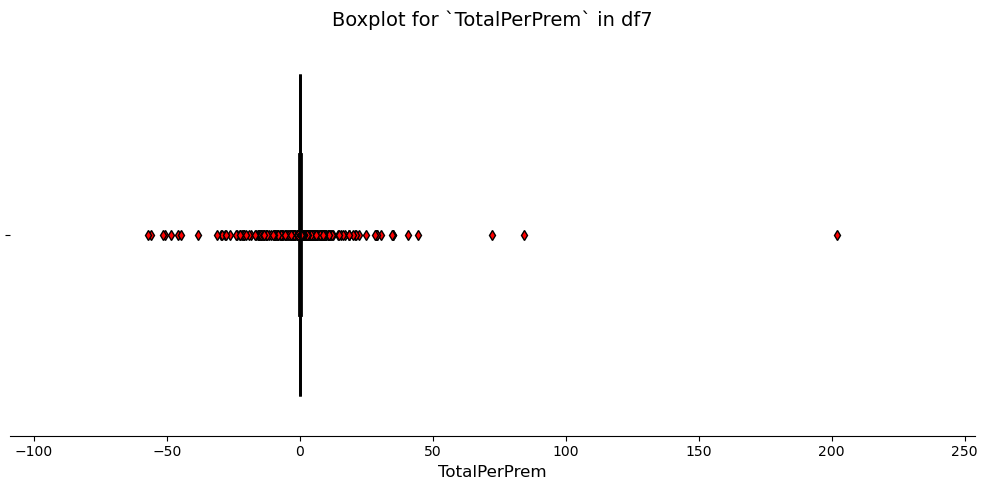

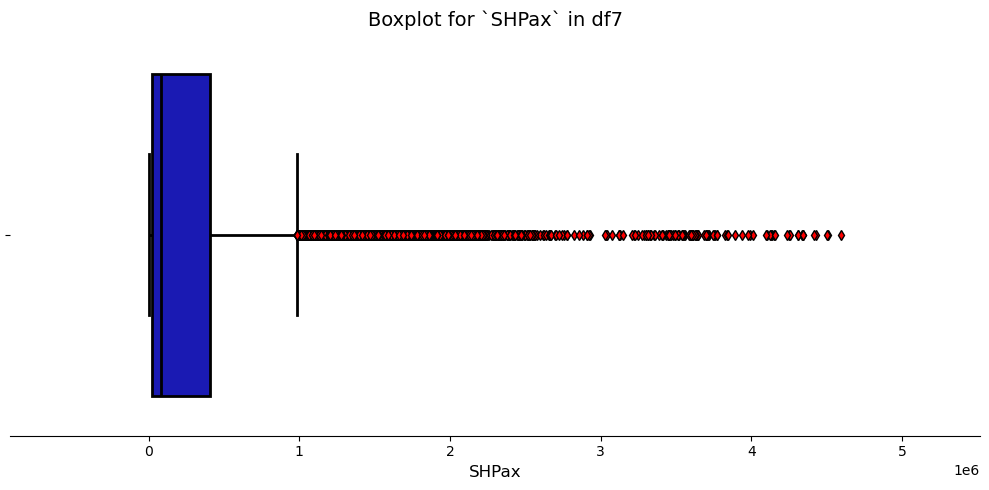

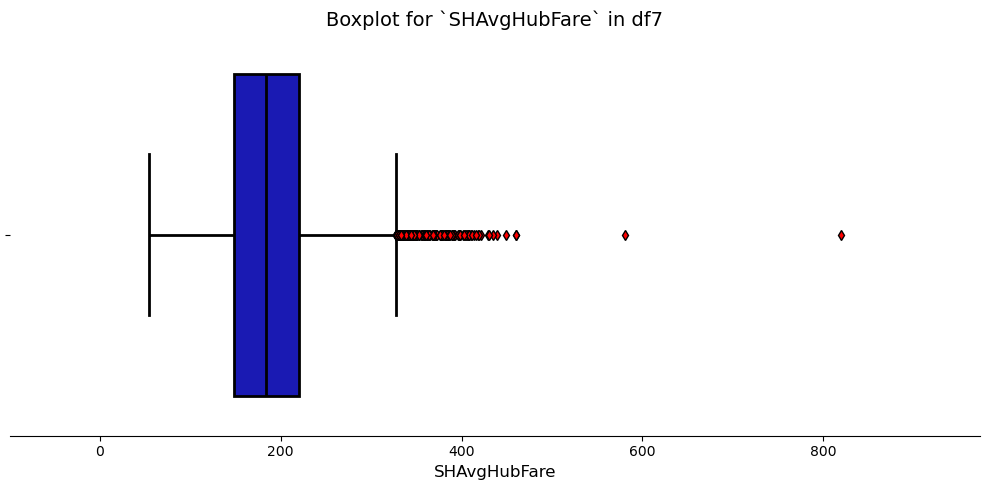

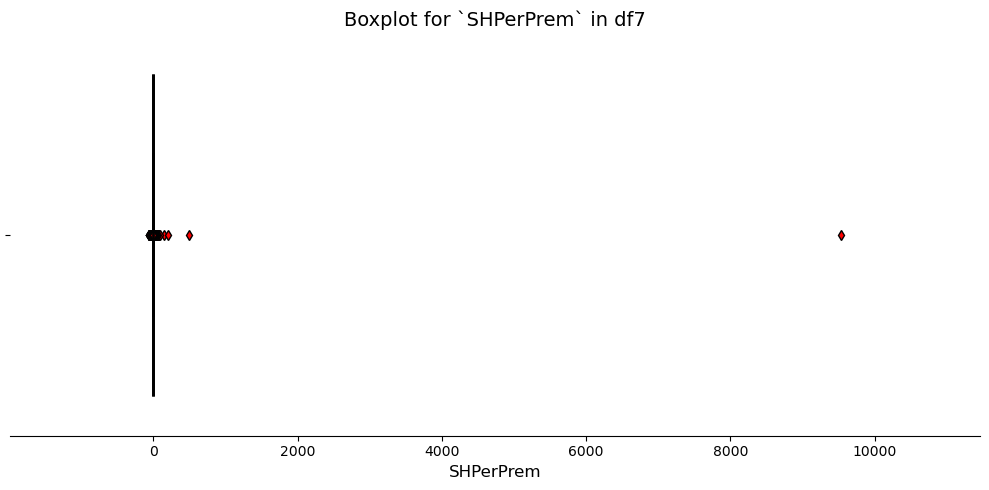

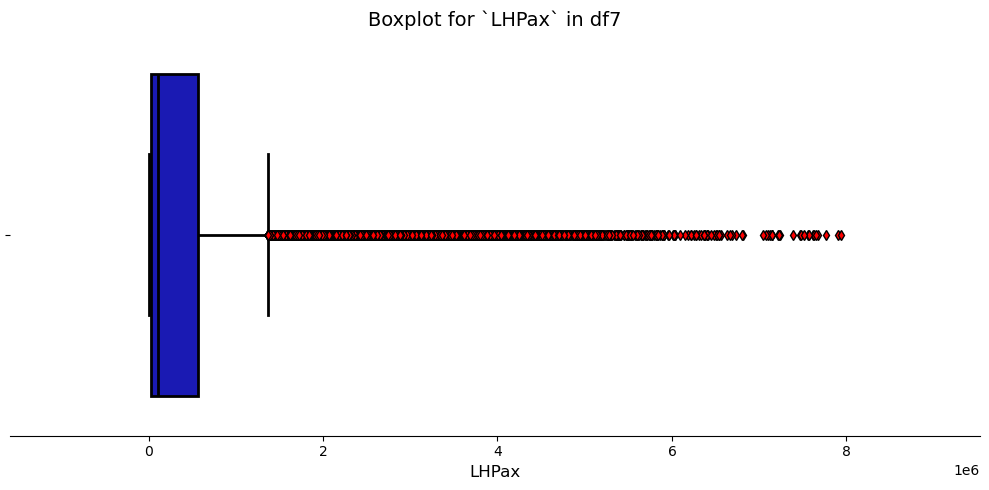

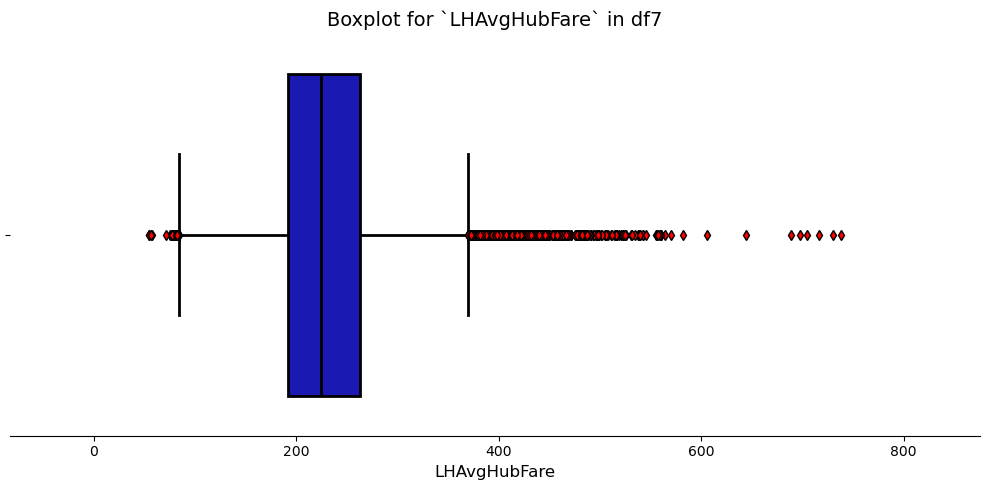

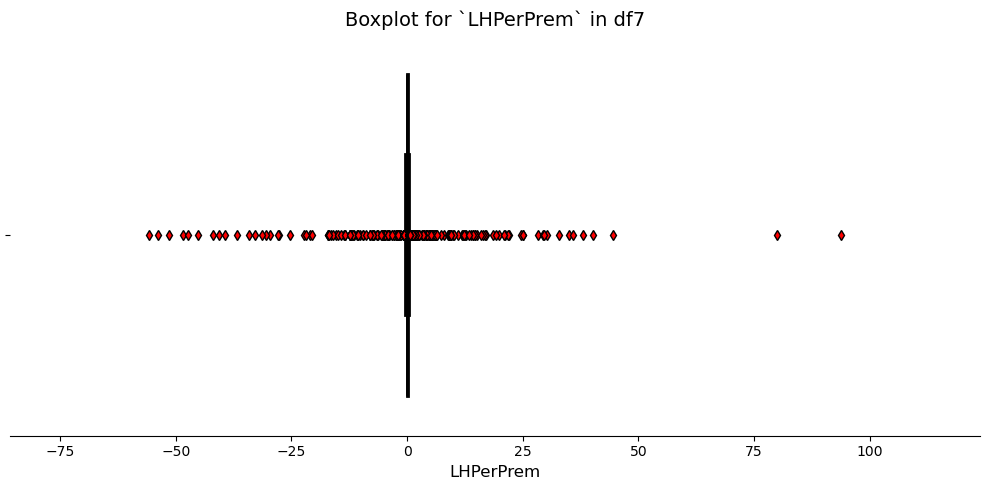

In [232]:
plot_outliers(df7, 'df7')

In [233]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.05, random_state=42)
for df, name in zip(dfs, df_names):
    df['outliers'] = clf.fit_predict(df.select_dtypes(include=['float64', 'int64']))
    df[df['outliers'] == -1] 
    outliers_count = df['outliers'].value_counts()
    print(f'{name}: {outliers_count}')
    print('-------------------------------------------------------------------------------------------')

df1: outliers
 1    109280
-1      5752
Name: count, dtype: int64
-------------------------------------------------------------------------------------------
df1a: outliers
 1    237389
-1     12495
Name: count, dtype: int64
-------------------------------------------------------------------------------------------
df2: outliers
 1    7851
-1     414
Name: count, dtype: int64
-------------------------------------------------------------------------------------------
df3: outliers
 1    2899
-1     153
Name: count, dtype: int64
-------------------------------------------------------------------------------------------
df4: outliers
 1    2839
-1     150
Name: count, dtype: int64
-------------------------------------------------------------------------------------------
df5: outliers
 1    14137
-1      744
Name: count, dtype: int64
-------------------------------------------------------------------------------------------
df7: outliers
 1    21488
-1     1131
Name: count, dtype: int64
-

## Categorical Variables

In [234]:
df1.columns

Index(['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'outliers'],
      dtype='object')

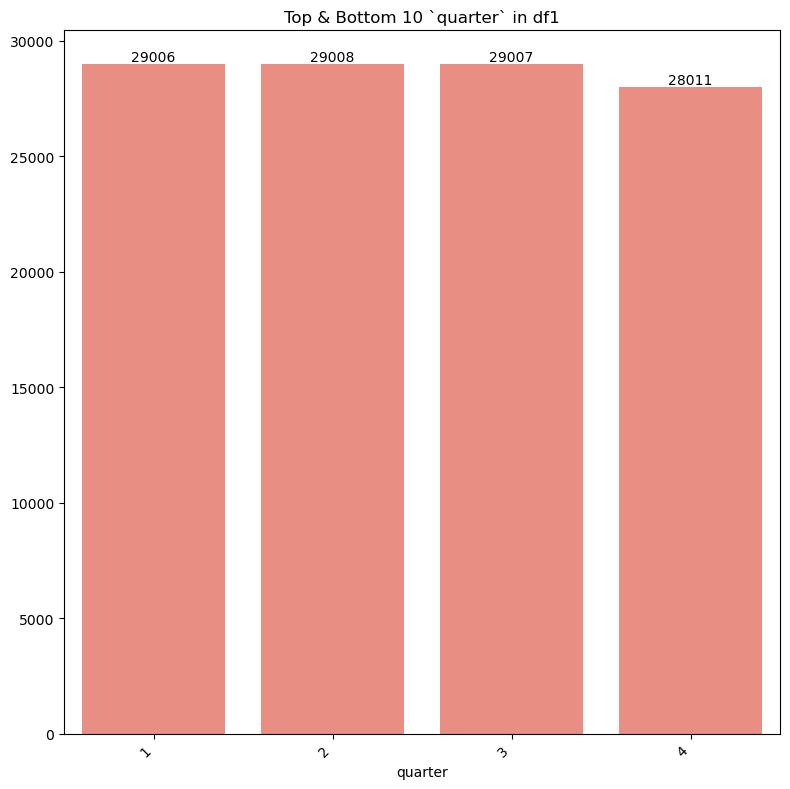

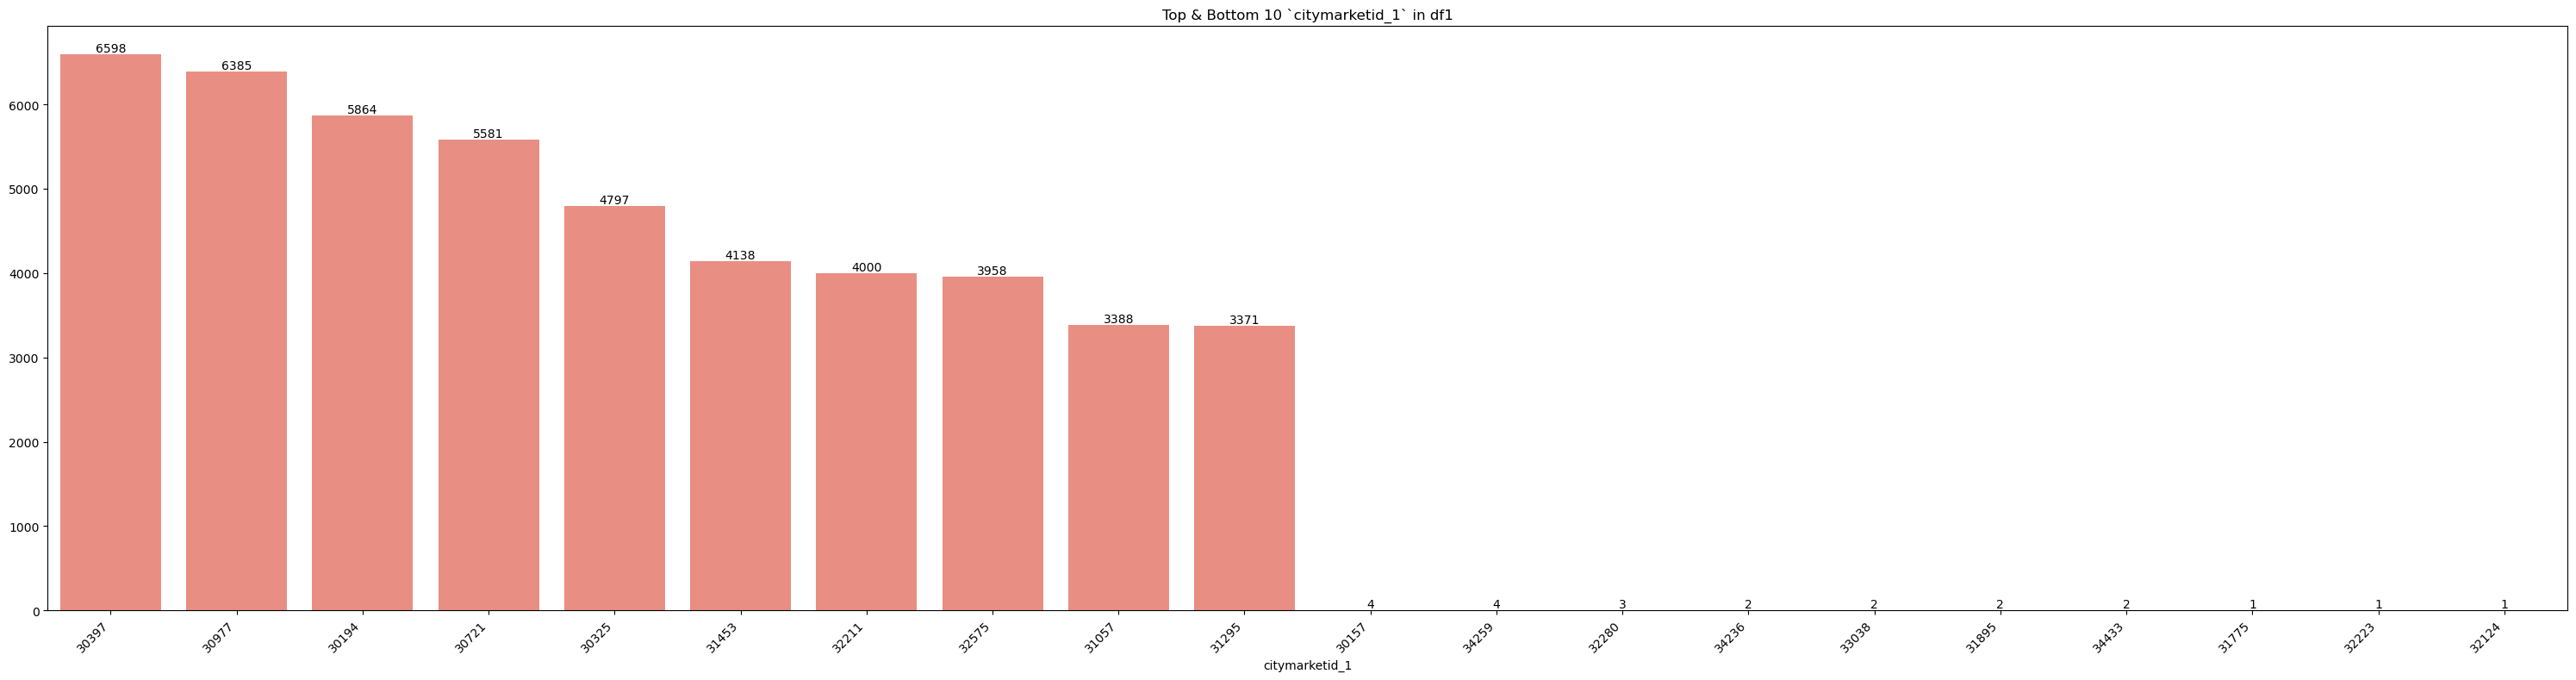

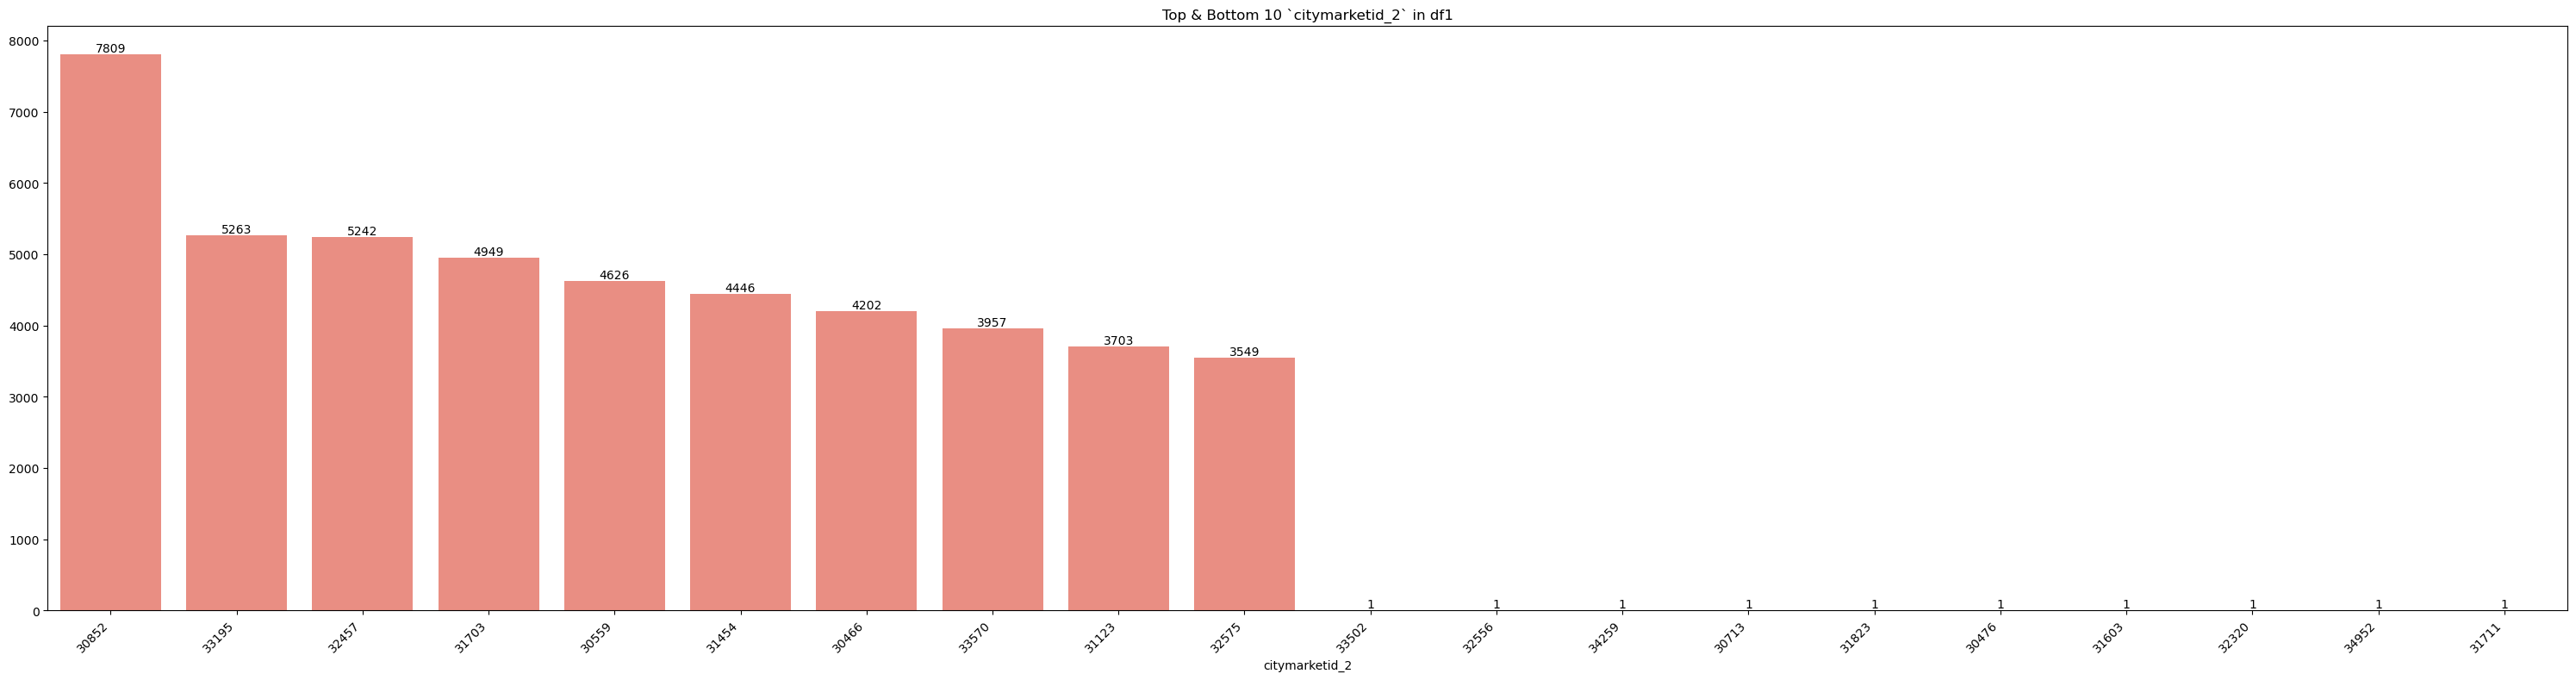

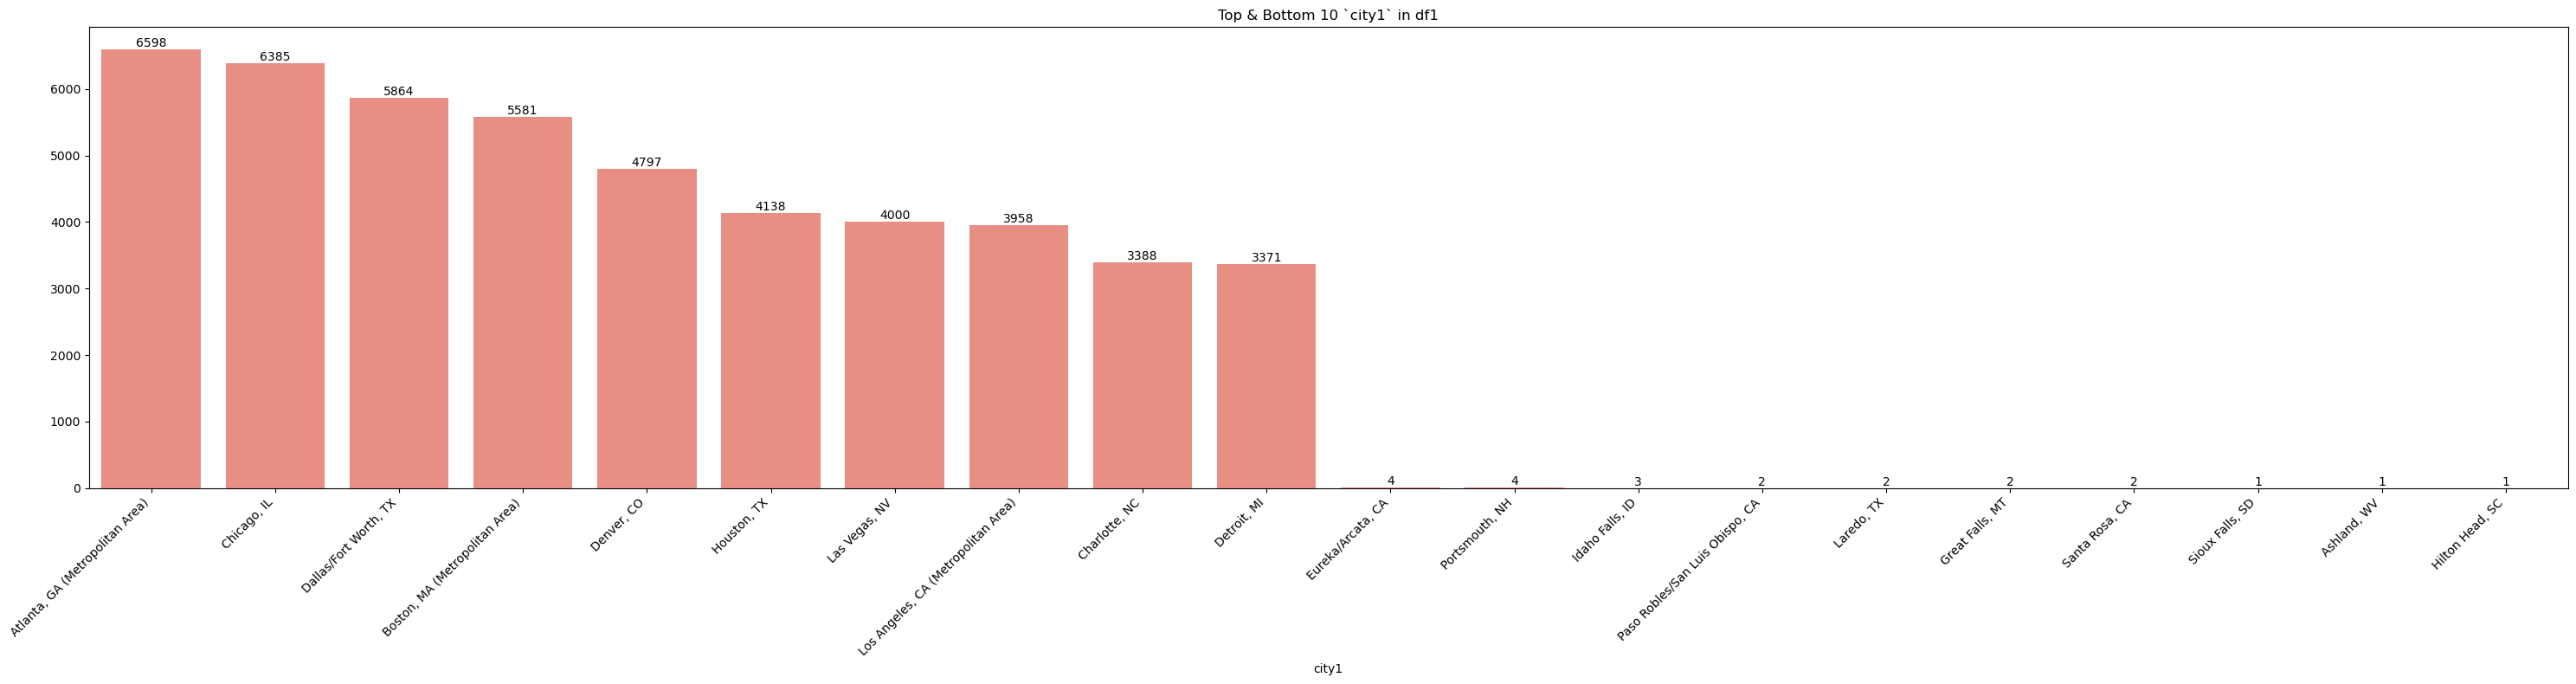

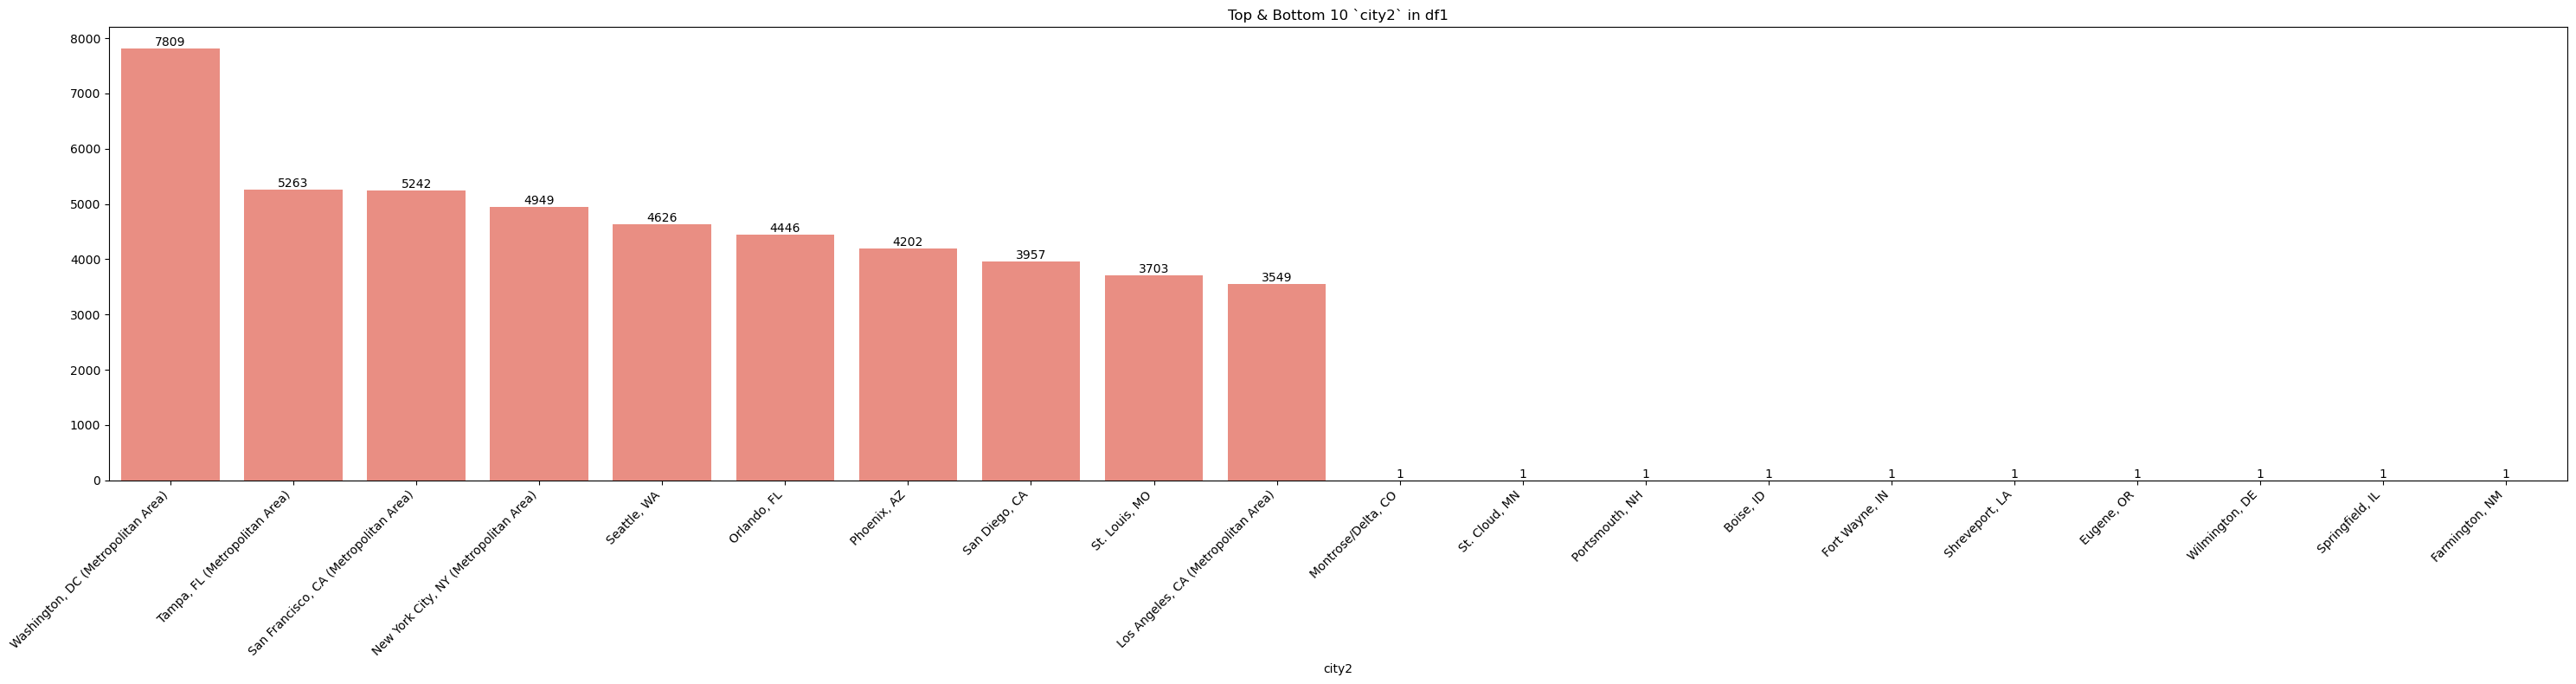

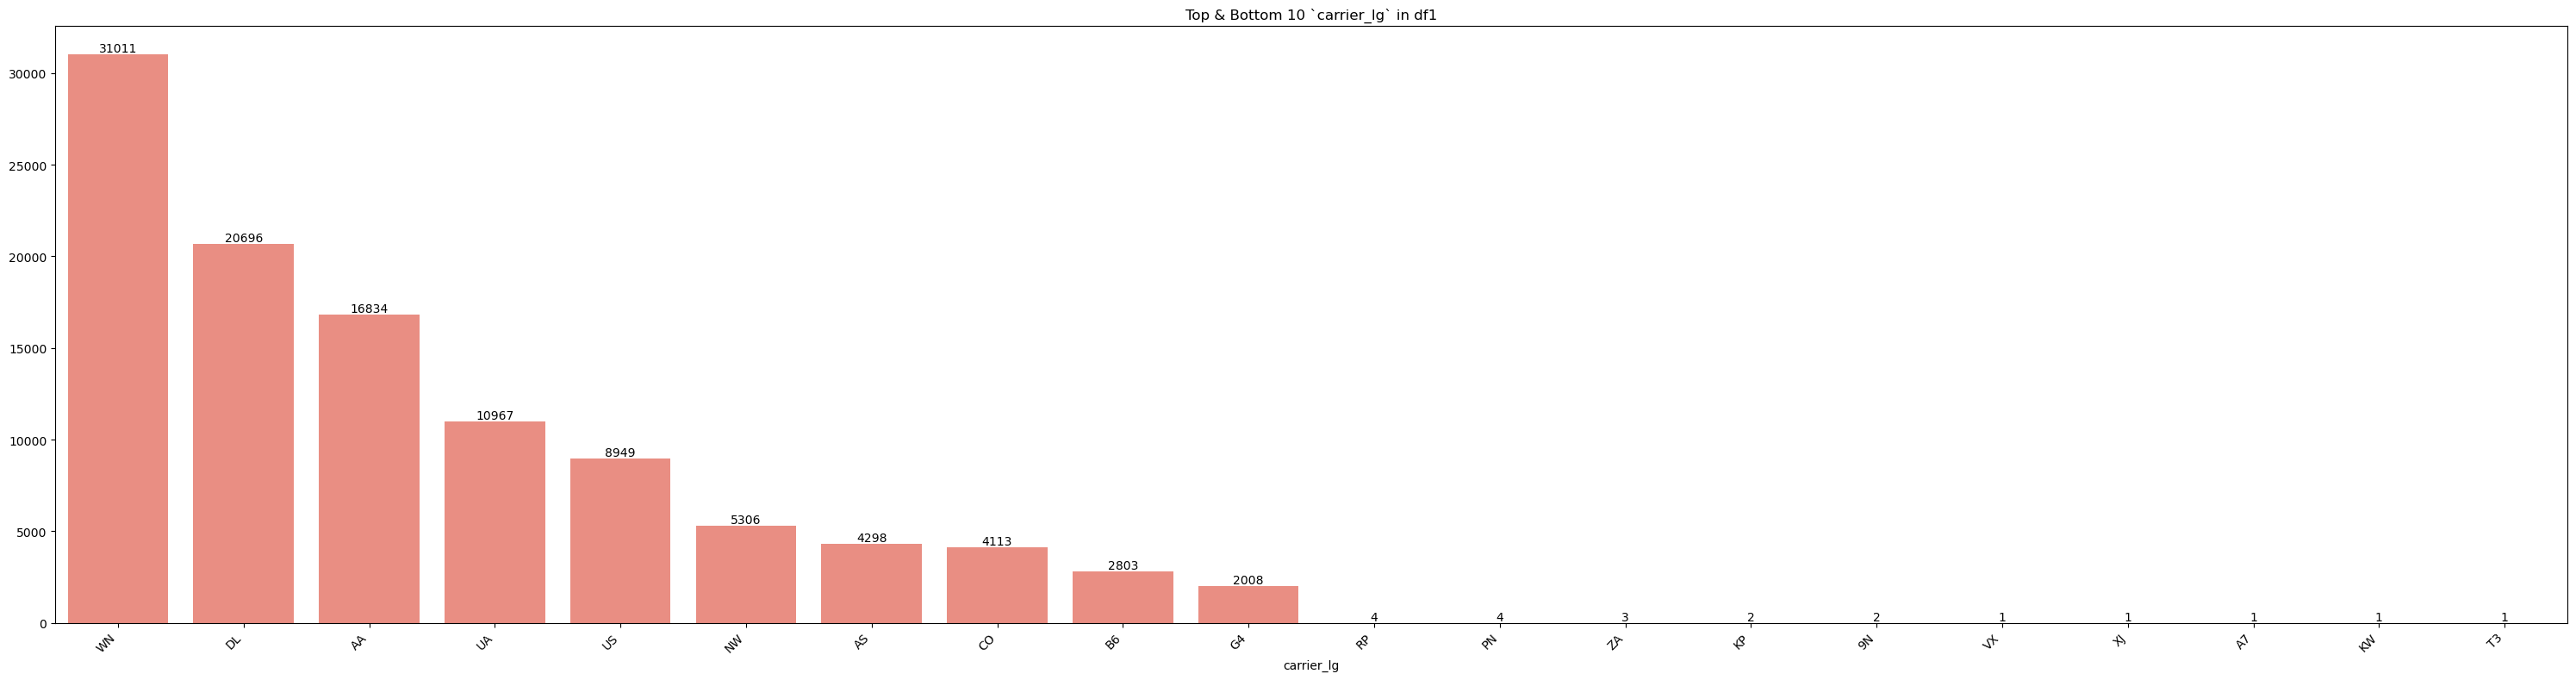

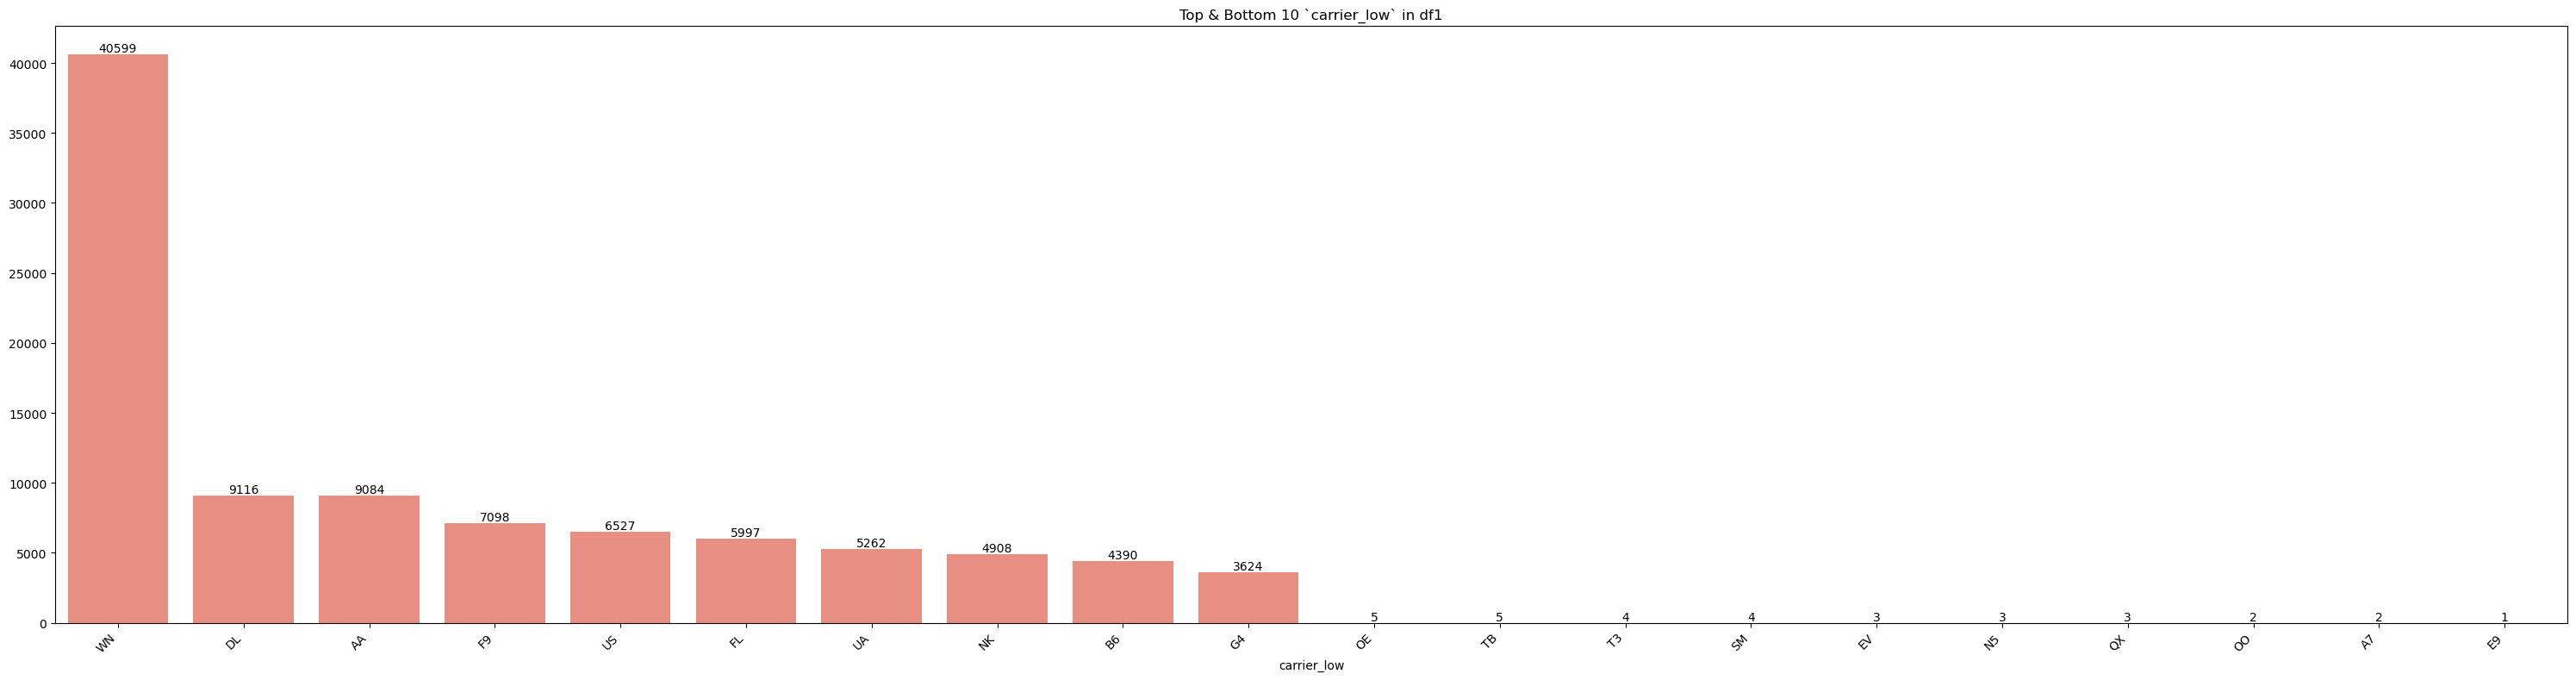

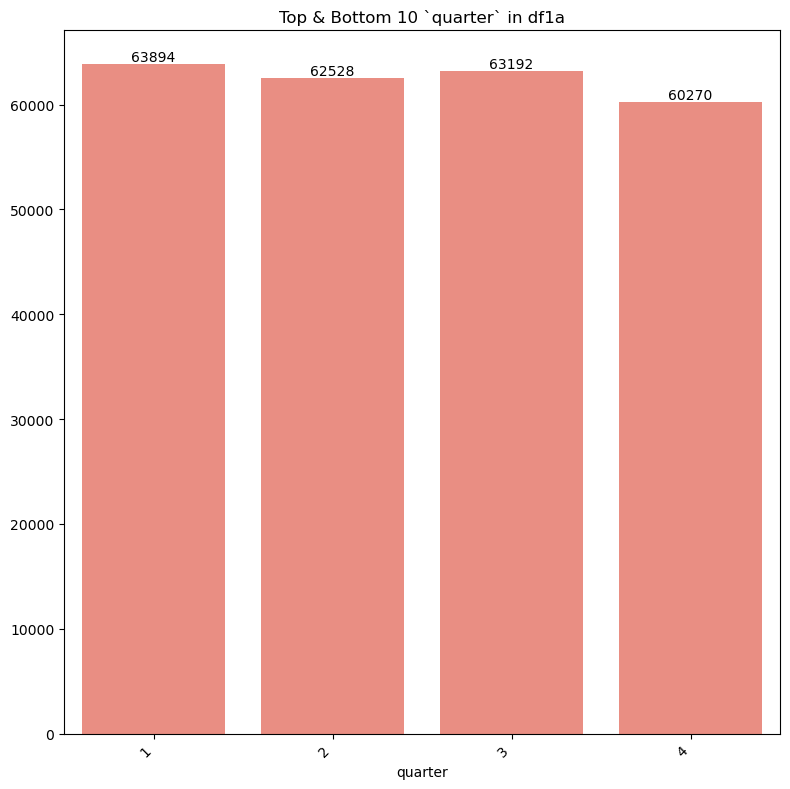

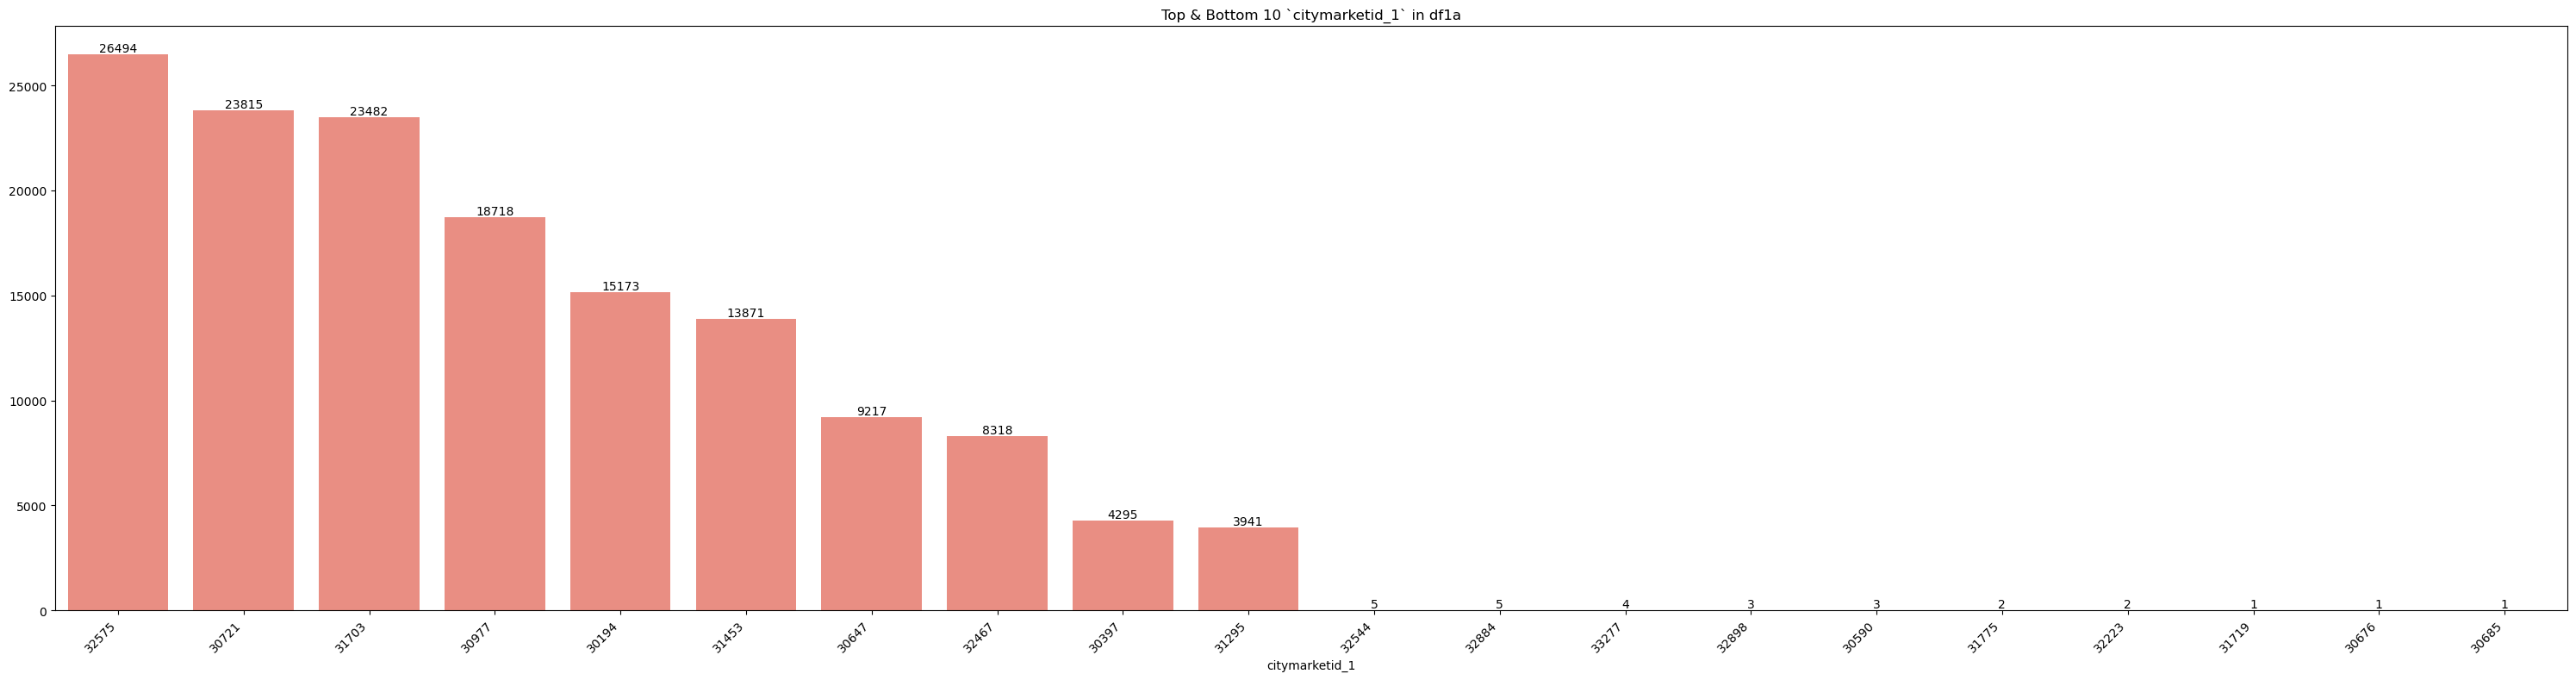

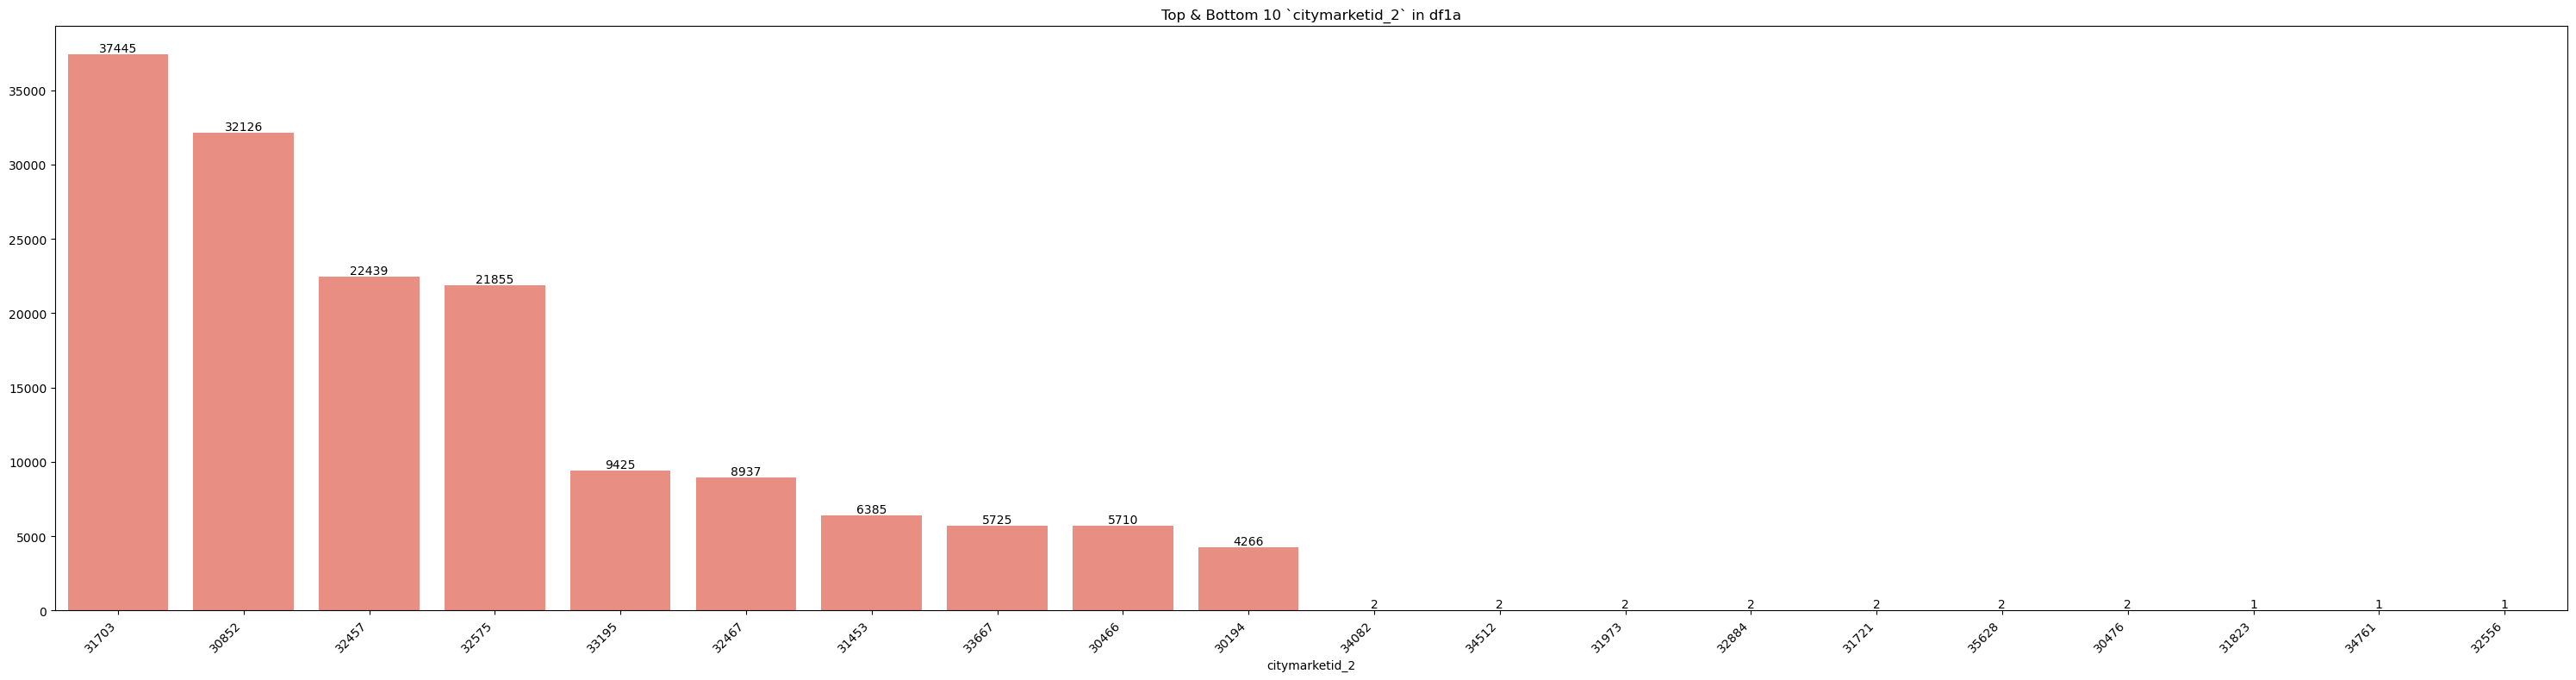

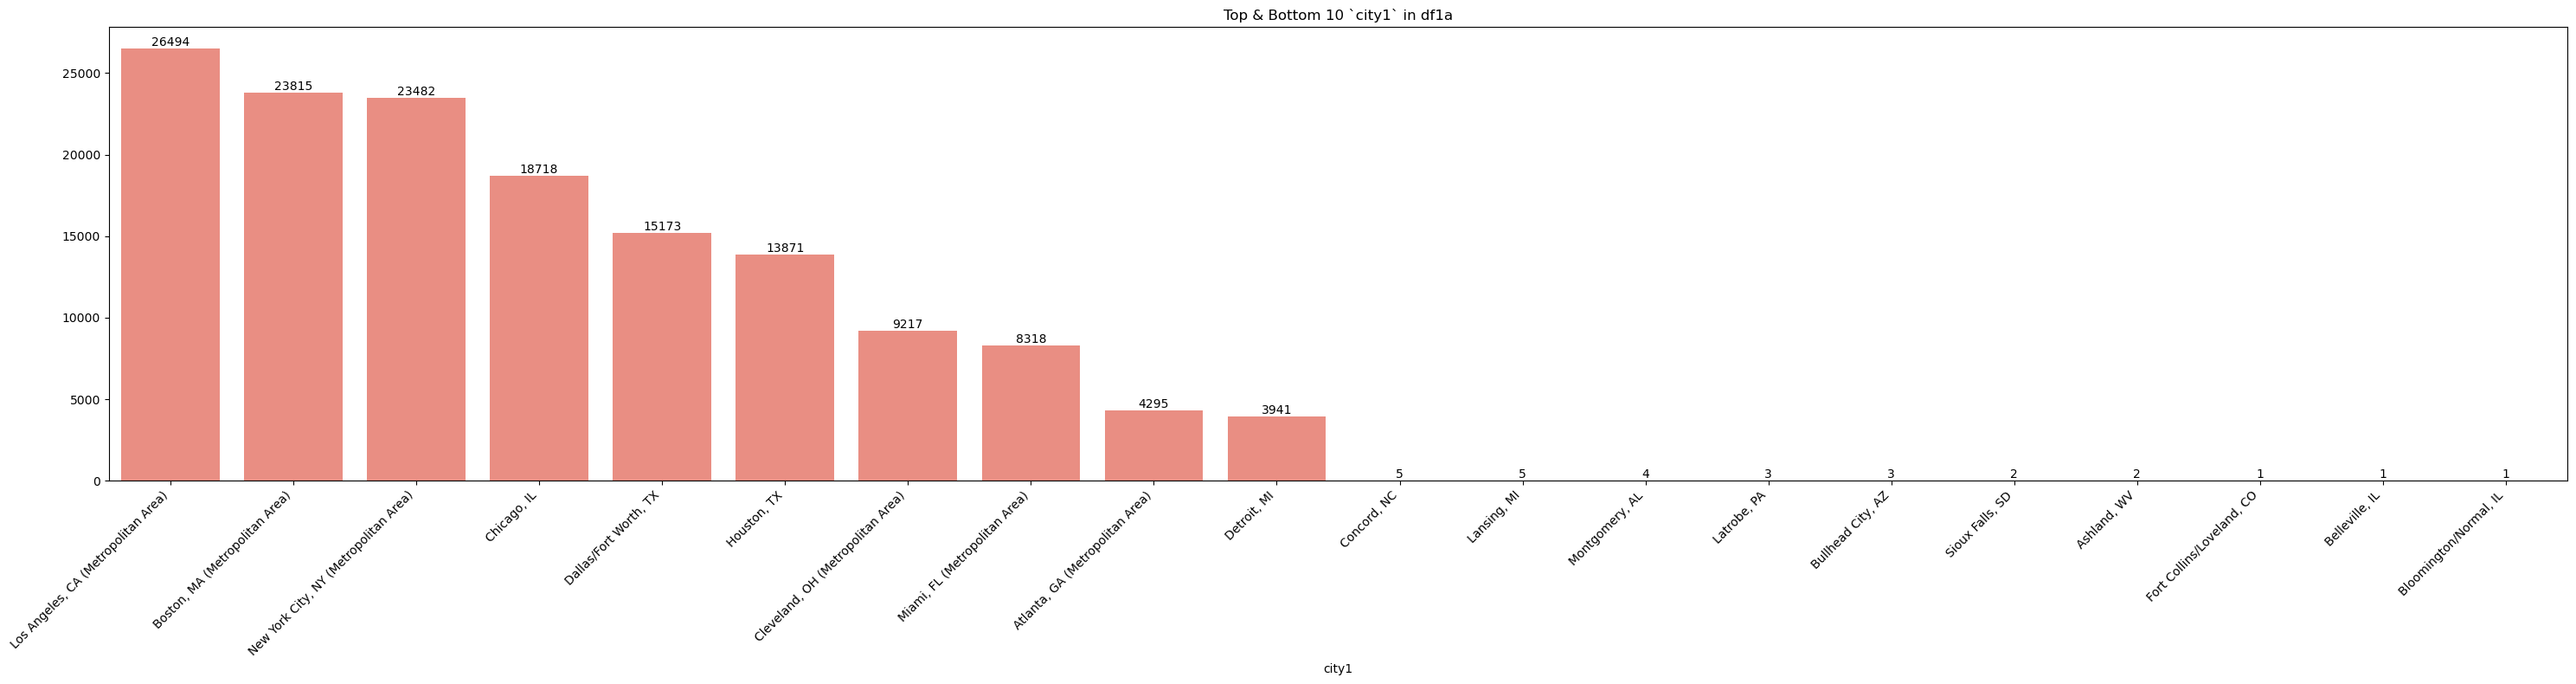

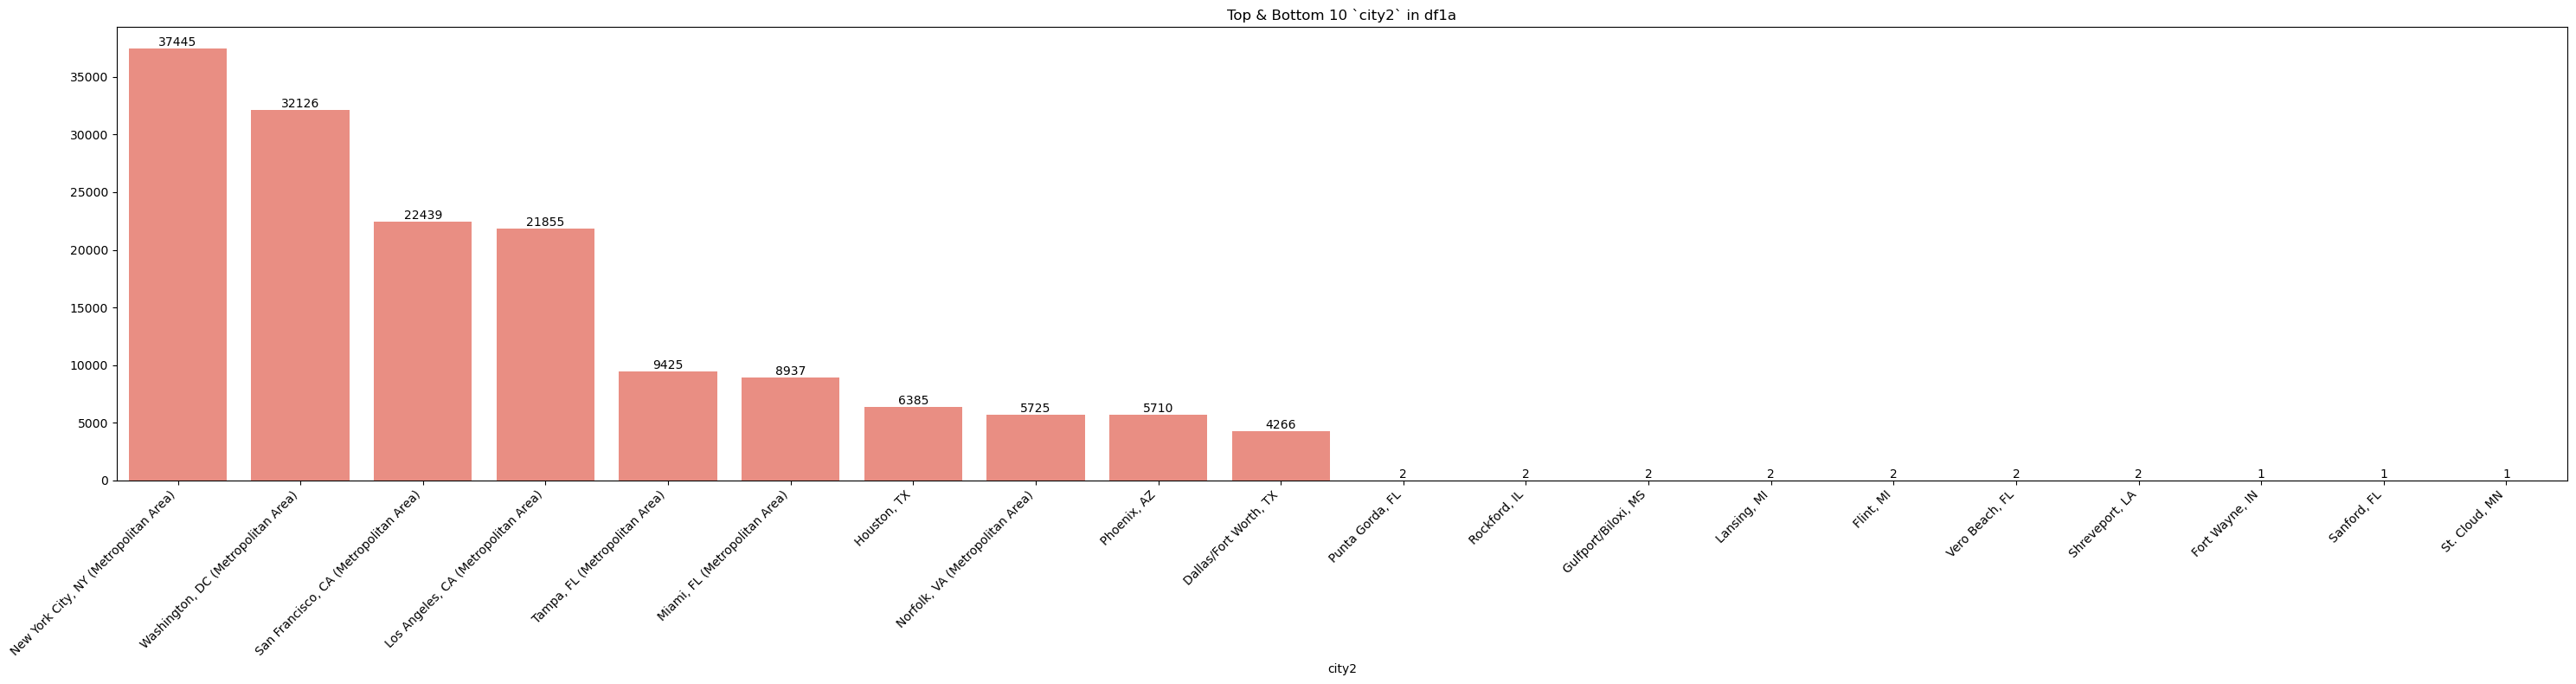

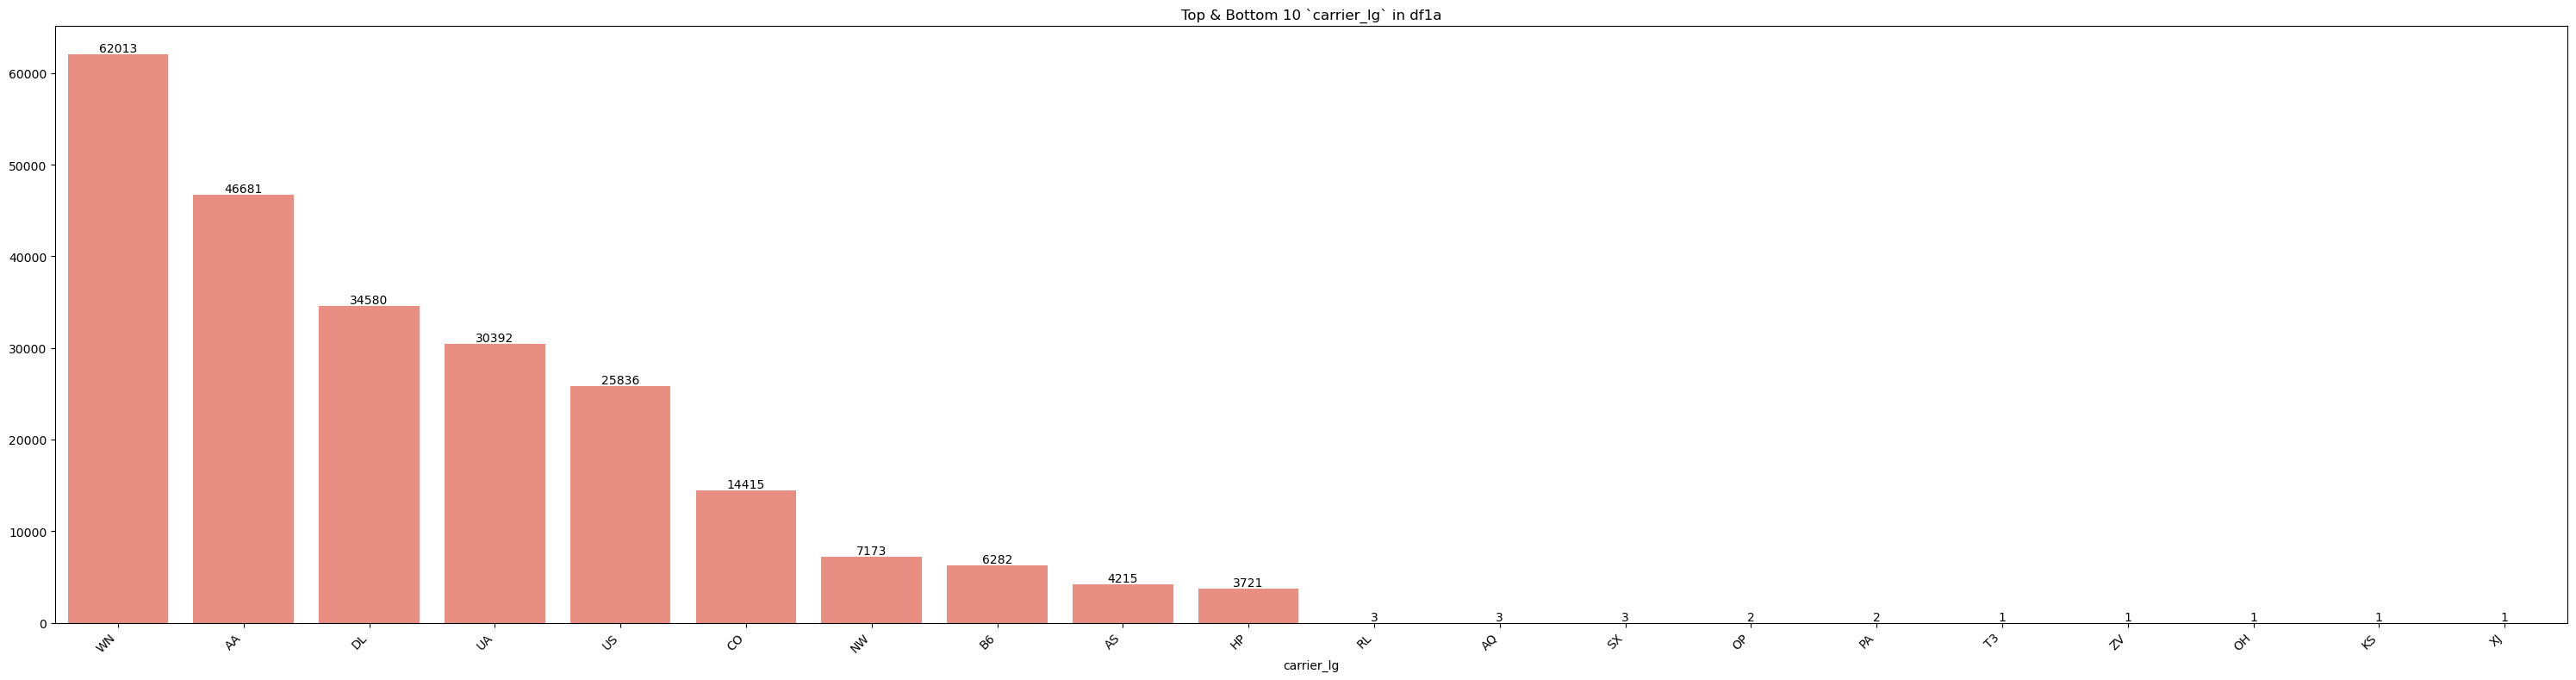

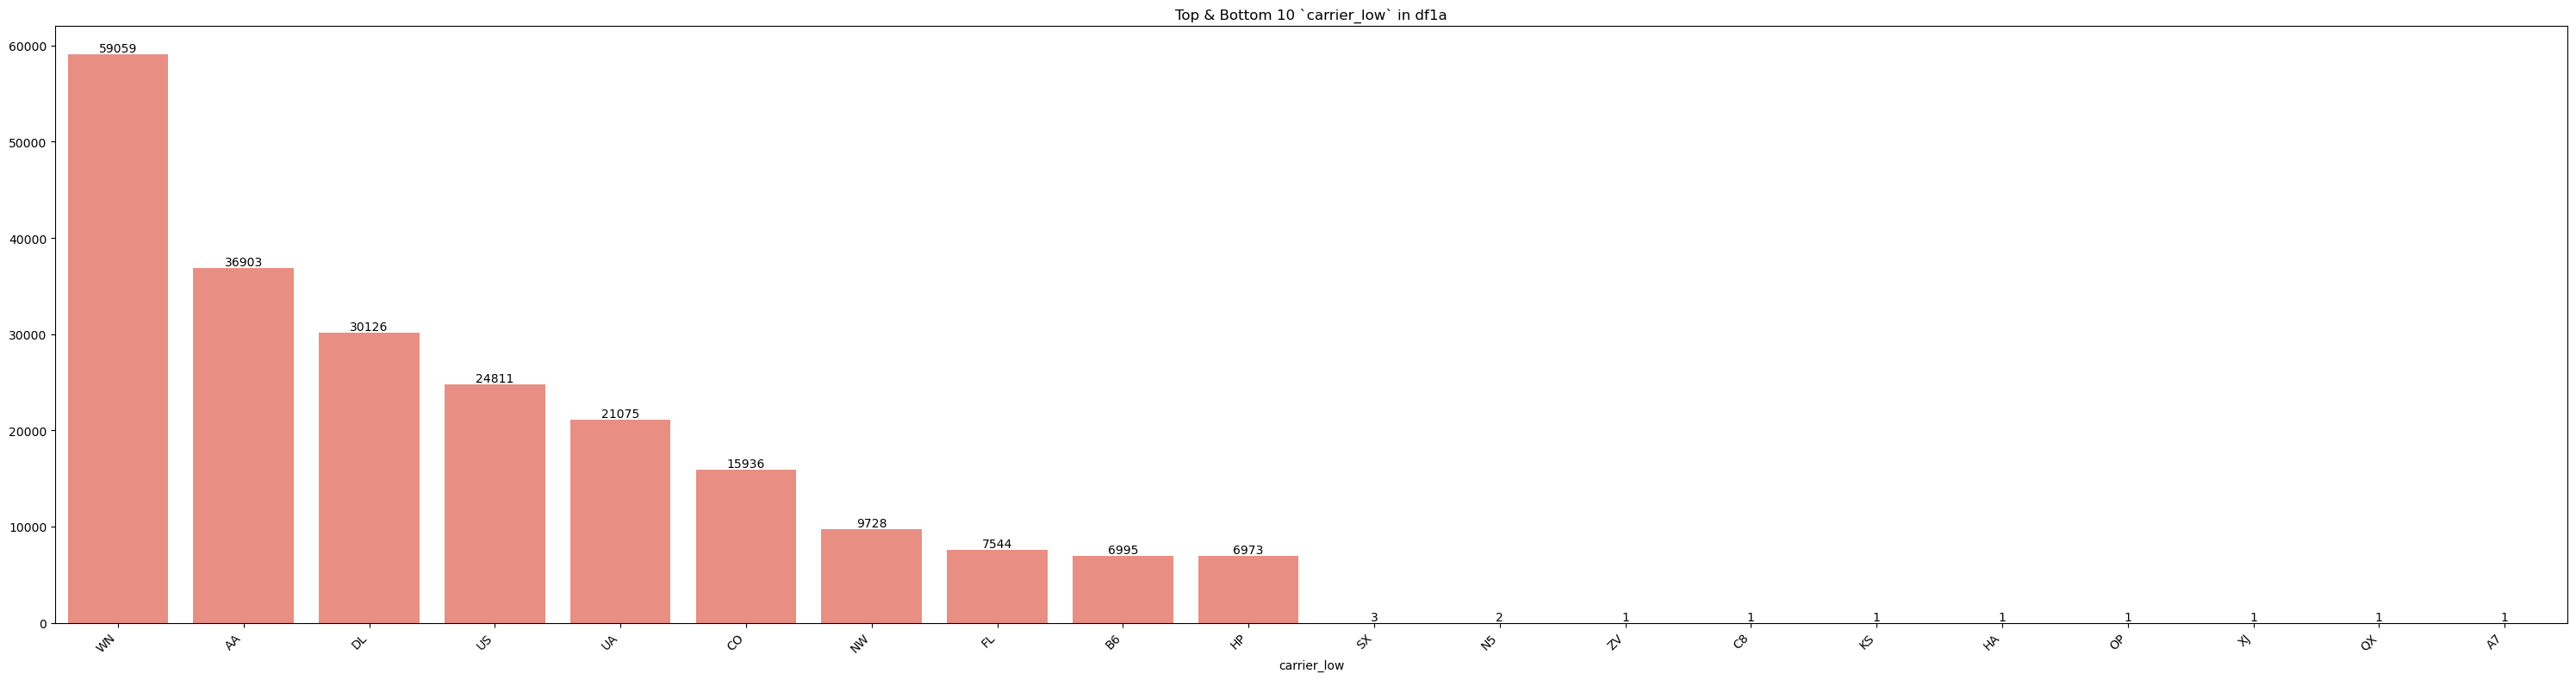

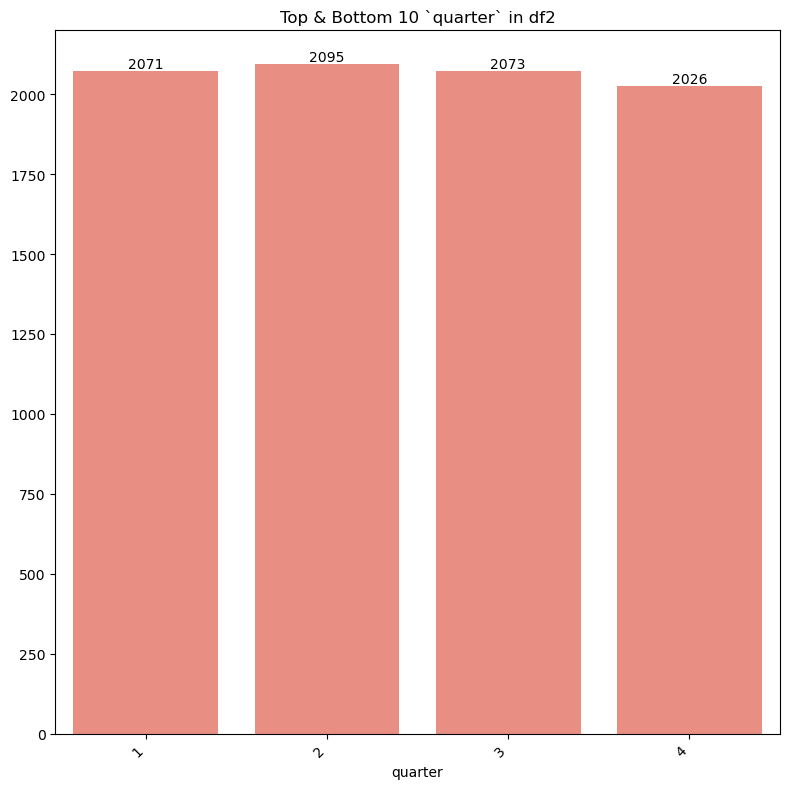

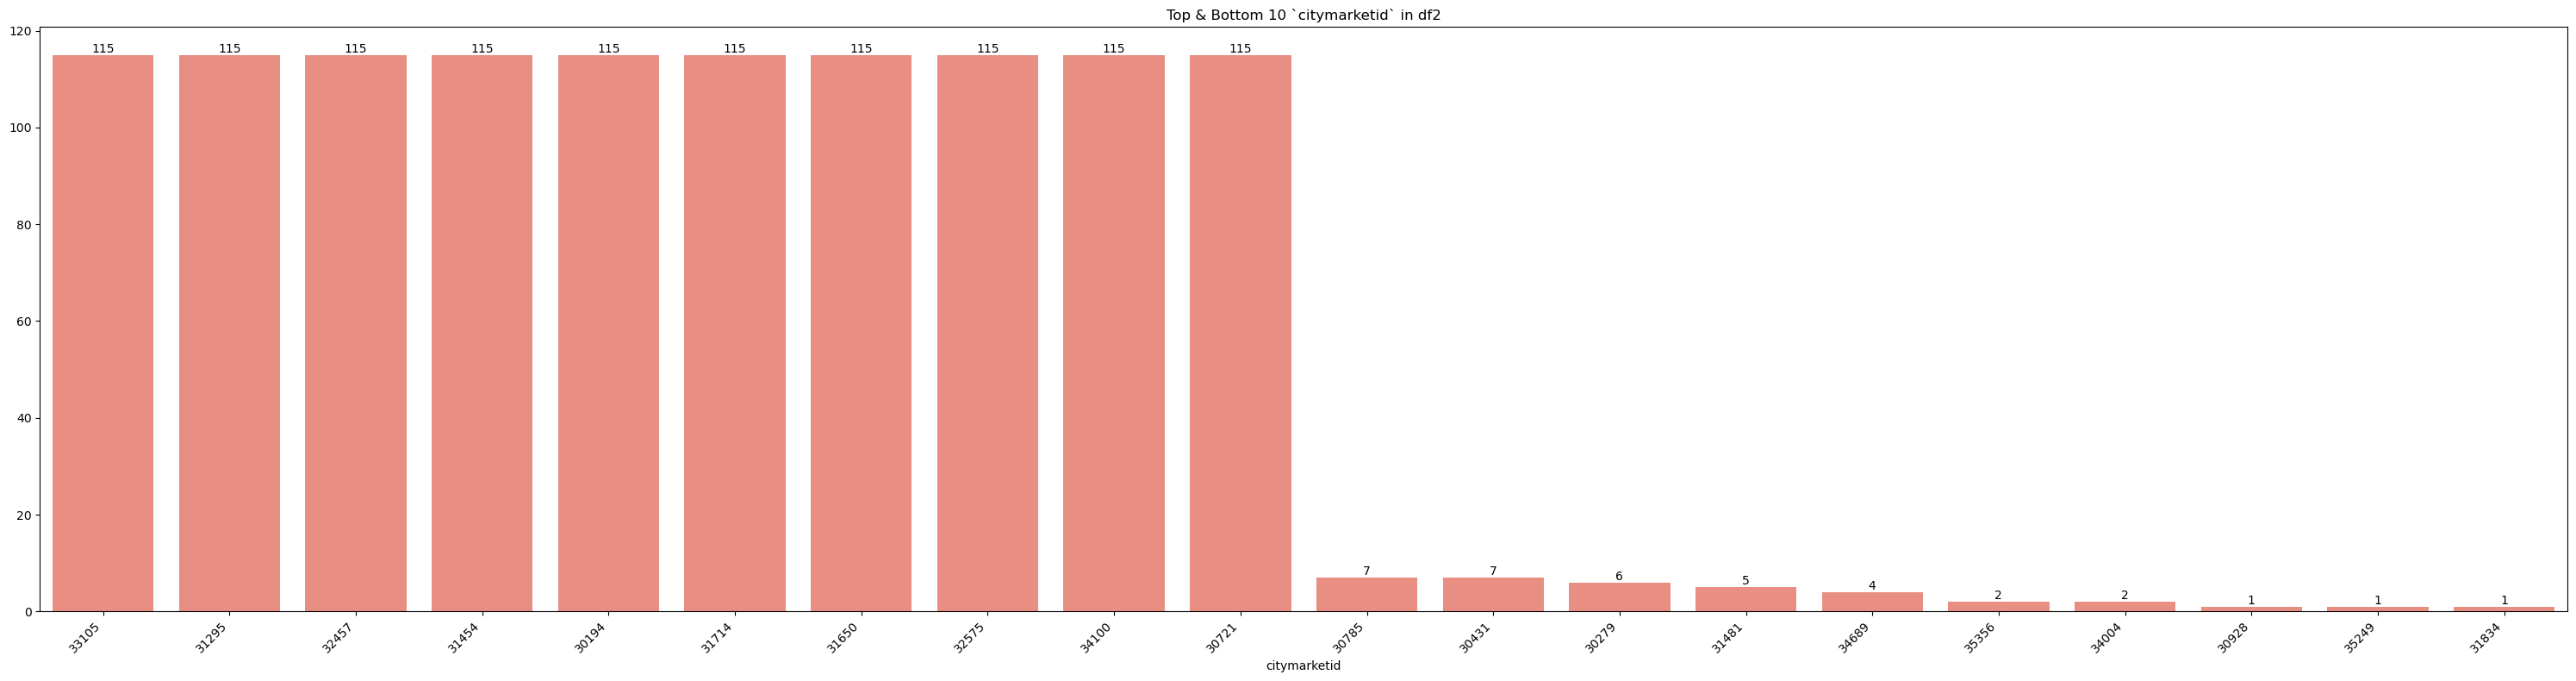

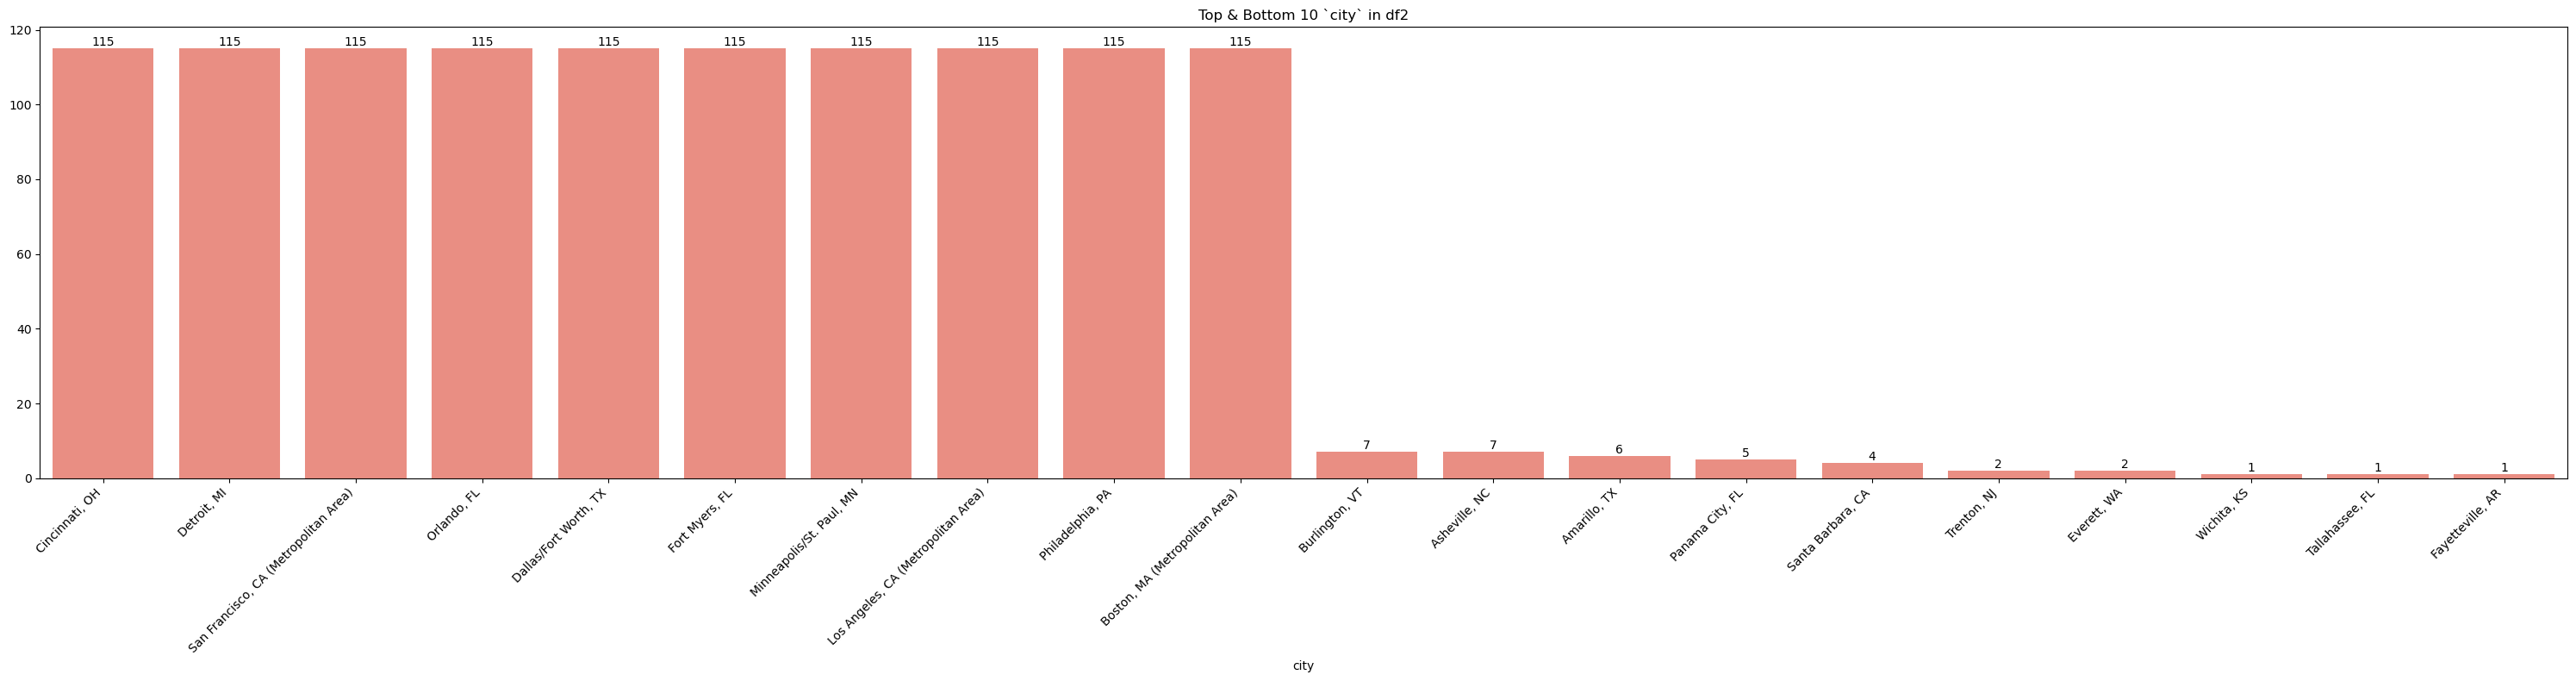

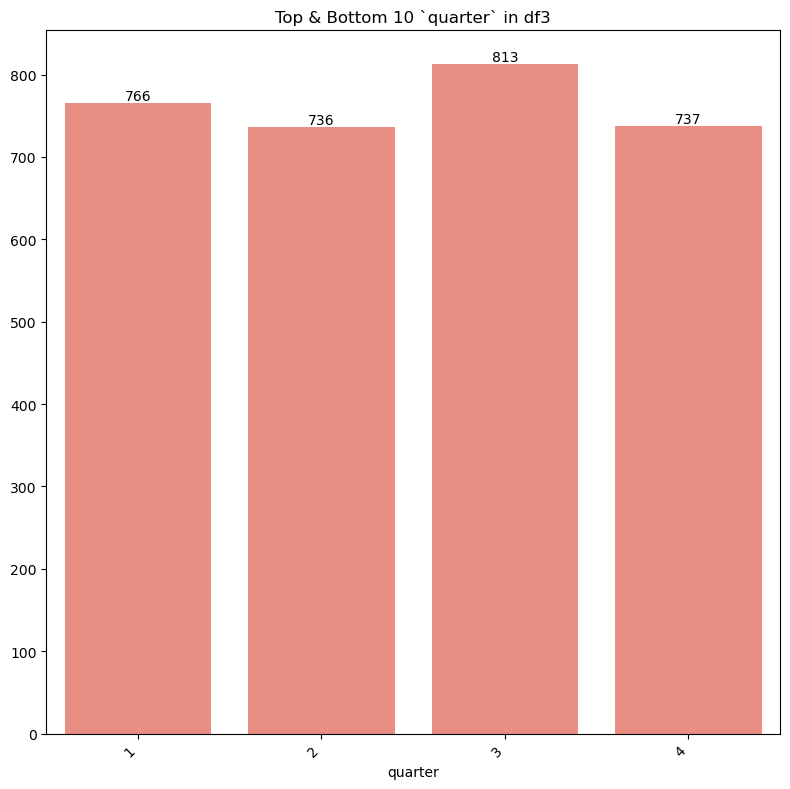

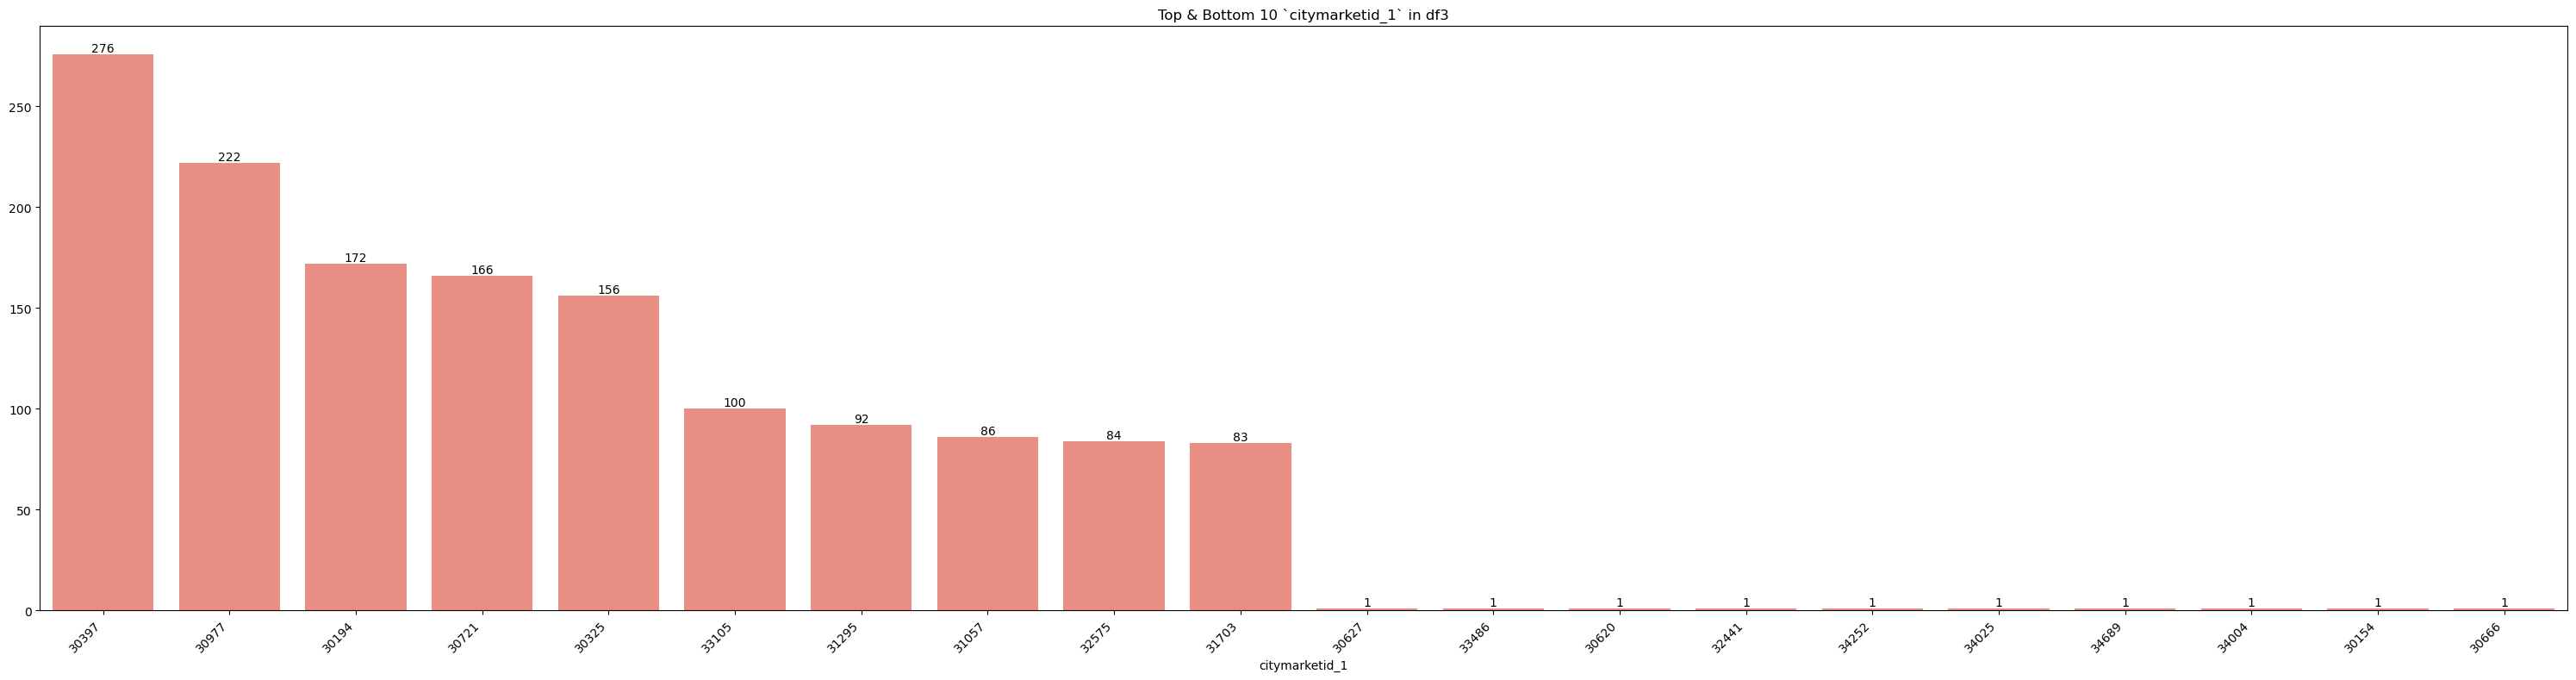

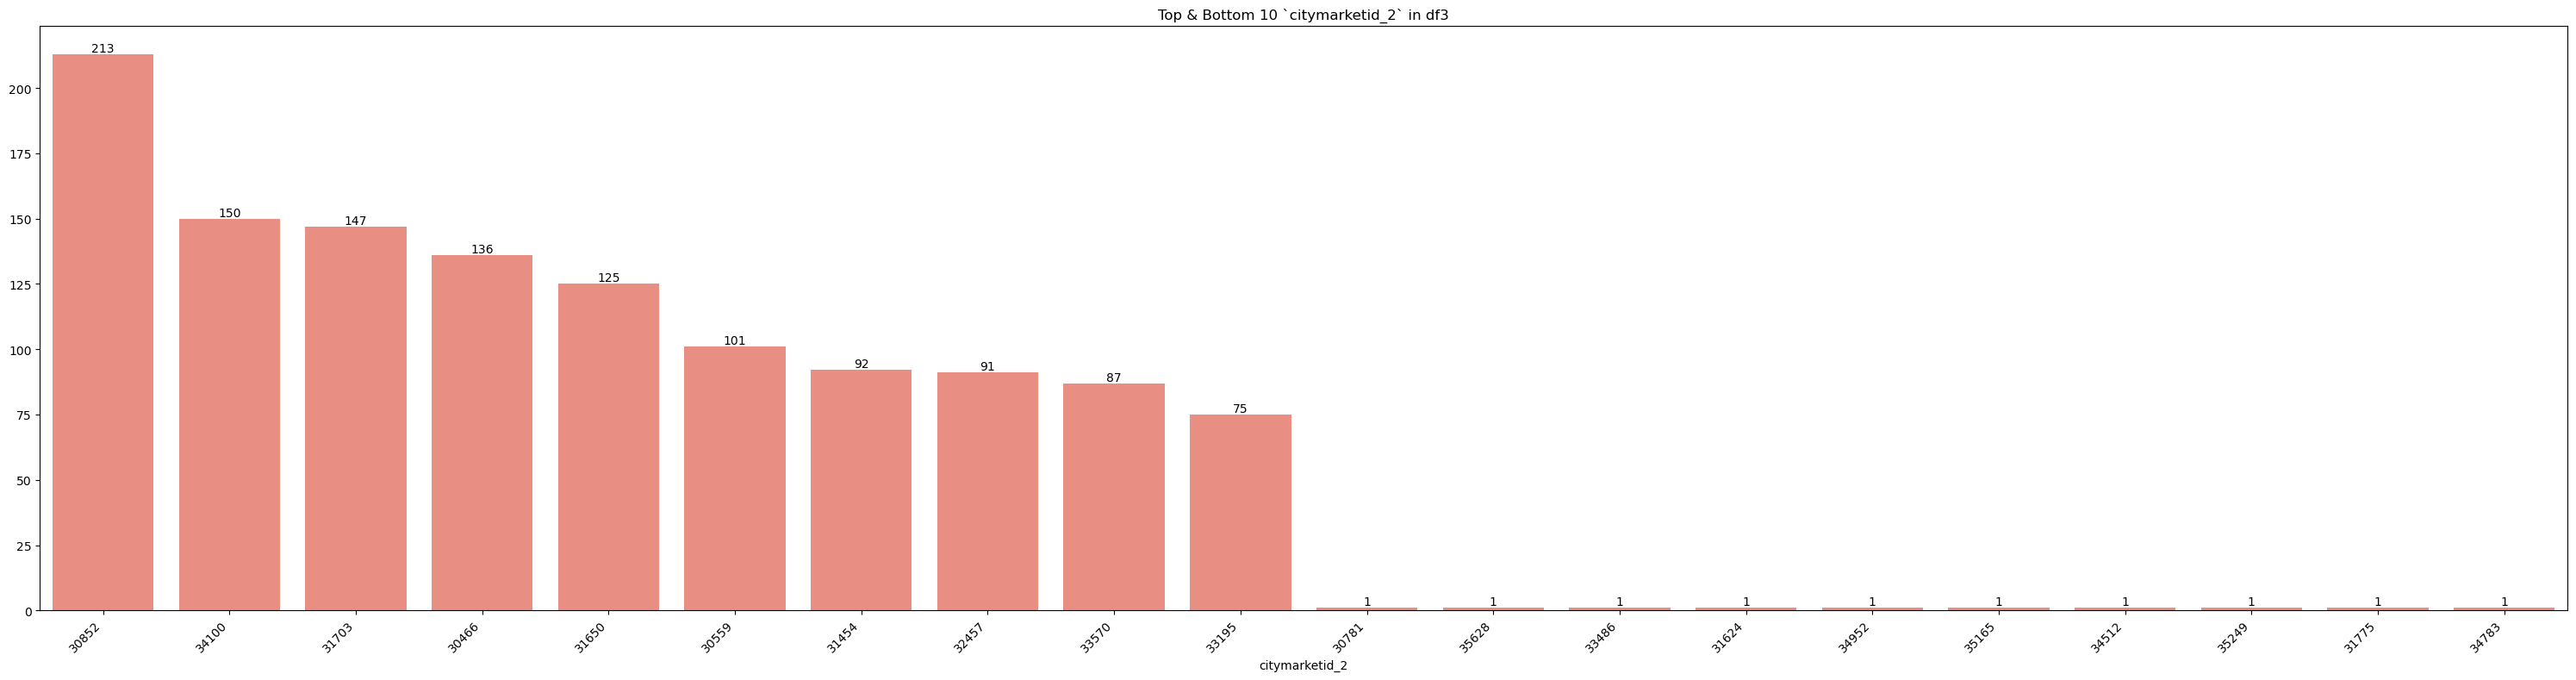

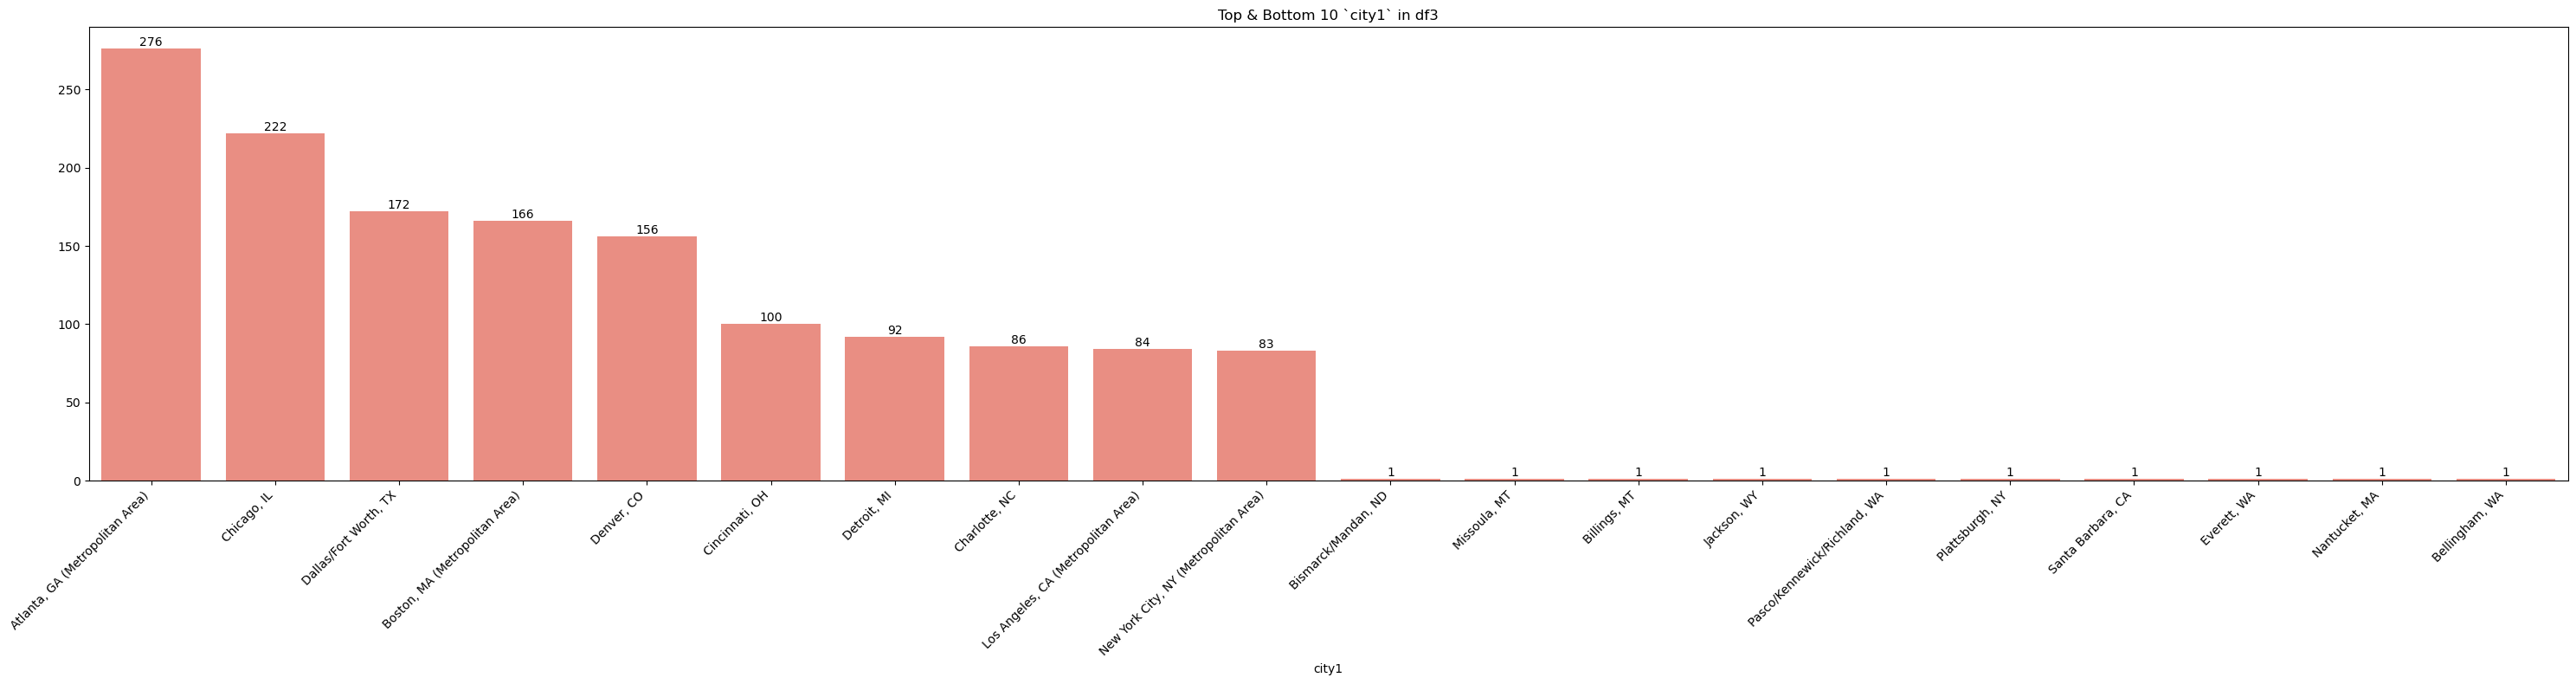

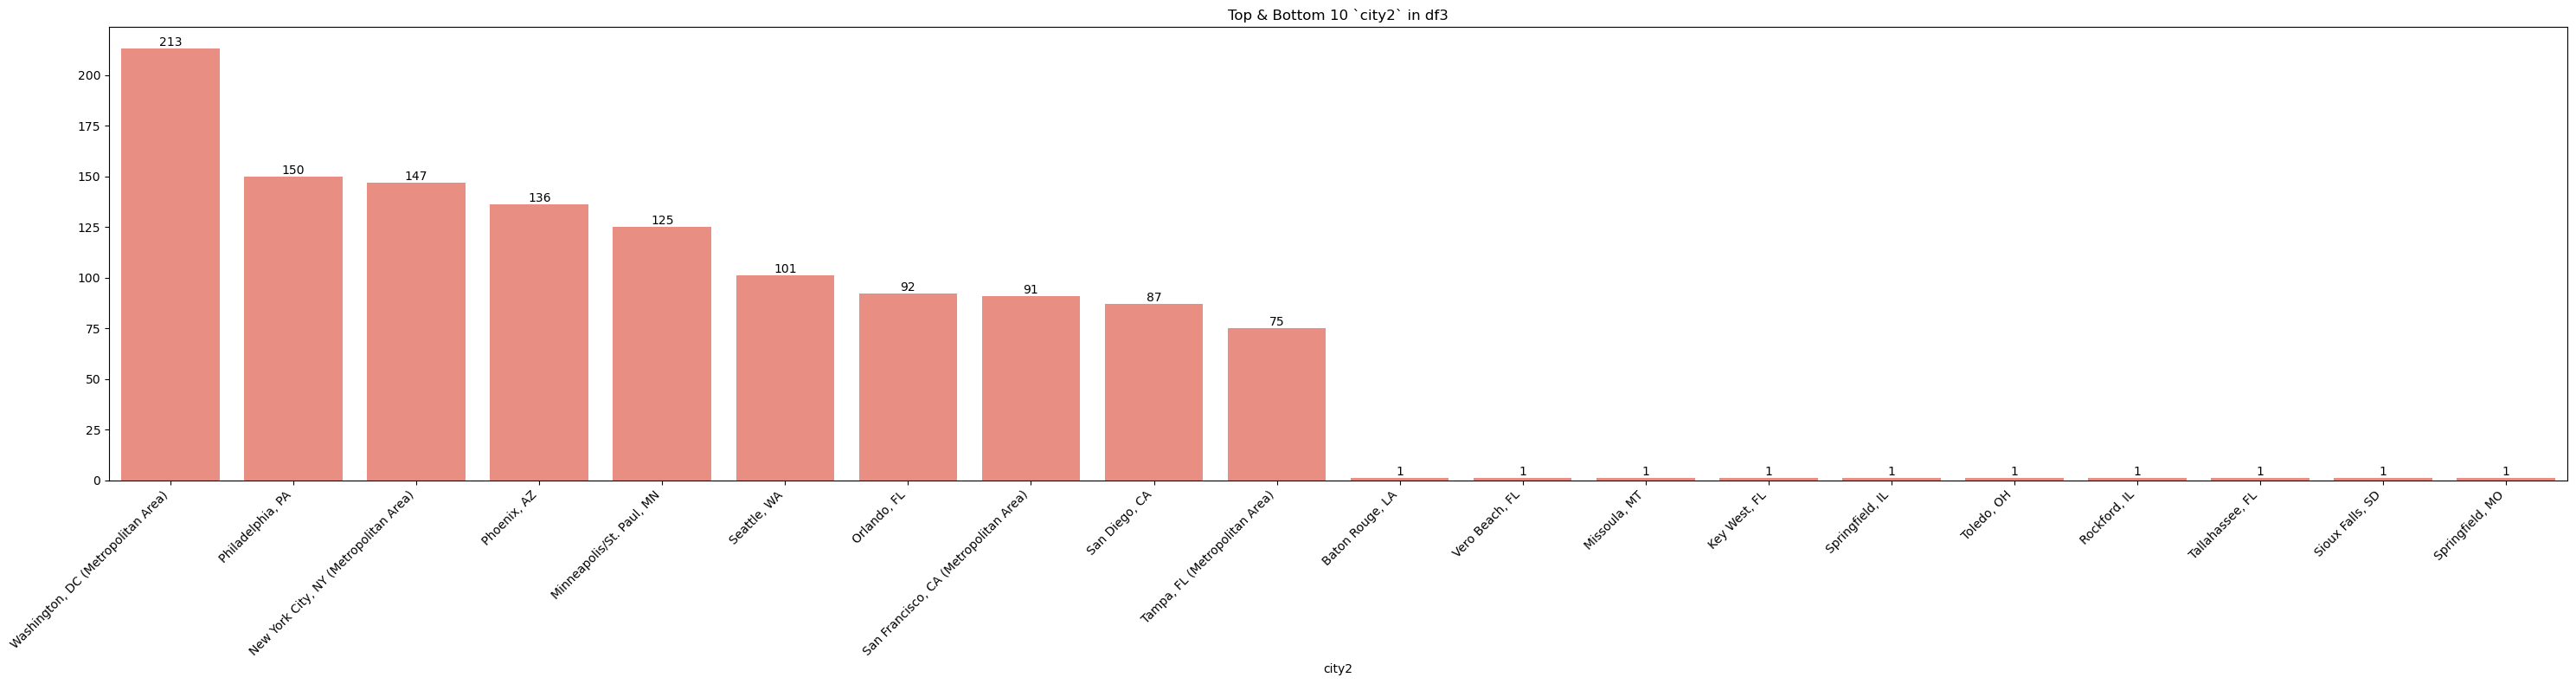

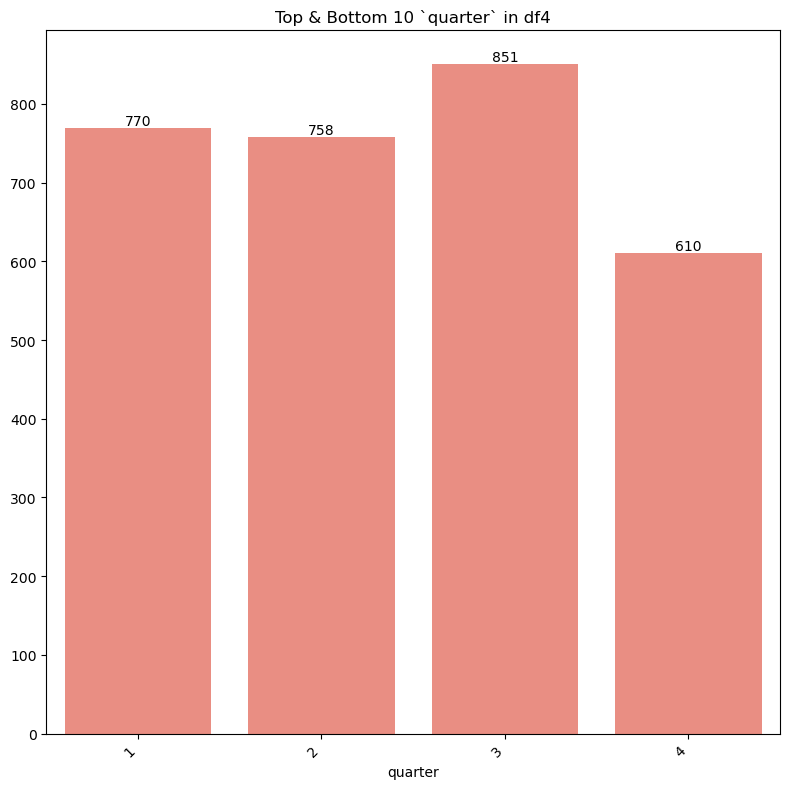

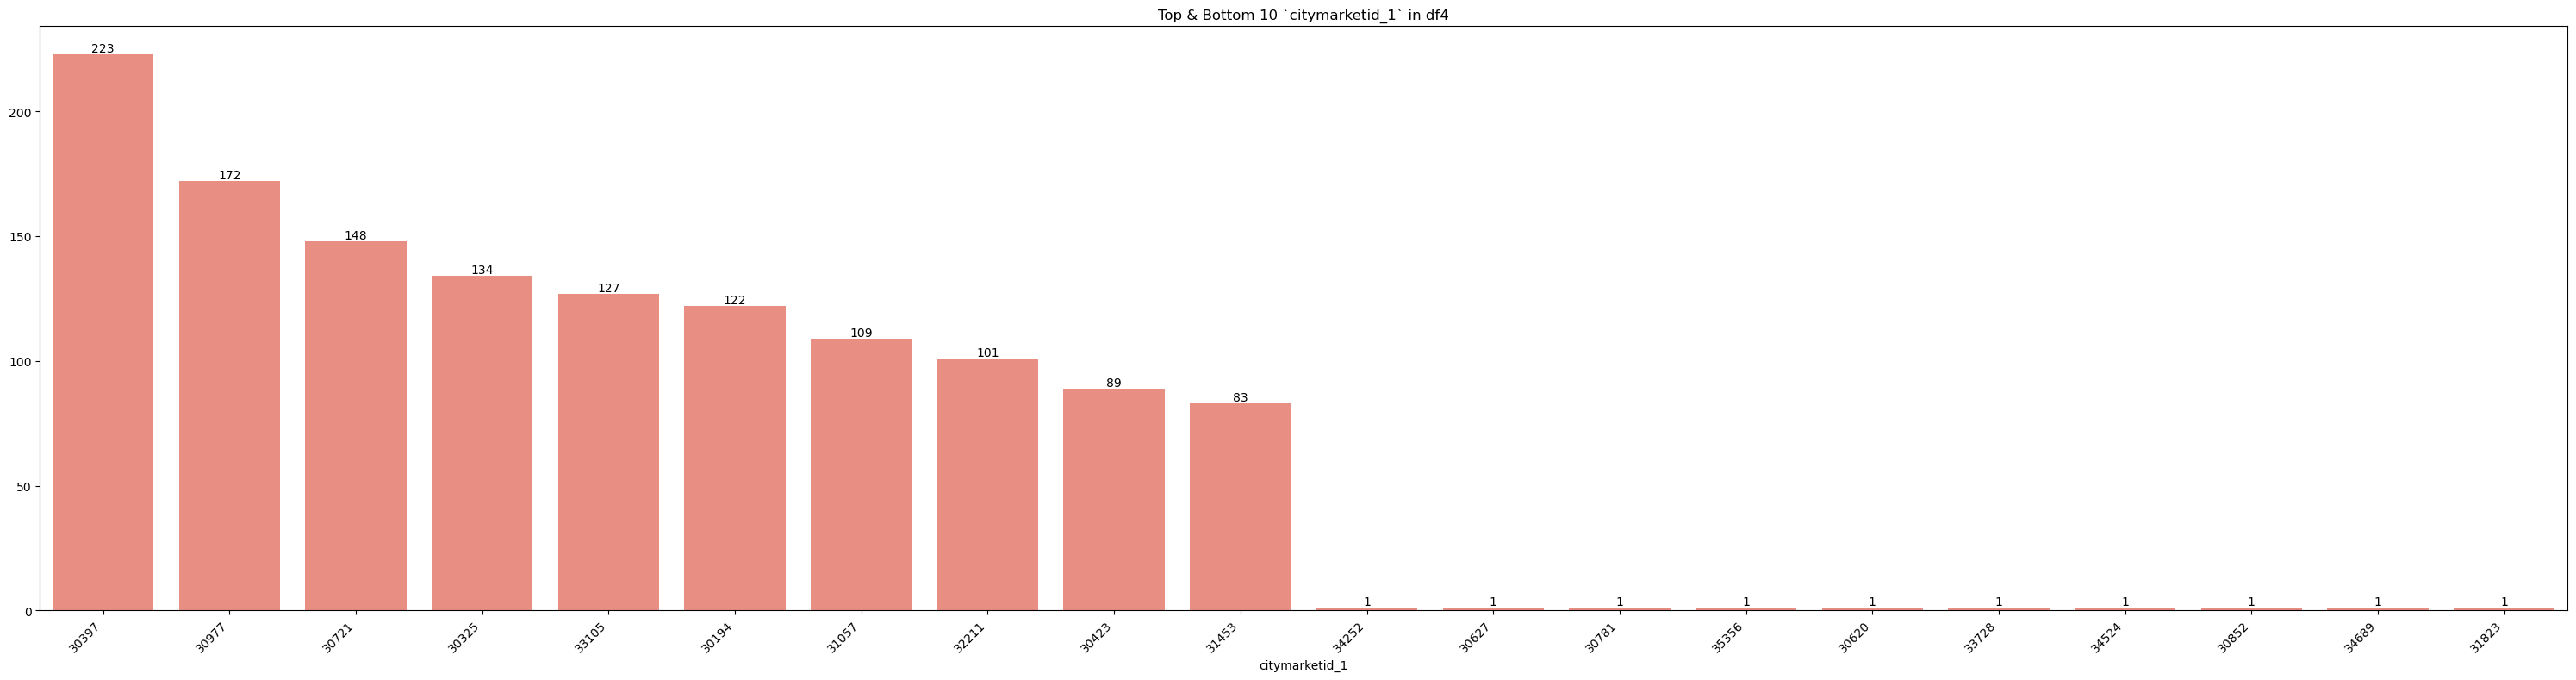

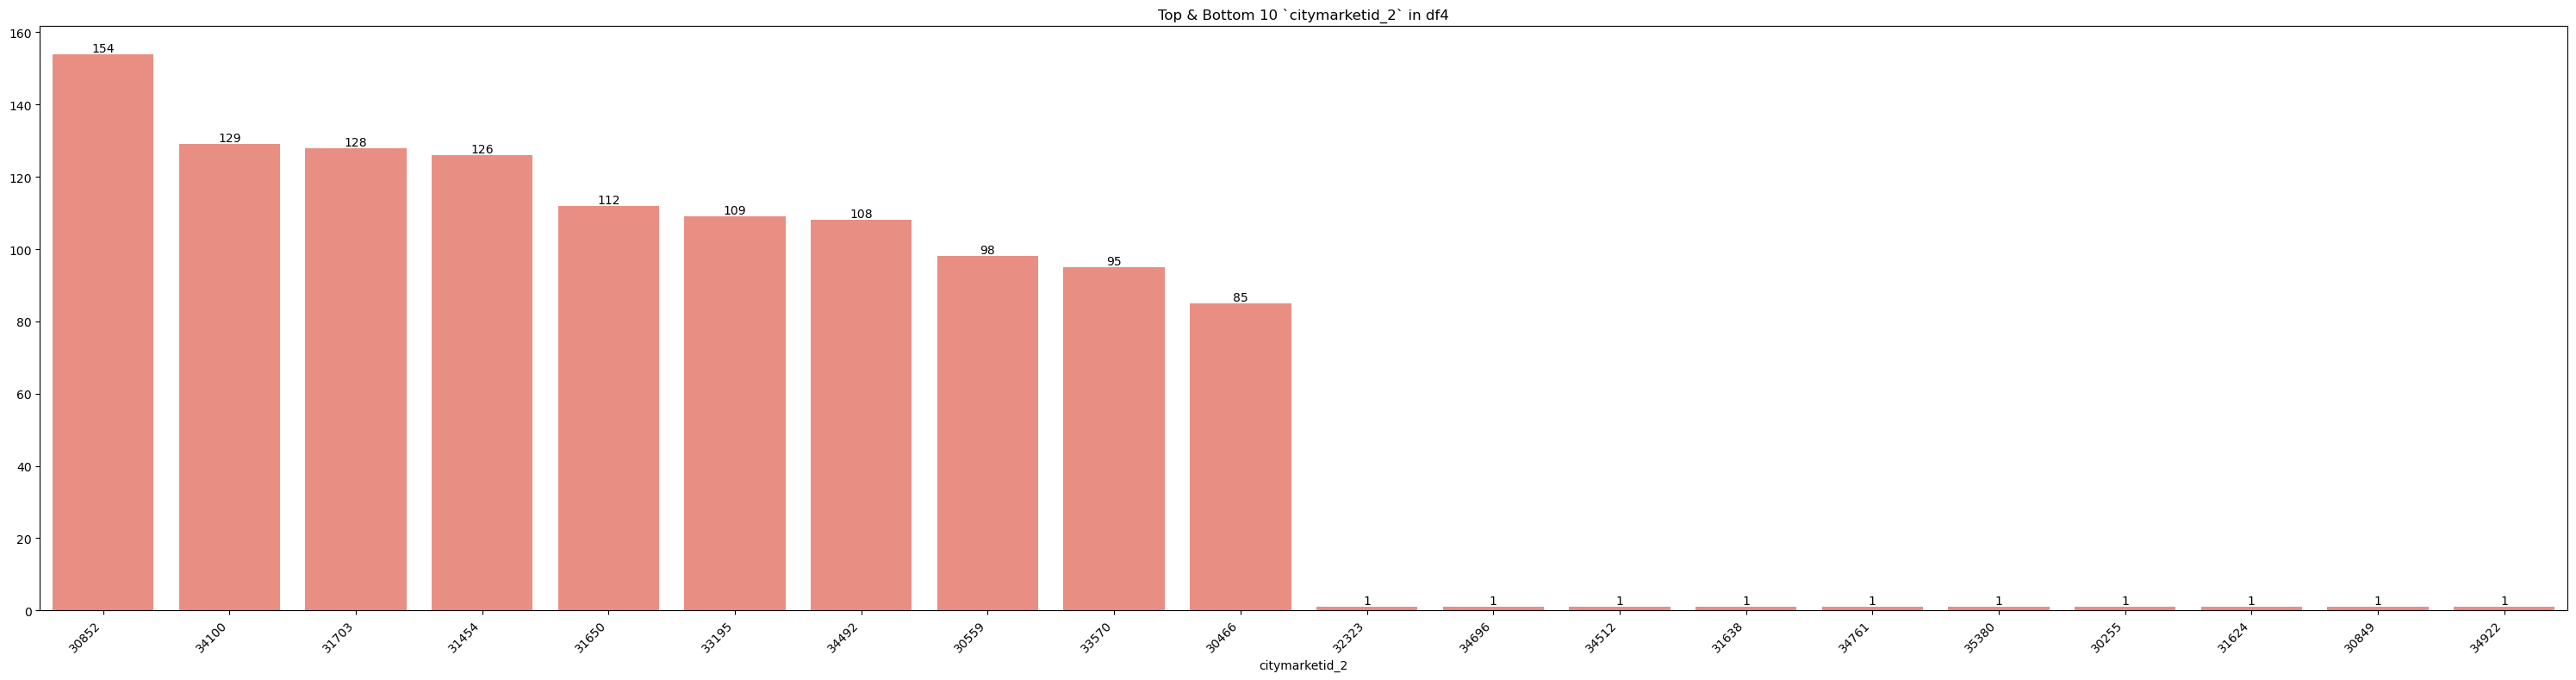

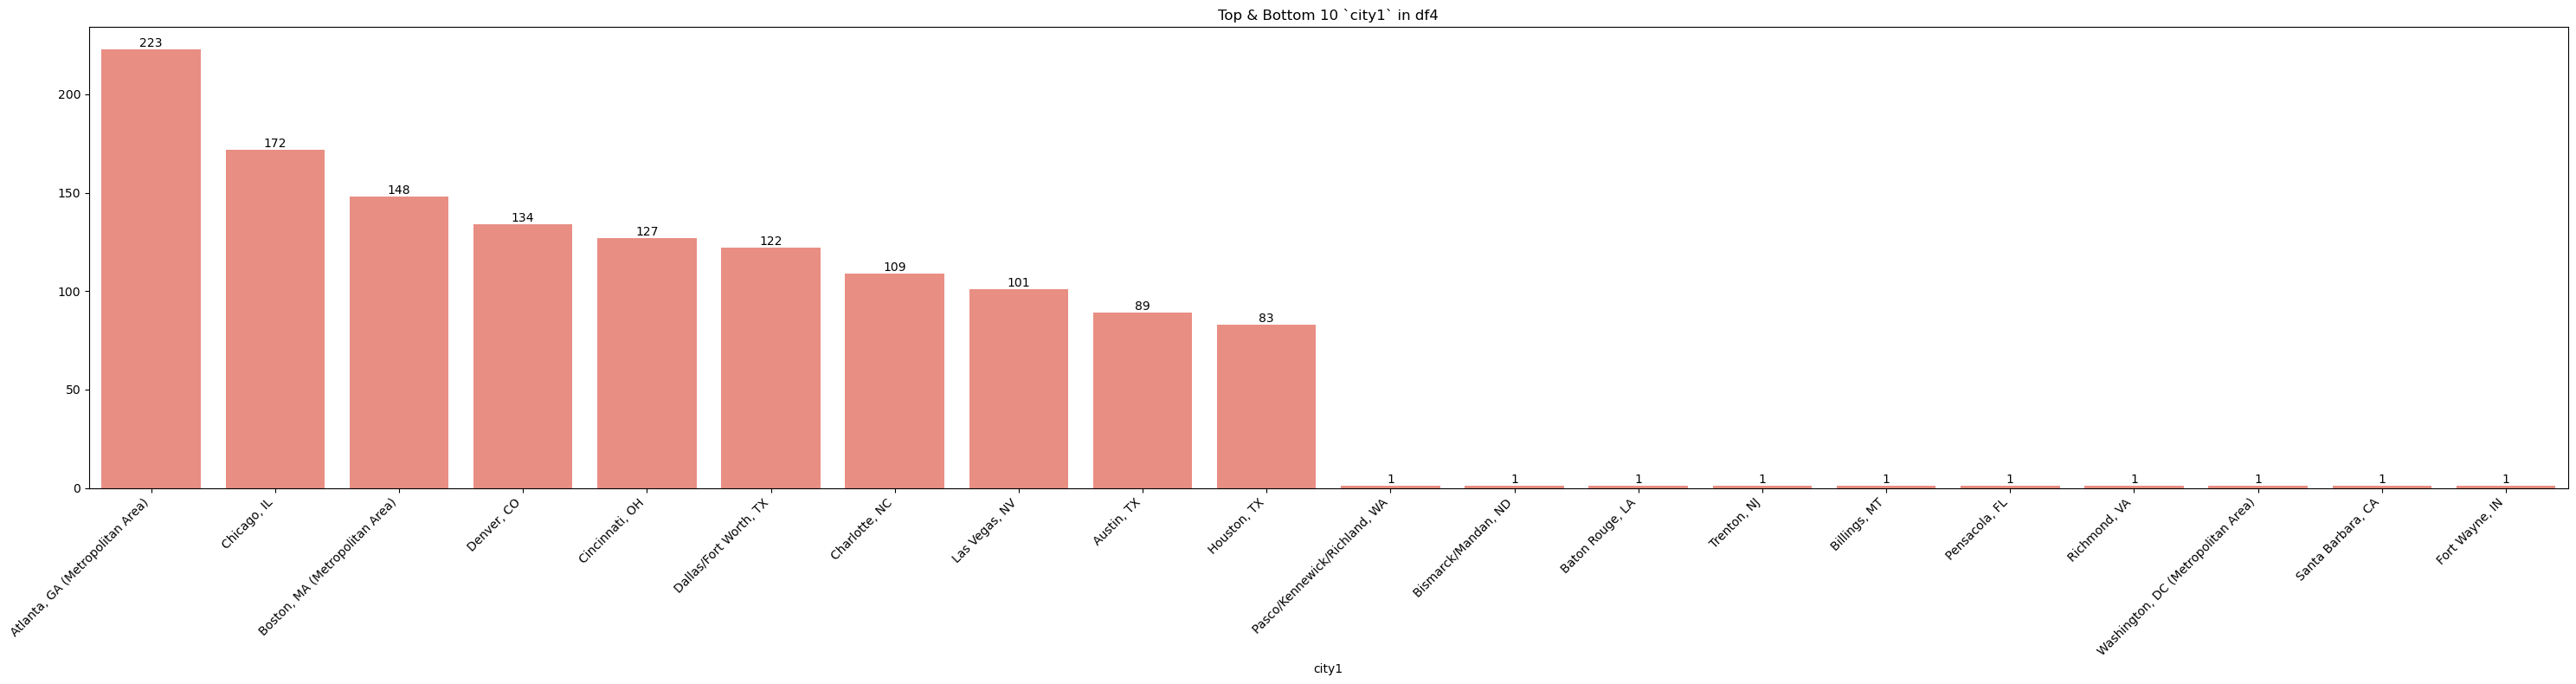

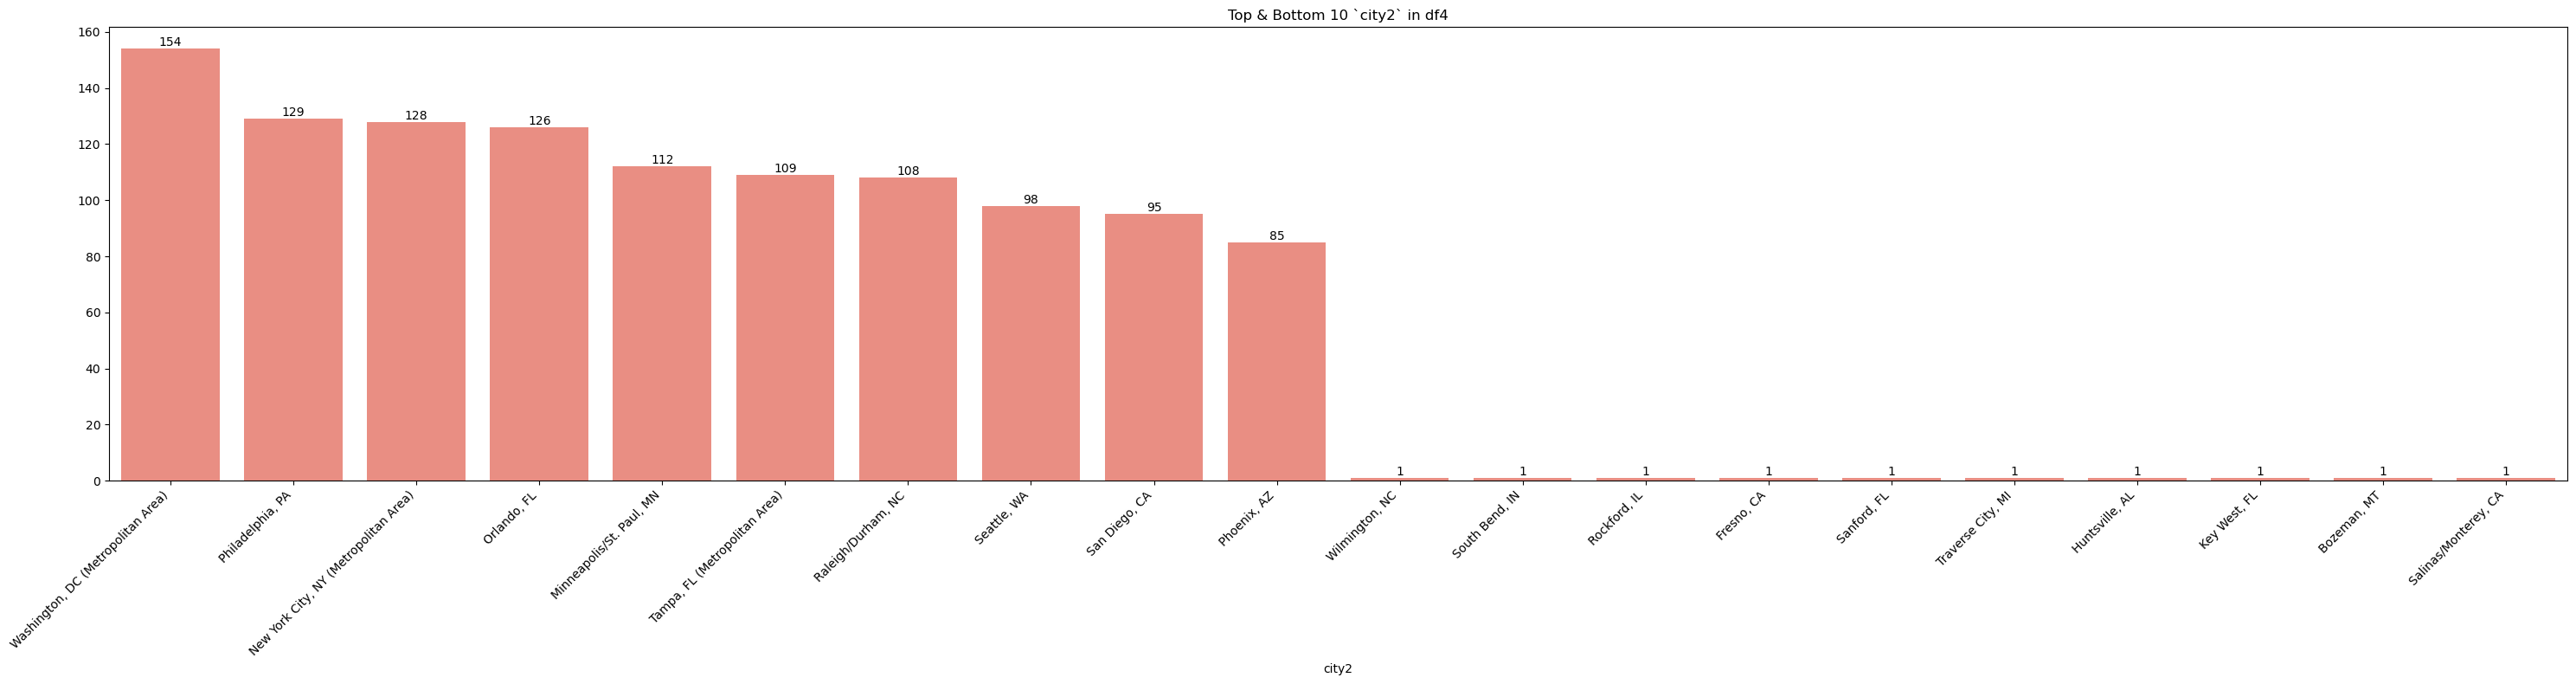

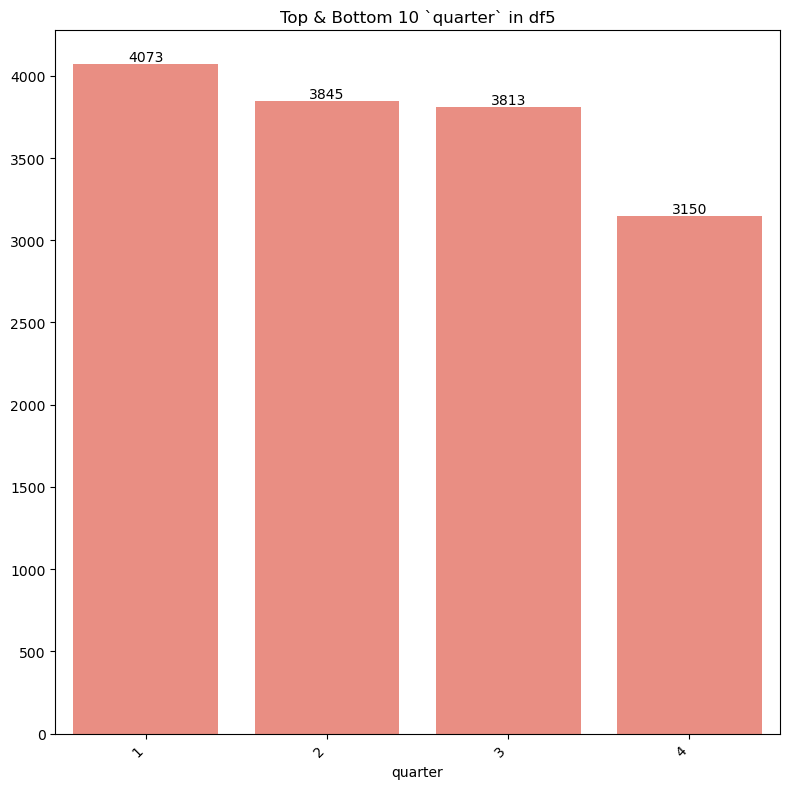

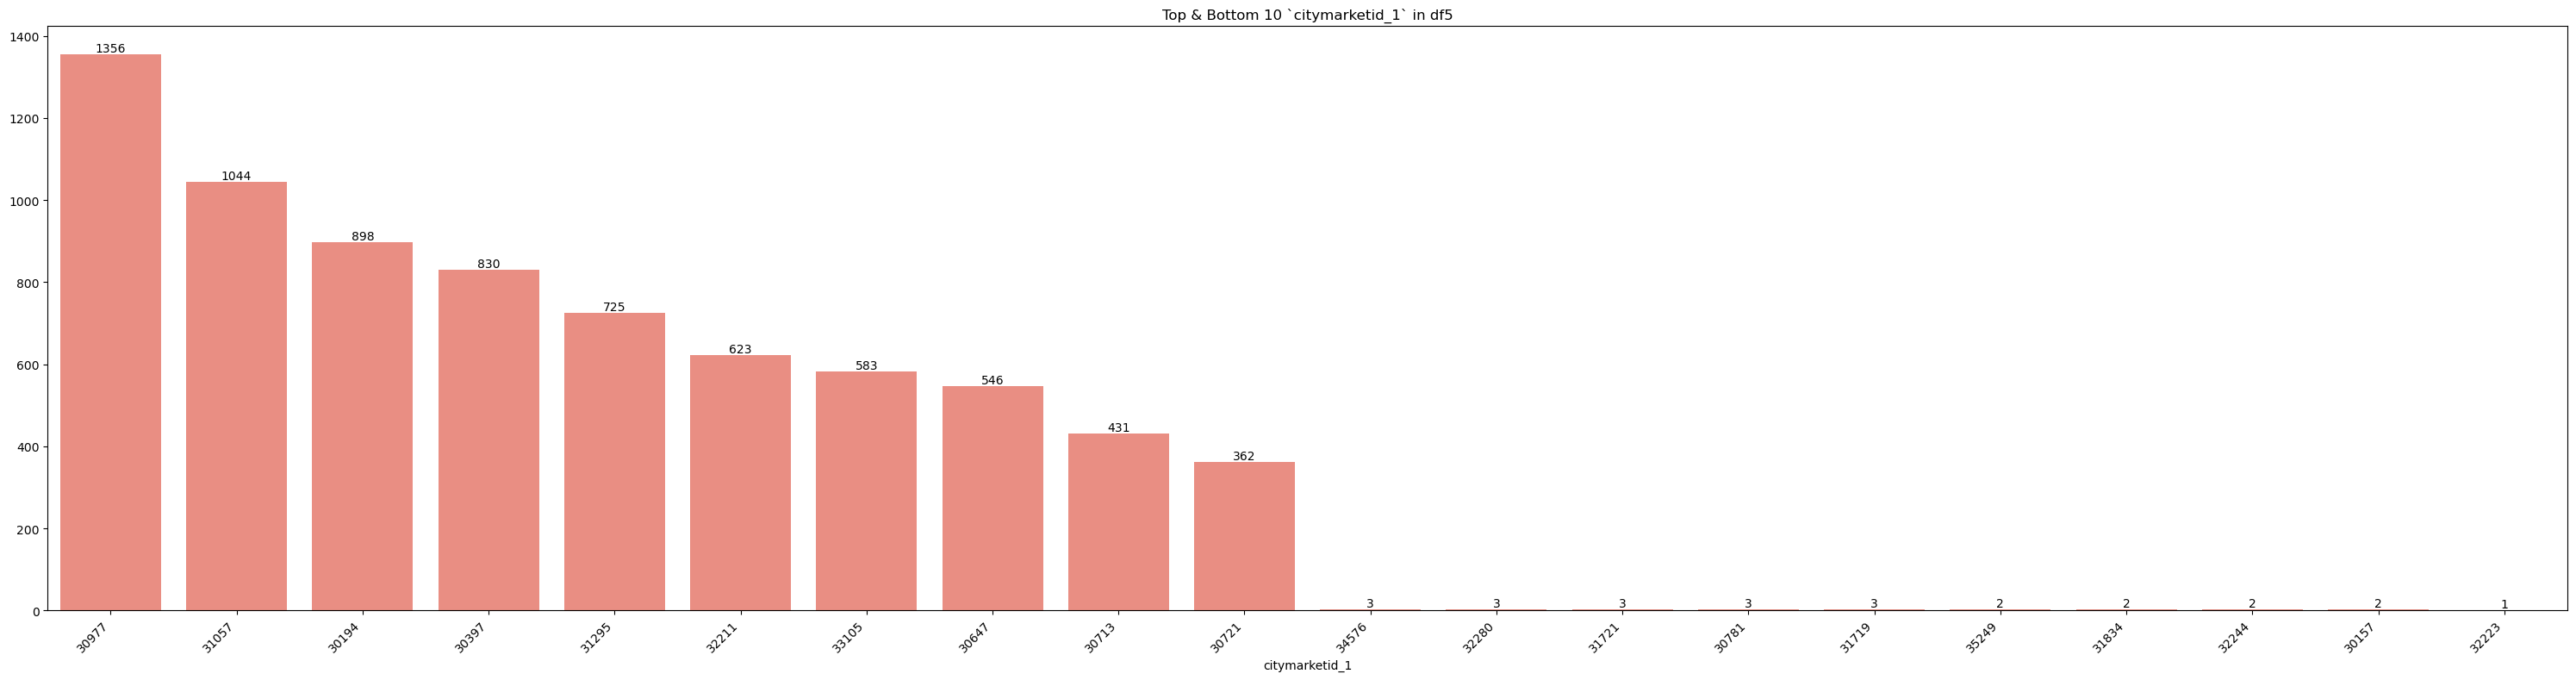

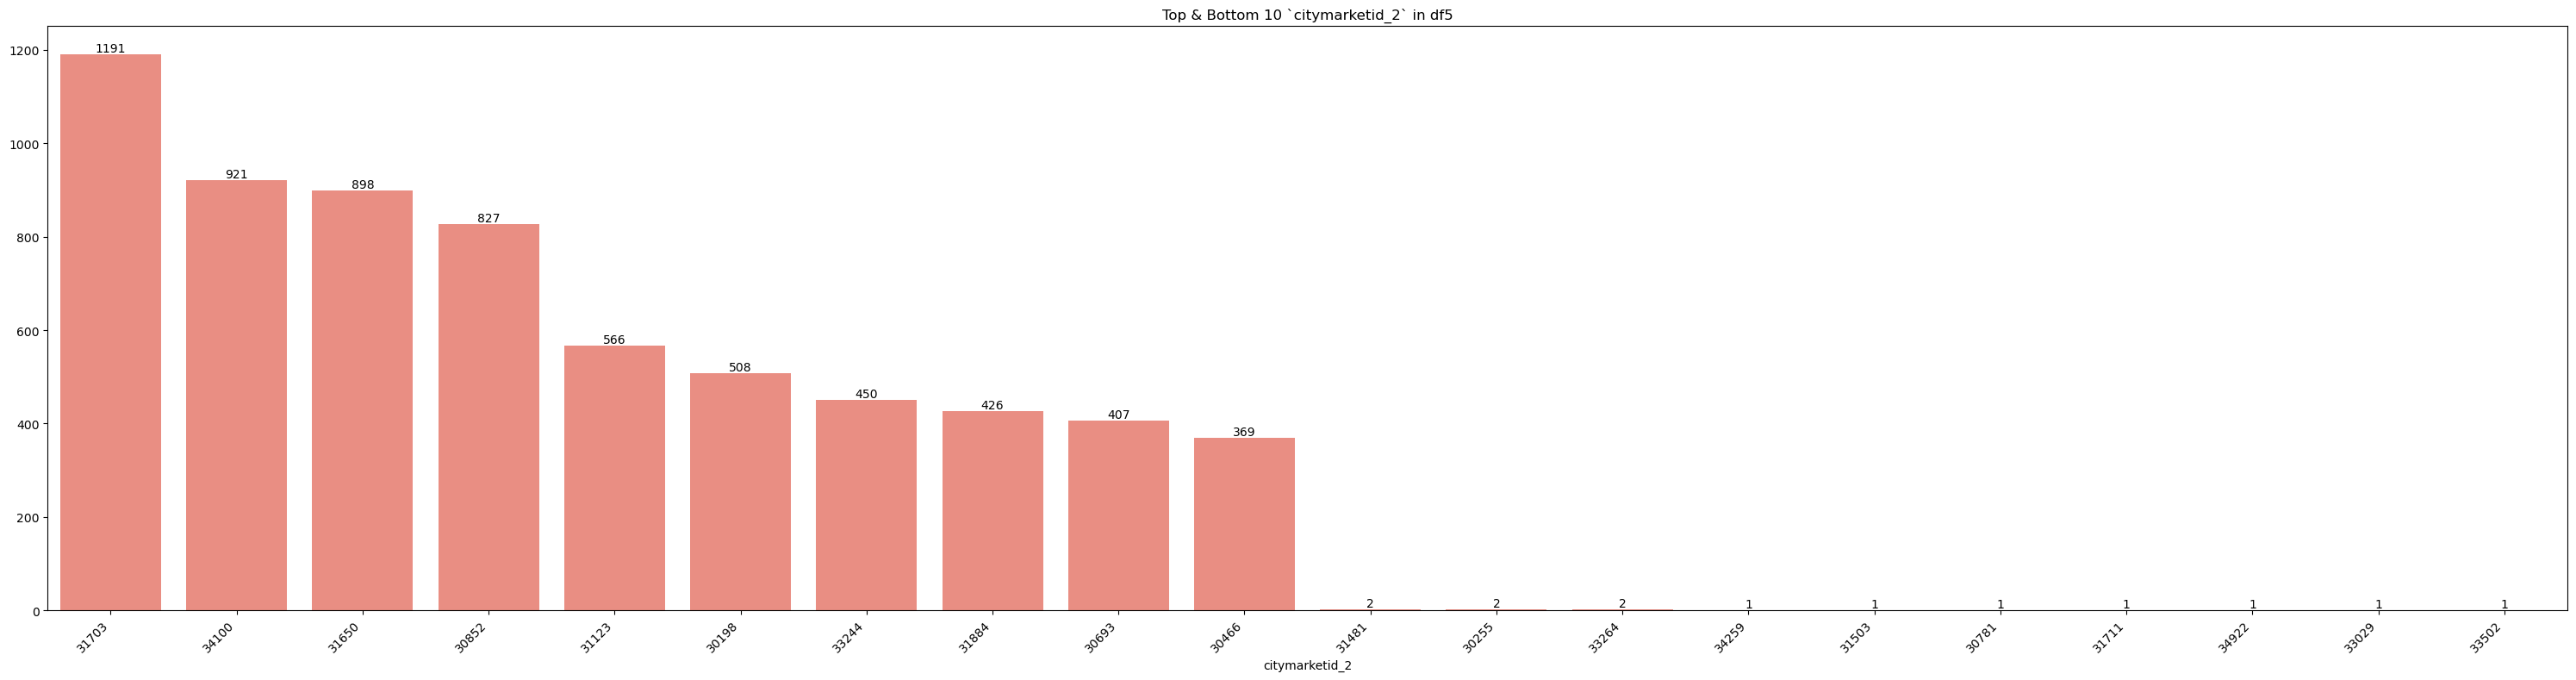

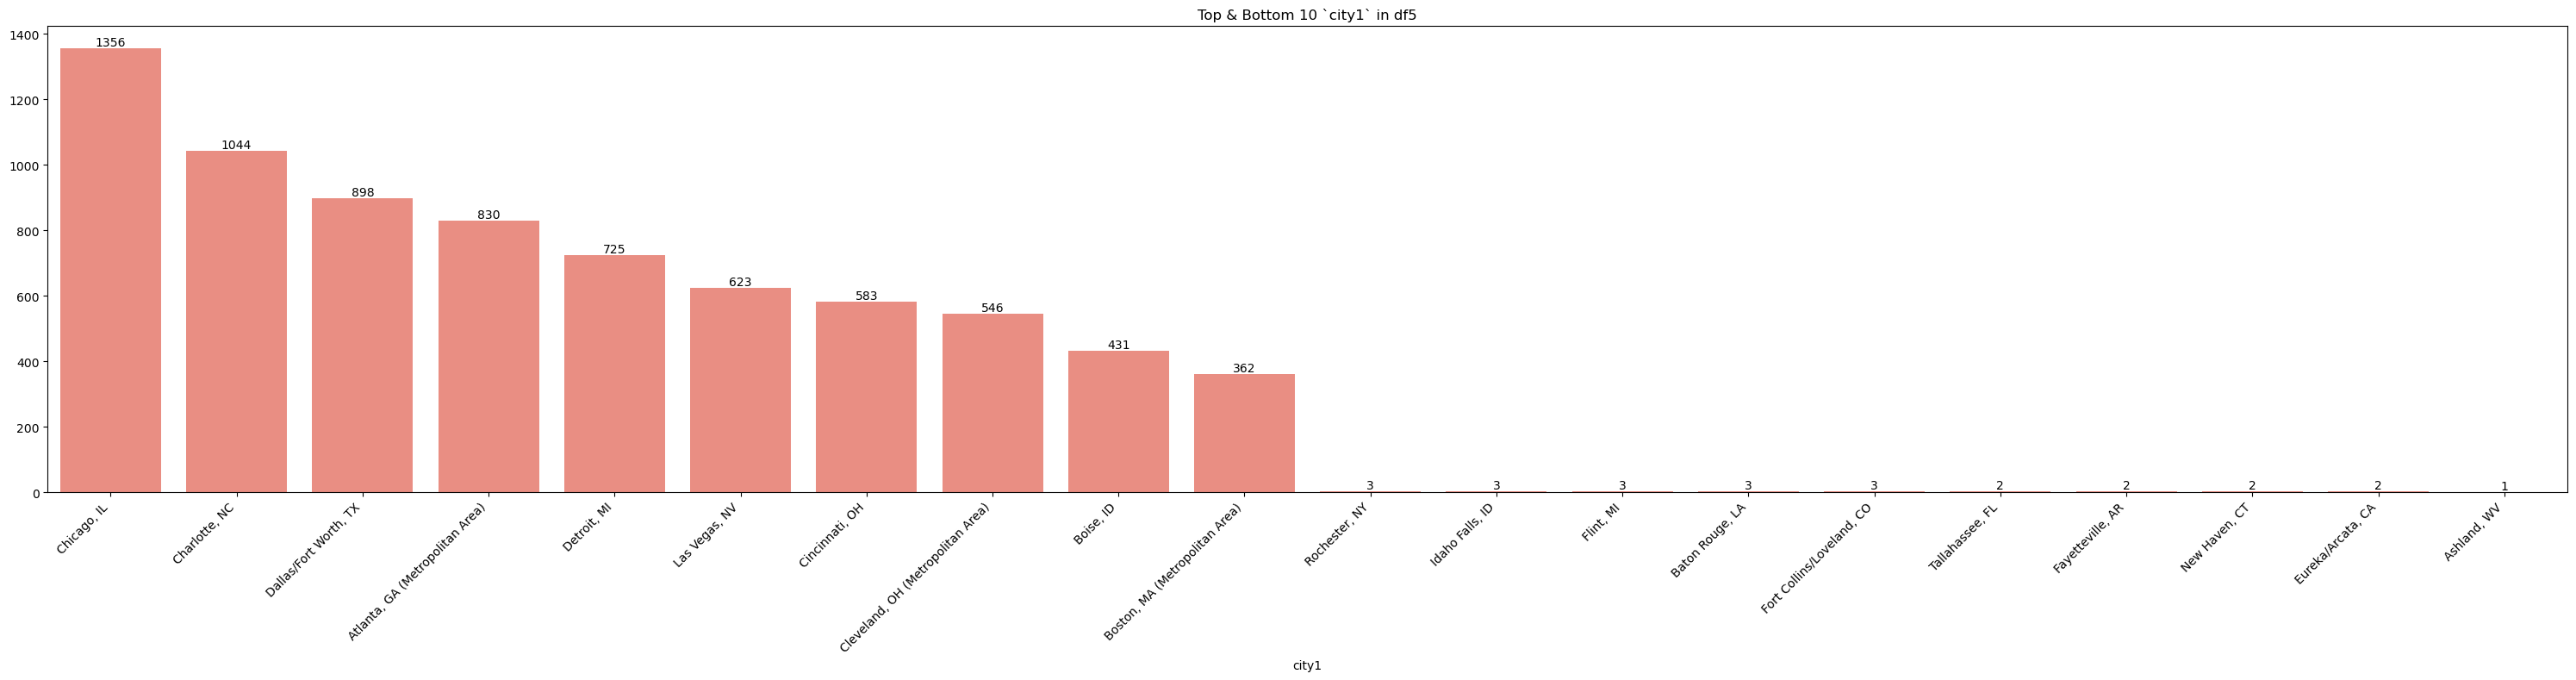

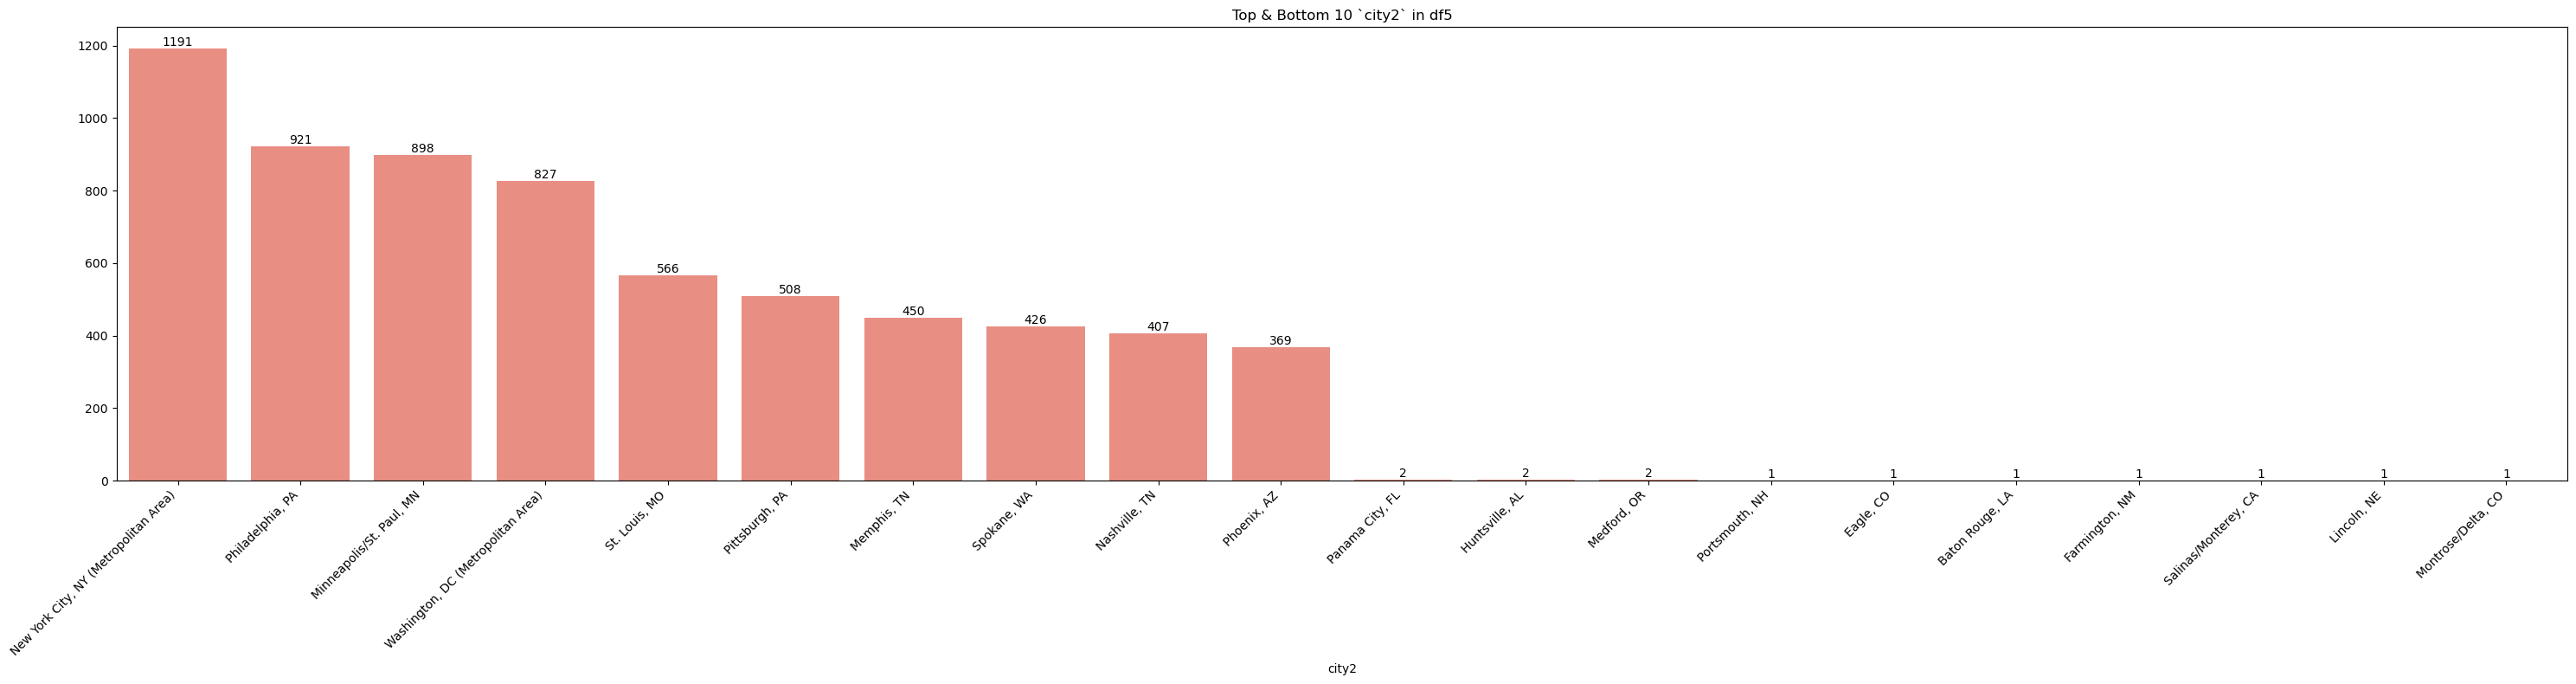

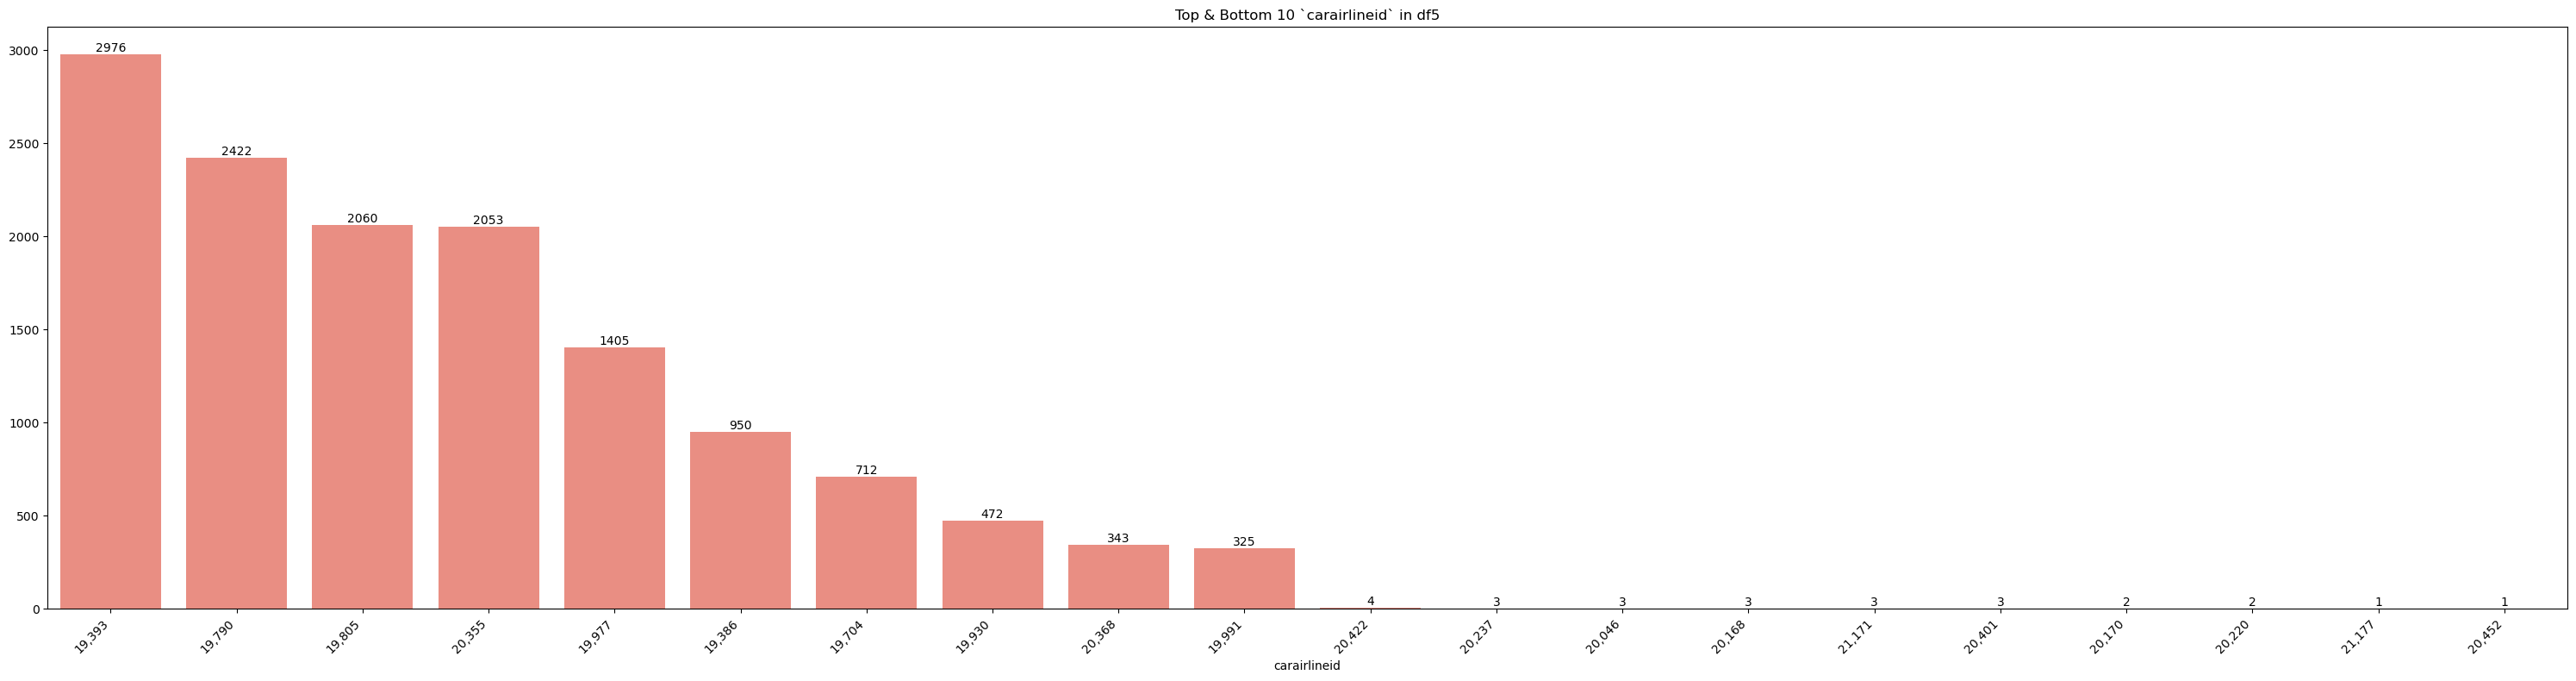

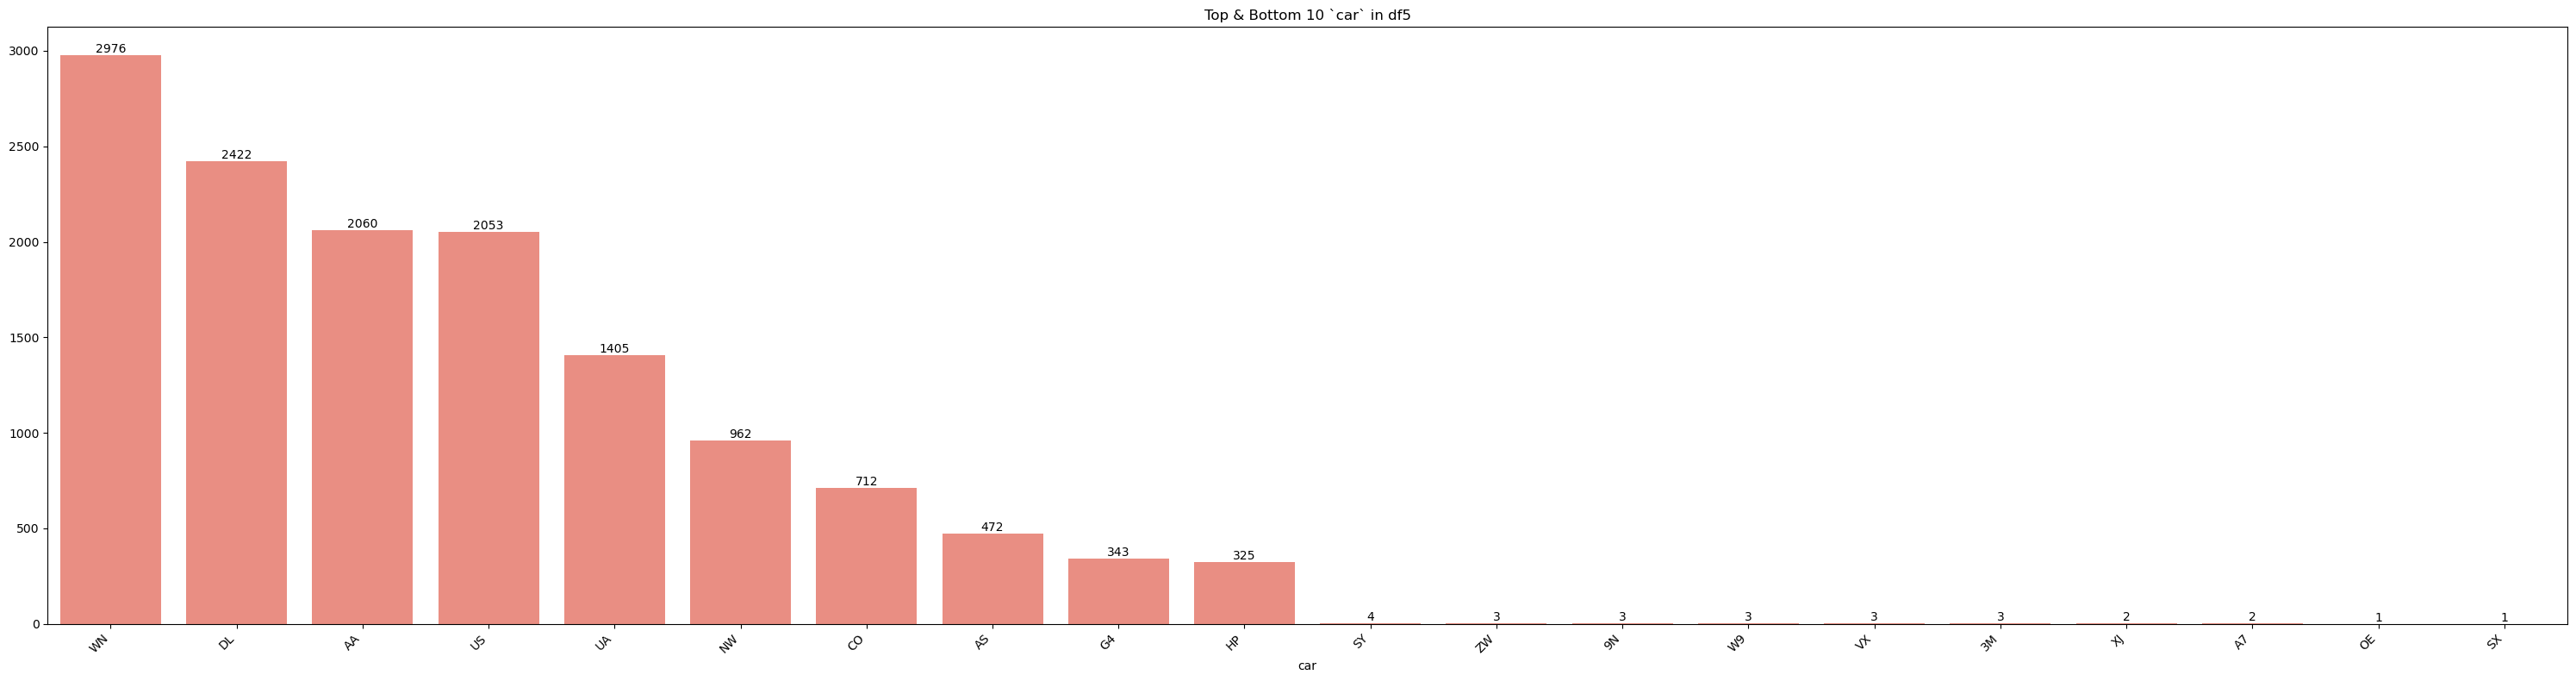

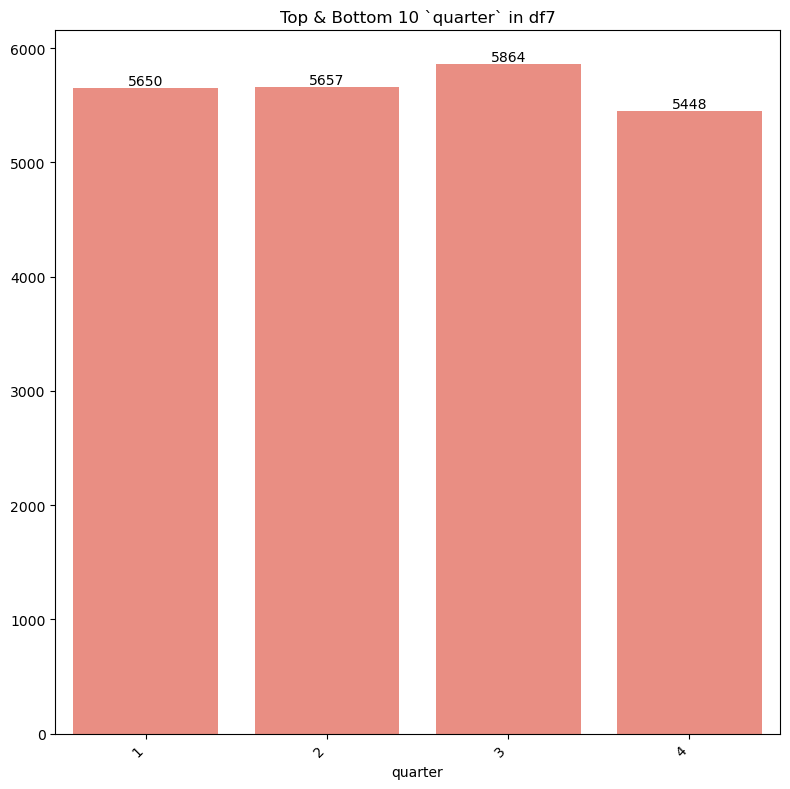

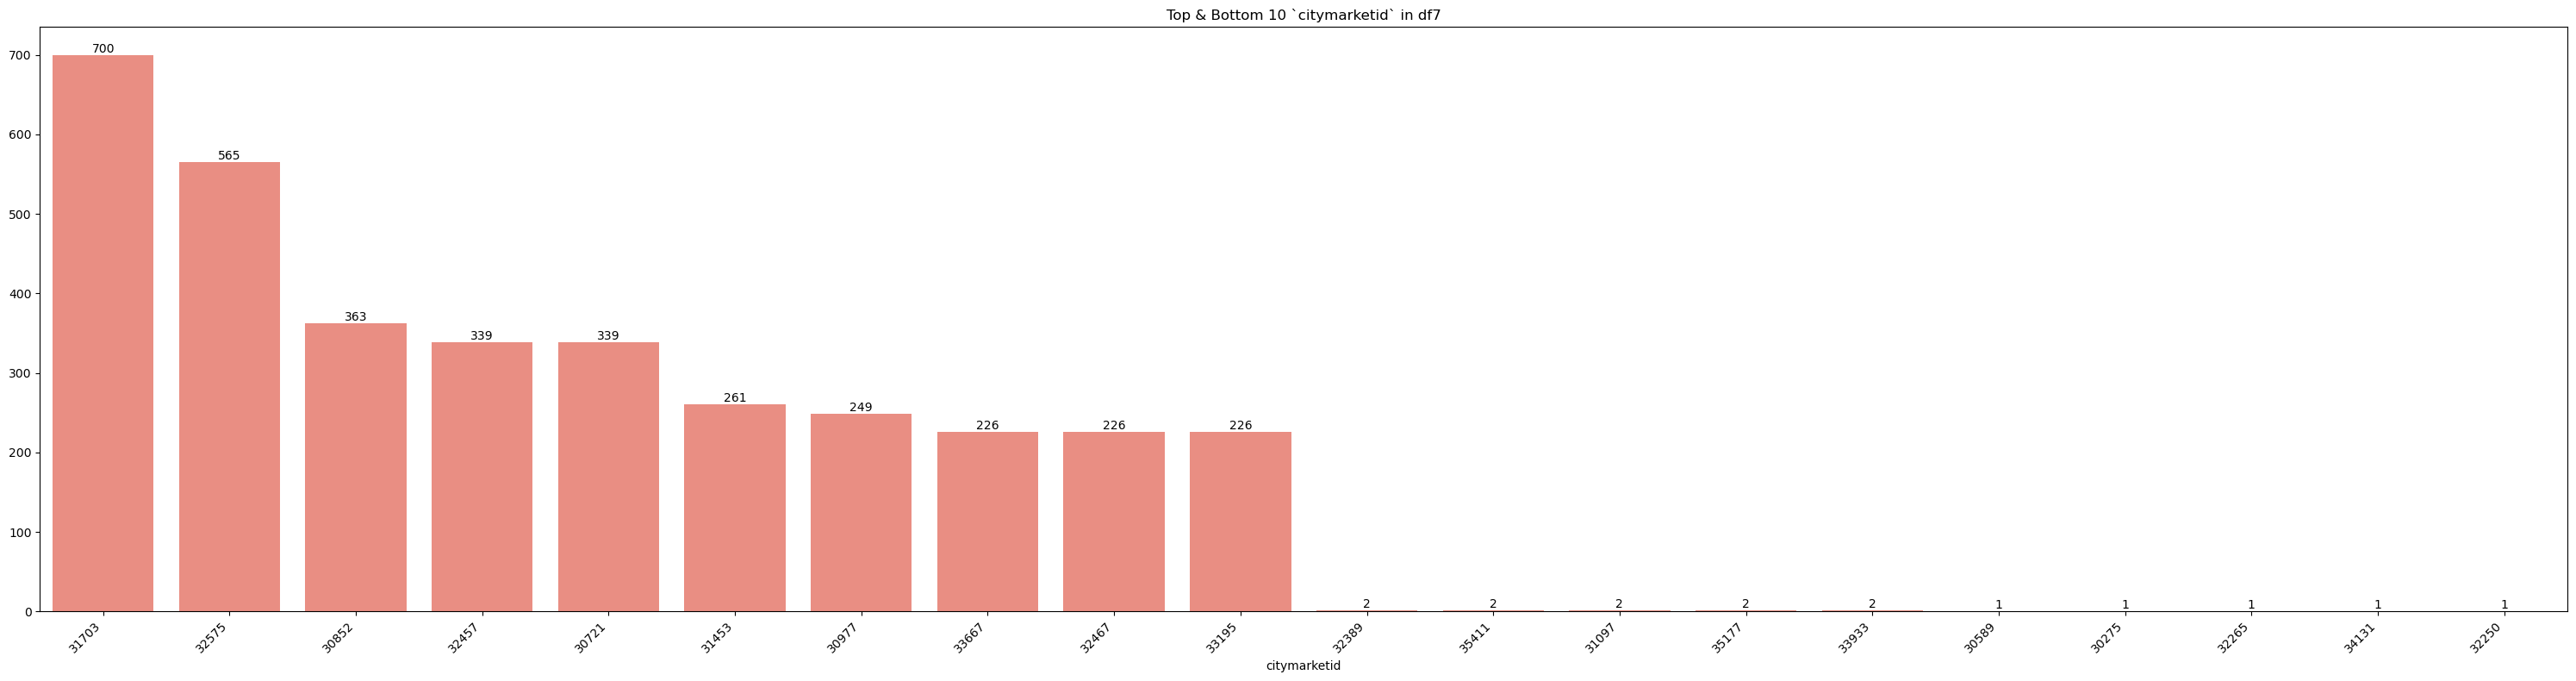

In [245]:
for df, name in zip(dfs, df_names):  
    cat_cols = df.select_dtypes(exclude=['number', 'datetime'])

    for col in cat_cols.columns:
        value_counts = df[col].value_counts()

        top_10 = value_counts.head(10)
        bottom_10 = value_counts.tail(10)
        selected_categories = pd.concat([top_10, bottom_10])

        filtered_df = df[df[col].isin(selected_categories.index)]

        unique_vals = filtered_df[col].nunique()
        fig_width = min(2 * unique_vals, 30) 
        # fig_height = min(1.2 * unique_vals, 15) 

        plt.figure(figsize=(fig_width, 8))
        ax = sns.barplot(
            x=selected_categories.index, 
            y=selected_categories.values, 
            color="salmon"
        )
        for p in ax.patches:
            ax.annotate(
                f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', va='bottom', fontsize=10, color='black'
            )

        plt.title(f'Top & Bottom 10 `{col}` in {name}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


## Distribution Plots

In [162]:
for df in dfs:
    df.drop(columns=['outliers'], inplace=True, errors='ignore')

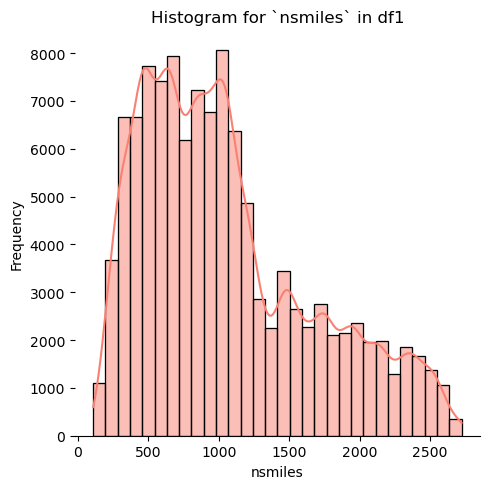

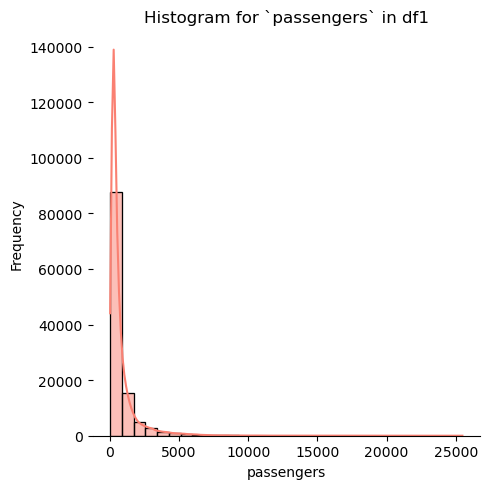

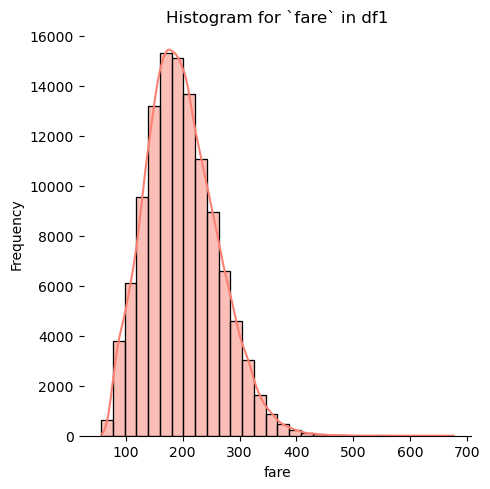

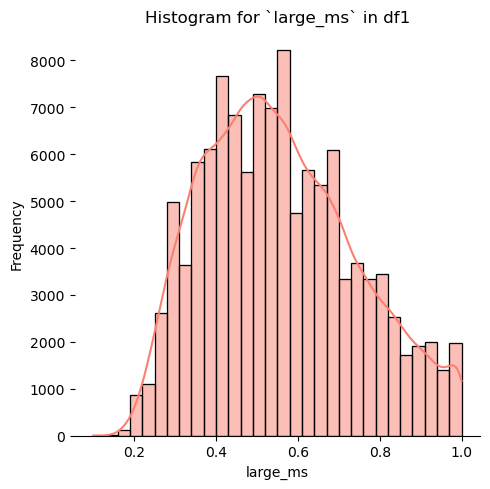

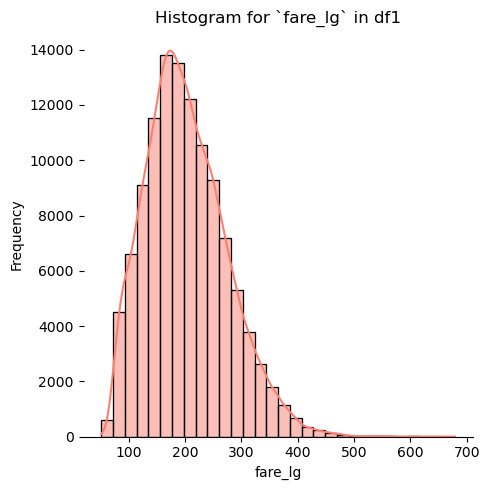

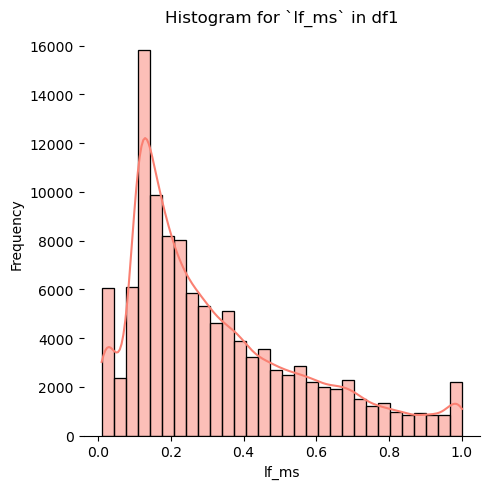

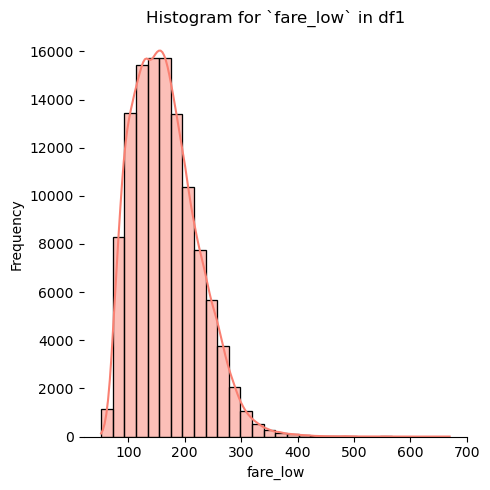

In [163]:
plot_dist(df1, 'df1')

Seeing that the distribution of the target variable is extremely right-skewed, thus log transformation is needed.

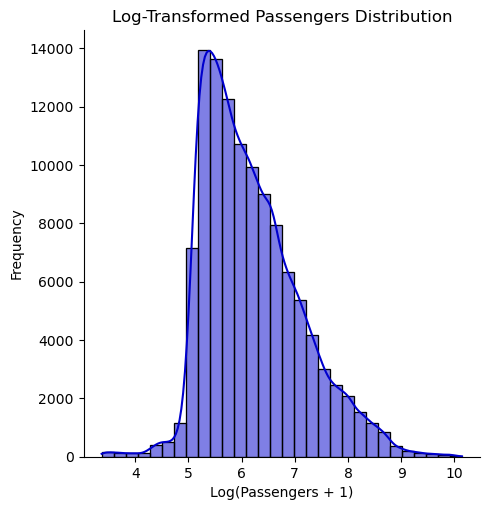

In [212]:
df1['log_passengers'] = np.log1p(df1['passengers'])
sns.displot(df1['log_passengers'], bins=30, kde=True, color='mediumblue')
plt.title('Log-Transformed Passengers Distribution')
plt.xlabel('Log(Passengers + 1)')
plt.ylabel('Frequency')
plt.show()

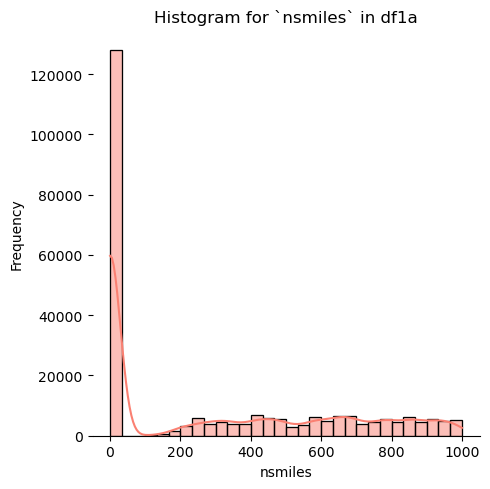

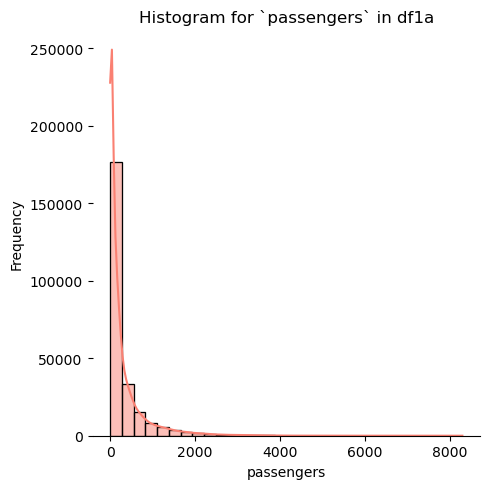

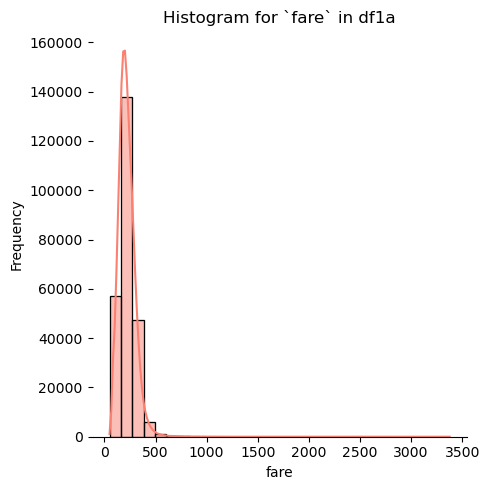

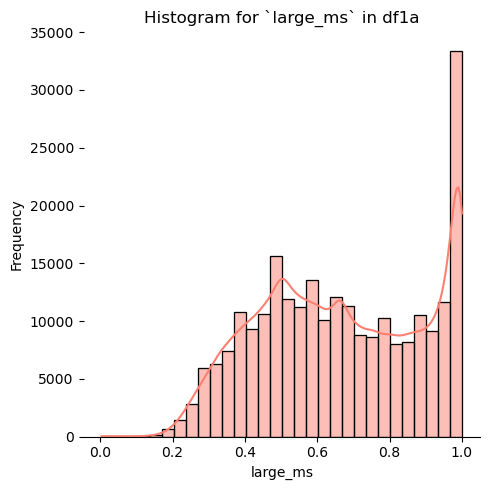

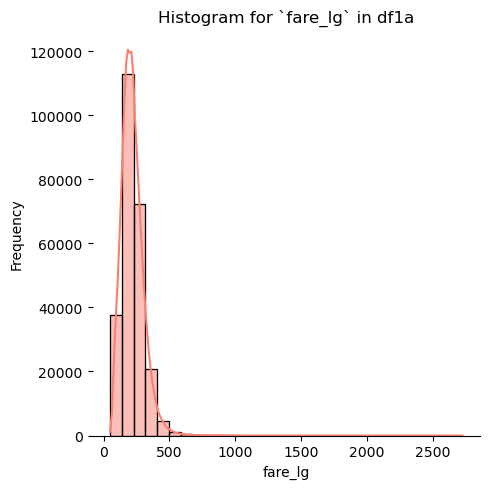

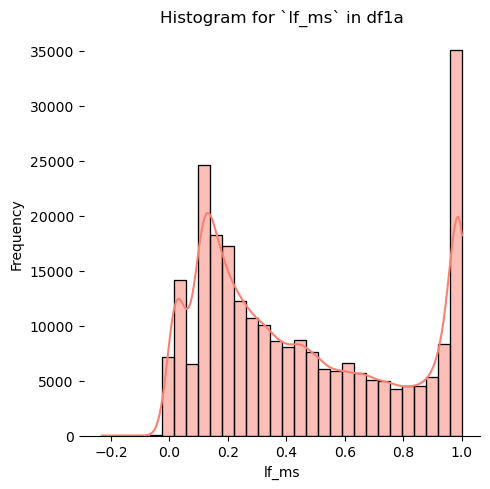

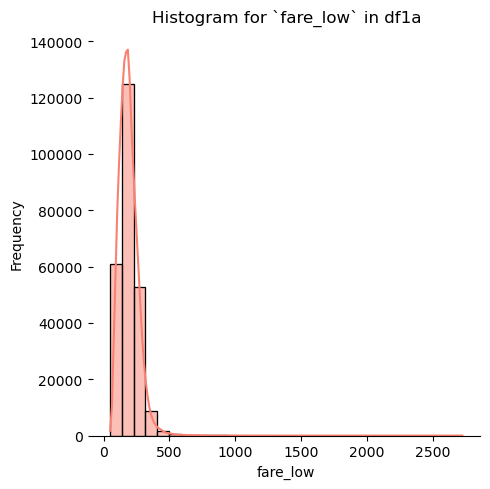

In [165]:
plot_dist(df1a, 'df1a')

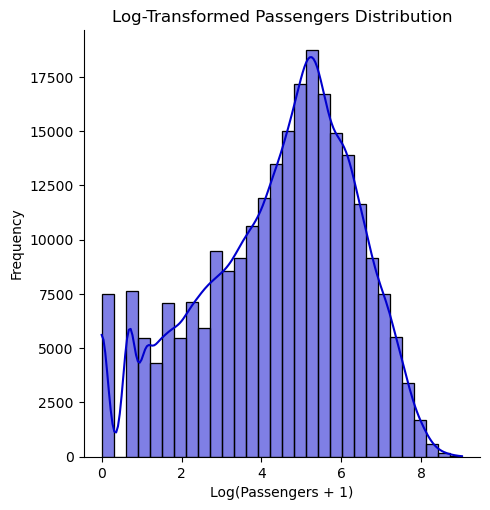

In [213]:
df1a['log_passengers'] = np.log1p(df1a['passengers'])
sns.displot(df1a['log_passengers'], bins=30, kde=True, color='mediumblue')
plt.title('Log-Transformed Passengers Distribution')
plt.xlabel('Log(Passengers + 1)')
plt.ylabel('Frequency')
plt.show()

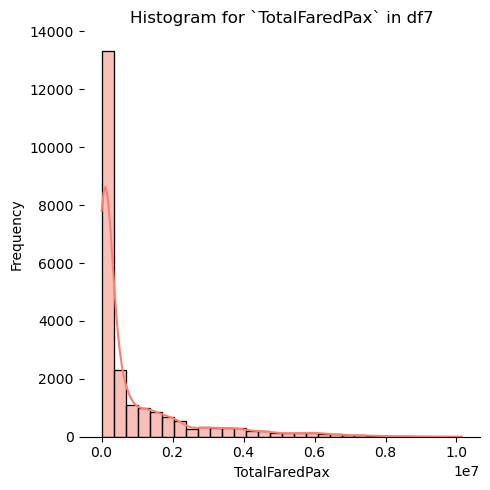

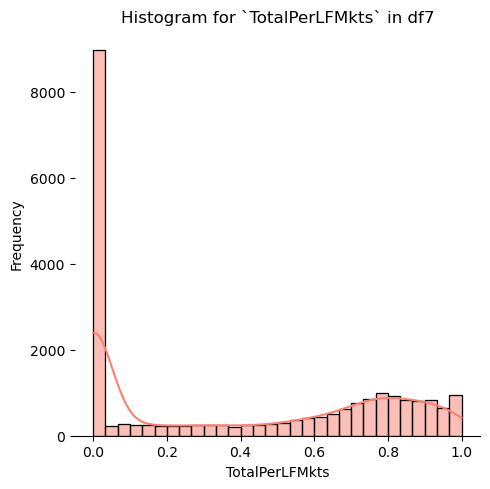

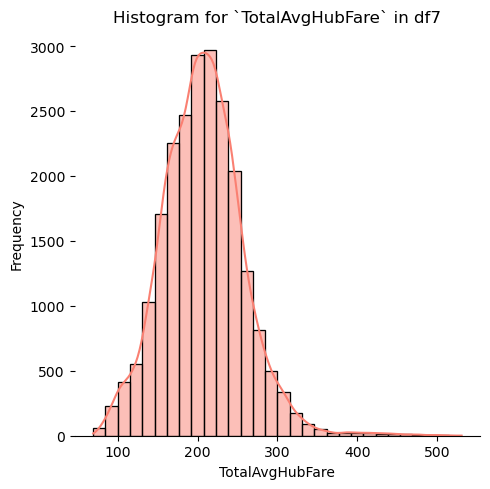

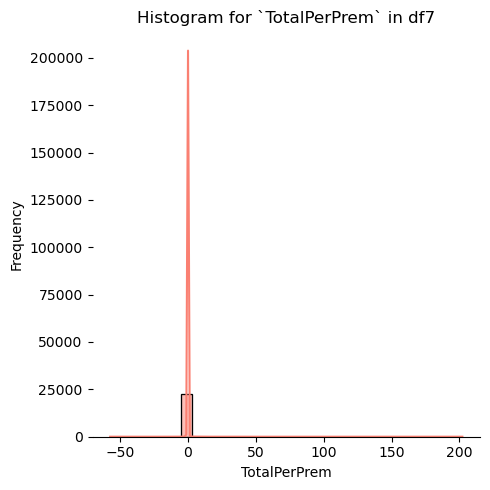

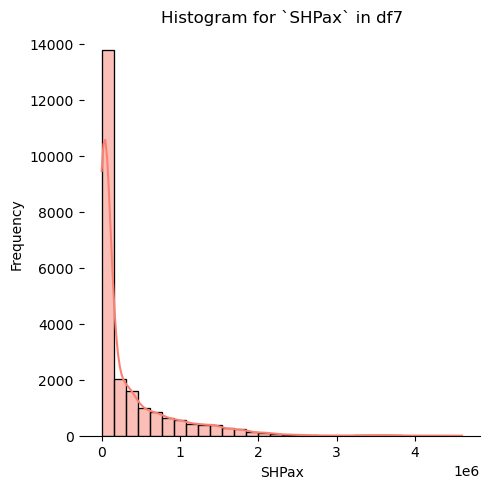

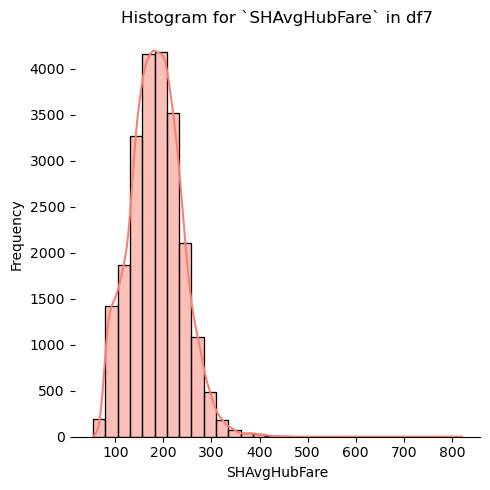

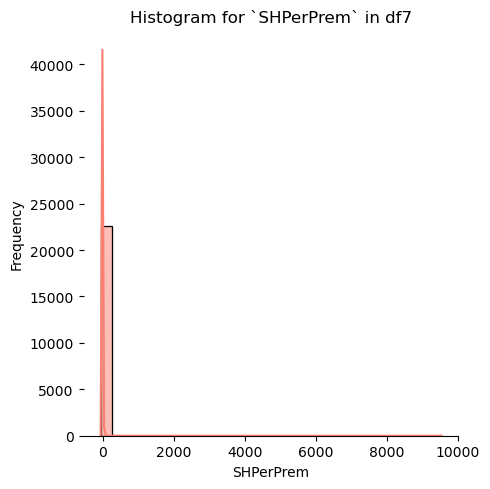

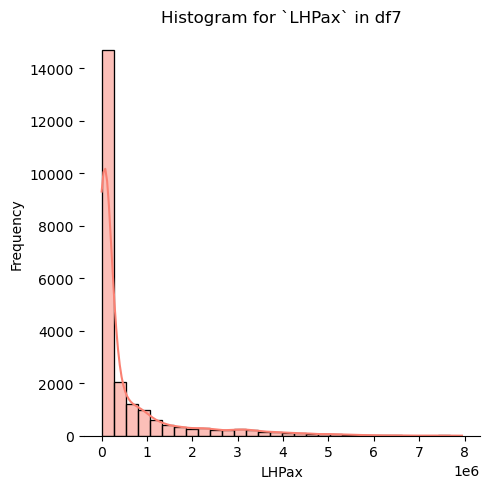

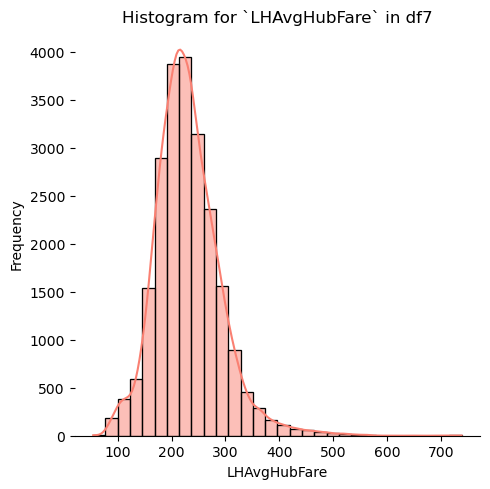

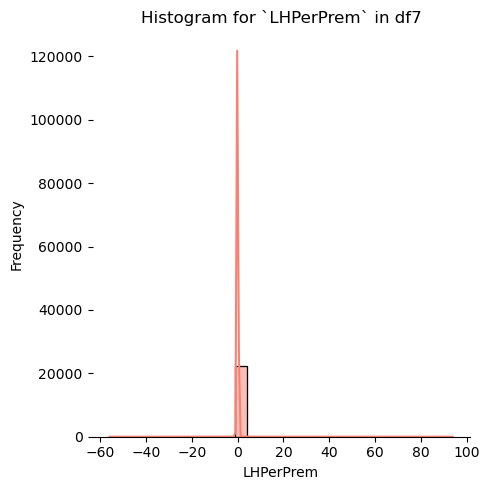

In [167]:
plot_dist(df7, 'df7')

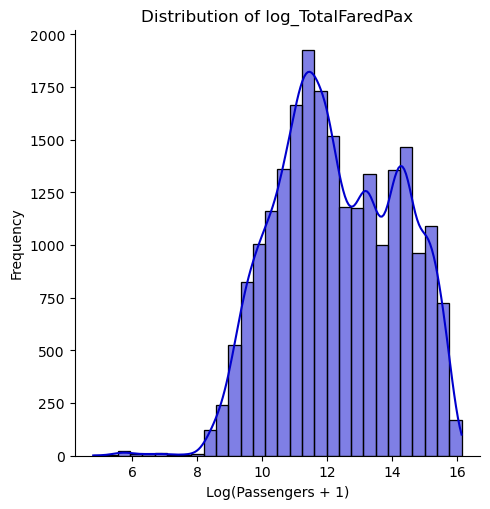

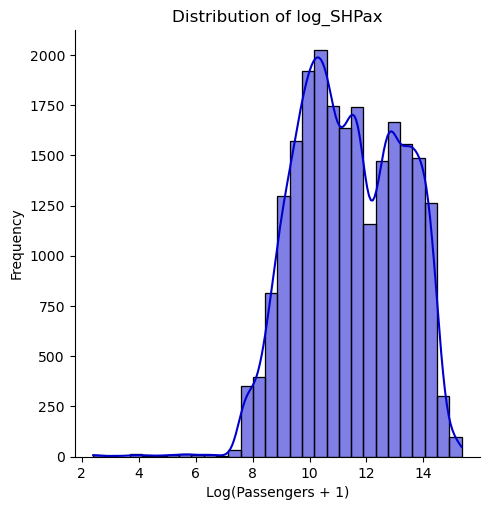

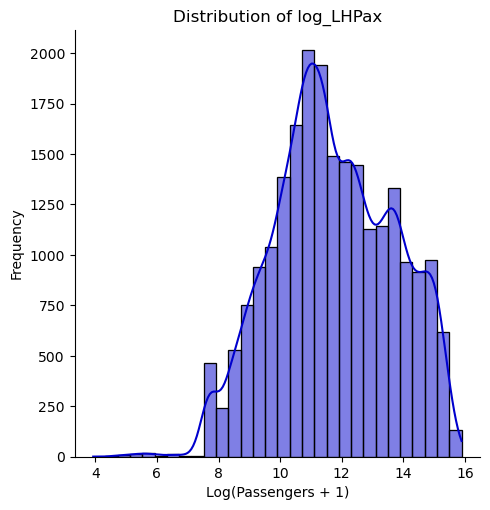

In [214]:
df7['log_TotalFaredPax'] = np.log1p(df7['TotalFaredPax'])
df7['log_SHPax'] = np.log1p(df7['SHPax'])
df7['log_LHPax'] = np.log1p(df7['LHPax'])

df7_log_passengers = ['log_TotalFaredPax', 'log_SHPax', 'log_LHPax']

for col in df7_log_passengers:
    sns.displot(df7[col], bins=30, kde=True, color='mediumblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Log(Passengers + 1)')
    plt.ylabel('Frequency')
    plt.show()

#### Box-Cox Transformed Distribution Plots

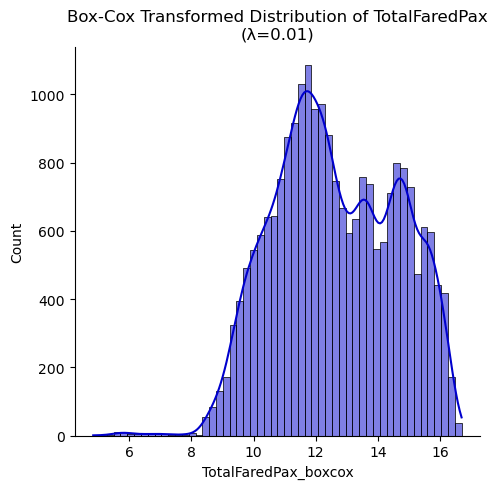

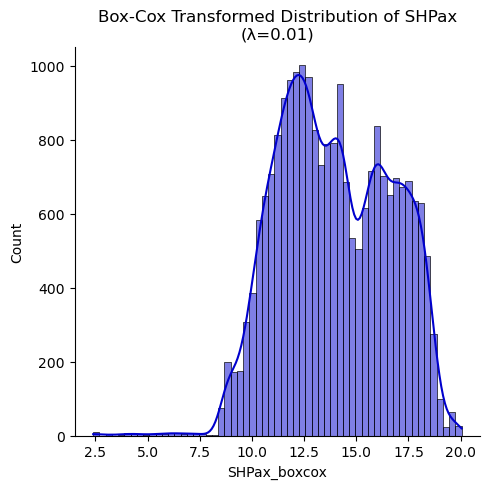

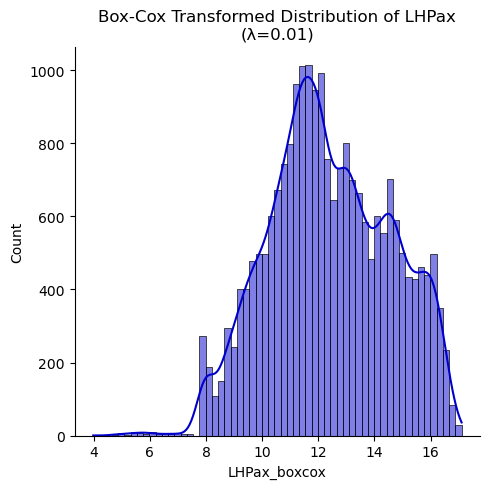

In [218]:
df7_passengers = ['TotalFaredPax', 'SHPax', 'LHPax']
for col in df7_passengers:
    min_val = df7[col].min()
    if min_val <= 0:
            df7[col] = df7[col] - min_val + 1

    transformed_data, lambda_val = stats.boxcox(df7[col])
    df7[col + '_boxcox'] = transformed_data
        
for col in df7_passengers:
    sns.displot(df7[col + '_boxcox'], kde=True, color='mediumblue')
    plt.title(f'Box-Cox Transformed Distribution of {col}\n(λ={lambda_val:.2f})')

    plt.tight_layout()
    plt.show()
